In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import folium
import koreanize_matplotlib

from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')


In [7]:
terror=pd.read_csv('../data/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror['casualities']=terror['Killed']+terror['Wounded']
terror.head(5)

Year  Month  Day             Country                       Region  \
0  1970      7    2  Dominican Republic  Central America & Caribbean   
1  1970      0    0              Mexico                North America   
2  1970      1    0         Philippines               Southeast Asia   
3  1970      1    0              Greece               Western Europe   
4  1970      1    0               Japan                    East Asia   

            city   latitude   longitude                      AttackType  \
0  Santo Domingo  18.456792  -69.951164                   Assassination   
1    Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)   
2        Unknown  15.478598  120.599741                   Assassination   
3         Athens  37.997490   23.762728               Bombing/Explosion   
4        Fukouka  33.580412  130.396361  Facility/Infrastructure Attack   

   Killed  Wounded                   Target Summary  \
0     1.0      0.0             Julio Guzman     NaN   
1     0.0      0.0  Nadine Chaval, daughter     NaN   
2     1.0      0.0                 Employee     NaN   
3     NaN      NaN             U.S. Embassy     NaN   
4     NaN      NaN           U.S. Consulate     NaN   

                                Group                  Target_type  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   
2                             Unknown          Journalists & Media   
3                             Unknown      Government (Diplomatic)   
4                             Unknown      Government (Diplomatic)   

  Weapon_type Motive  casualities  
0     Unknown    NaN          1.0  
1     Unknown    NaN          0.0  
2     Unknown    NaN          1.0  
3  Explosives    NaN          NaN  
4  Incendiary    NaN          NaN

In [8]:
terror.columns[0]

'Year'

In [9]:
#terror.rename(columns={terror.columns[0]:'년도',terror.columns[1]:'월',terror.columns[2]:'일',terror.columns[3]:'국가',terror.columns[4]:'지역',terror.columns[5]:'도시',terror.columns[6]:'위도',terror.columns[7]:'경도',terror.columns[8]:'공격 유형',terror.columns[9]:'사망',terror.columns[10]:'부상',terror.columns[11]:'대상',terror.columns[12]:'개요',terror.columns[13]:'그룹',terror.columns[14]:'공격 대상',terror.columns[15]:'무기 유형',terror.columns[16]:'공격 동기',terror.columns[17]:'사상자'},inplace=True)

In [10]:
terror.head(5)

Year  Month  Day             Country                       Region  \
0  1970      7    2  Dominican Republic  Central America & Caribbean   
1  1970      0    0              Mexico                North America   
2  1970      1    0         Philippines               Southeast Asia   
3  1970      1    0              Greece               Western Europe   
4  1970      1    0               Japan                    East Asia   

            city   latitude   longitude                      AttackType  \
0  Santo Domingo  18.456792  -69.951164                   Assassination   
1    Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)   
2        Unknown  15.478598  120.599741                   Assassination   
3         Athens  37.997490   23.762728               Bombing/Explosion   
4        Fukouka  33.580412  130.396361  Facility/Infrastructure Attack   

   Killed  Wounded                   Target Summary  \
0     1.0      0.0             Julio Guzman     NaN   
1     0.0      0.0  Nadine Chaval, daughter     NaN   
2     1.0      0.0                 Employee     NaN   
3     NaN      NaN             U.S. Embassy     NaN   
4     NaN      NaN           U.S. Consulate     NaN   

                                Group                  Target_type  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   
2                             Unknown          Journalists & Media   
3                             Unknown      Government (Diplomatic)   
4                             Unknown      Government (Diplomatic)   

  Weapon_type Motive  casualities  
0     Unknown    NaN          1.0  
1     Unknown    NaN          0.0  
2     Unknown    NaN          1.0  
3  Explosives    NaN          NaN  
4  Incendiary    NaN          NaN

In [11]:
terror.tail()

Year  Month  Day      Country                      Region  \
181686  2017     12   31      Somalia          Sub-Saharan Africa   
181687  2017     12   31        Syria  Middle East & North Africa   
181688  2017     12   31  Philippines              Southeast Asia   
181689  2017     12   31        India                  South Asia   
181690  2017     12   31  Philippines              Southeast Asia   

                 city   latitude   longitude                      AttackType  \
181686  Ceelka Geelow   2.359673   45.385034                   Armed Assault   
181687         Jableh  35.407278   35.942679               Bombing/Explosion   
181688       Kubentog   6.900742  124.437908  Facility/Infrastructure Attack   
181689         Imphal  24.798346   93.940430               Bombing/Explosion   
181690  Cotabato City   7.209594  124.241966               Bombing/Explosion   

        Killed  Wounded            Target  \
181686     1.0      2.0        Checkpoint   
181687     2.0      7.0  Hmeymim Air Base   
181688     0.0      0.0            Houses   
181689     0.0      0.0            Office   
181690     0.0      0.0           Unknown   

                                                  Summary  \
181686  12/31/2017: Assailants opened fire on a Somali...   
181687  12/31/2017: Assailants launched mortars at the...   
181688  12/31/2017: Assailants set fire to houses in K...   
181689  12/31/2017: Assailants threw a grenade at a Fo...   
181690  12/31/2017: An explosive device was discovered...   

                                             Group  \
181686                                  Al-Shabaab   
181687                           Muslim extremists   
181688  Bangsamoro Islamic Freedom Movement (BIFM)   
181689                                     Unknown   
181690                                     Unknown   

                        Target_type Weapon_type Motive  casualities  
181686                     Military    Firearms    NaN          3.0  
181687                     Military  Explosives    NaN          9.0  
181688  Private Citizens & Property  Incendiary    NaN          0.0  
181689         Government (General)  Explosives    NaN          0.0  
181690                      Unknown  Explosives    NaN          0.0

In [12]:
type(terror)

pandas.core.frame.DataFrame

In [13]:
len(terror['AttackType'].unique())

9

In [14]:
len(terror['Region'].unique())

12

In [15]:
terror['AttackType'].value_counts()

AttackType
Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: count, dtype: int64

In [16]:
terror['Region'].value_counts()

Region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: count, dtype: int64

In [17]:
len(terror['Country'].unique()) #국가가 너무 많다 

205

In [18]:
terror['Year'].value_counts() #의외로 2014년이 제일 테러가 많았다.

Year
2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: count, dtype: int64

In [19]:
terror_year = terror['Year'].value_counts() 

In [20]:
terror_year.head(10)

Year
2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
Name: count, dtype: int64

In [21]:
terror_top = terror['Country'].value_counts()

In [22]:
terror_top.head(10) #10개 나라중 영국이 있다??

Country
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: count, dtype: int64

In [23]:
terror_top_10=terror_top.head(10) 

In [24]:
terror_top_10

Country
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: count, dtype: int64

In [25]:
terror_top_10df =terror_top_10.to_frame()#데이터 프레임으로 바꾸어준다

In [26]:
terror_top_10df

count
Country              
Iraq            24636
Pakistan        14368
Afghanistan     12731
India           11960
Colombia         8306
Philippines      6908
Peru             6096
El Salvador      5320
United Kingdom   5235
Turkey           4292

In [27]:
type(terror_top_10df) #데이터 프레임 타입이 되었다.

pandas.core.frame.DataFrame

In [28]:
terror_top_10df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Iraq to Turkey
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   10 non-null     int64
dtypes: int64(1)
memory usage: 460.0+ bytes


In [29]:
terror_top_10df.head(2)

count
Country        
Iraq      24636
Pakistan  14368

In [30]:
terror_top_10df.columns

Index(['count'], dtype='object')

In [31]:
terror_top_10dff = pd.DataFrame({'Country':['Iraq','Pakistan','Afghanistan','India','Colombia','Philippines','Peru','El Salvador','United Kingdom','Turkey'],
            'terror number':['24636','14368','12731','11960','8306','6908','6096','5320','5235','4292']},
                                columns=['Country','terror number'])


In [32]:
terror_top_10dff

Country terror number
0            Iraq         24636
1        Pakistan         14368
2     Afghanistan         12731
3           India         11960
4        Colombia          8306
5     Philippines          6908
6            Peru          6096
7     El Salvador          5320
8  United Kingdom          5235
9          Turkey          4292

# s1 테러 숫자 연도별로 집계

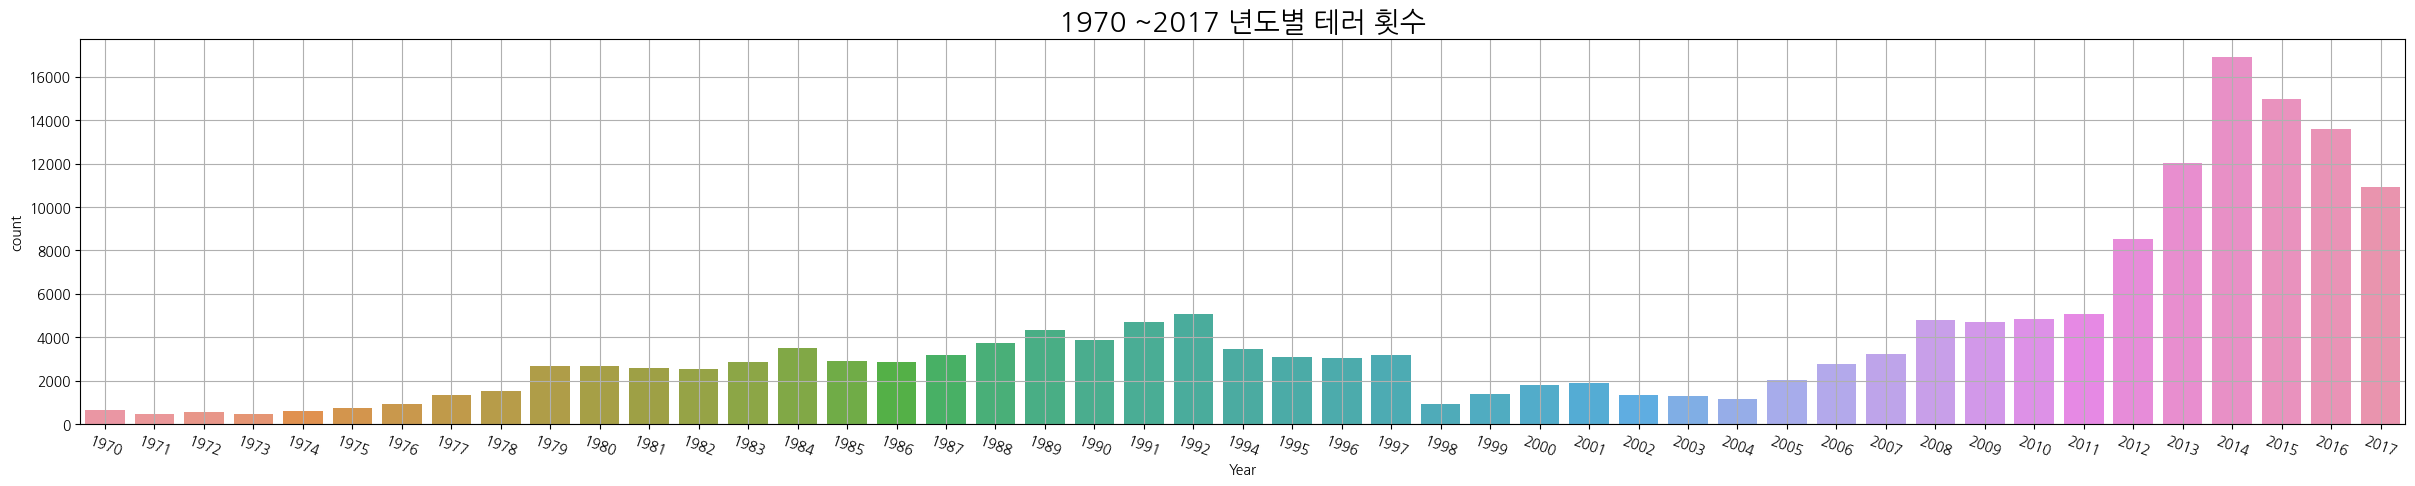

In [33]:
fig, ax = plt.subplots(figsize=(30,5))
sns.countplot(x='Year', data=terror )
plt.title('1970 ~2017 년도별 테러 횟수',size = '20')
plt.xticks(rotation=340)
plt.grid()
plt.show(); #2010년 이후 급격히 올라가는 것을 보아 난민과, 아프간 전쟁으로 인해 높아지는 것으로 볼 수 있다. 또한 2001년 이후로 2004년까지는 이라크 전쟁등으로 억제 되어있다가 '외로운 늑대라' 불리는 혼자서 내는 테러가 많아 진것도 원인


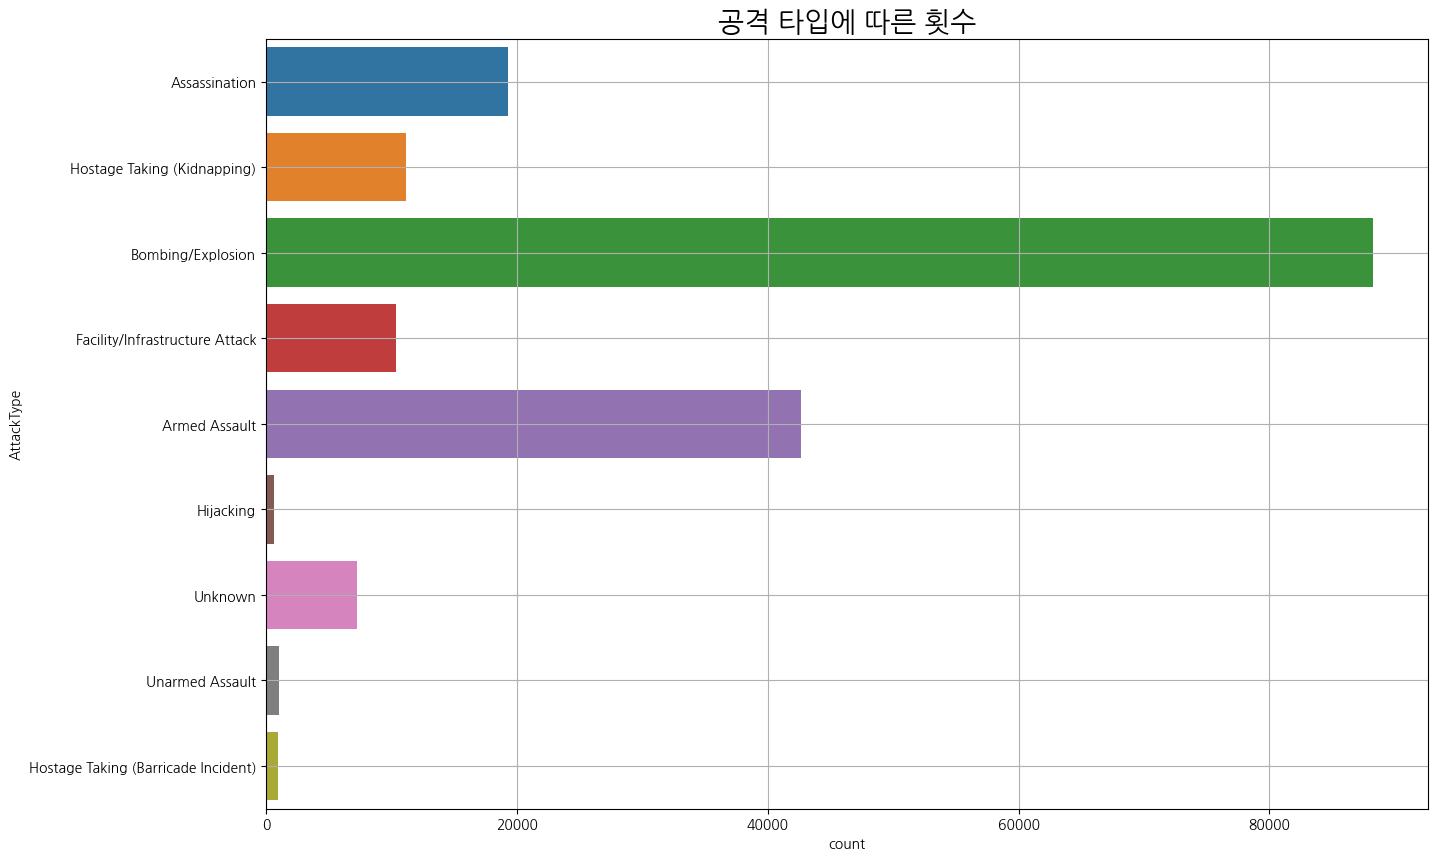

In [34]:

fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(y='AttackType', data=terror )
plt.title('공격 타입에 따른 횟수',size = '20')
plt.grid()
plt.show(); #공격 유형에 따른 테러 횟수 폭탄이 압도적이다.


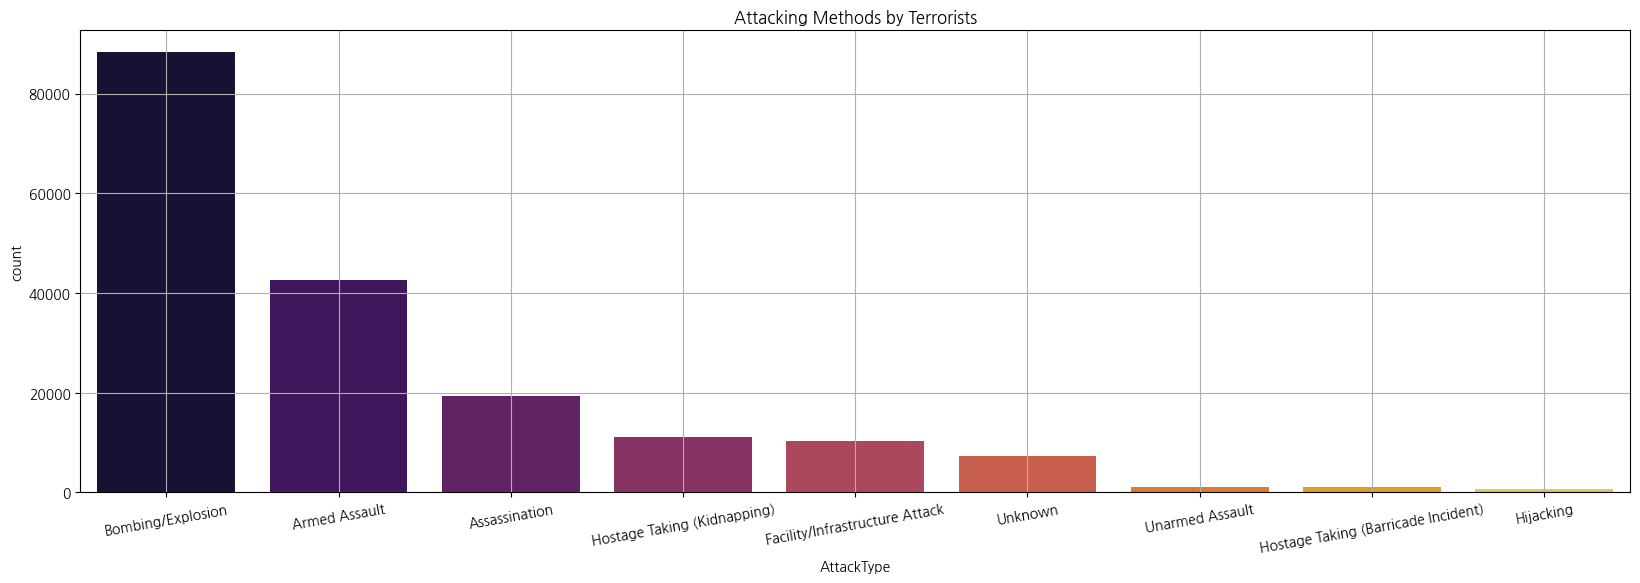

In [46]:
plt.subplots(figsize=(20,6))
sns.countplot(x= 'AttackType',data = terror ,palette='inferno',order=terror['AttackType'].value_counts().index)
plt.xticks(rotation=370)
plt.title('Attacking Methods by Terrorists')

plt.grid()
plt.show()

In [36]:
terror['AttackType'].value_counts()

AttackType
Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: count, dtype: int64

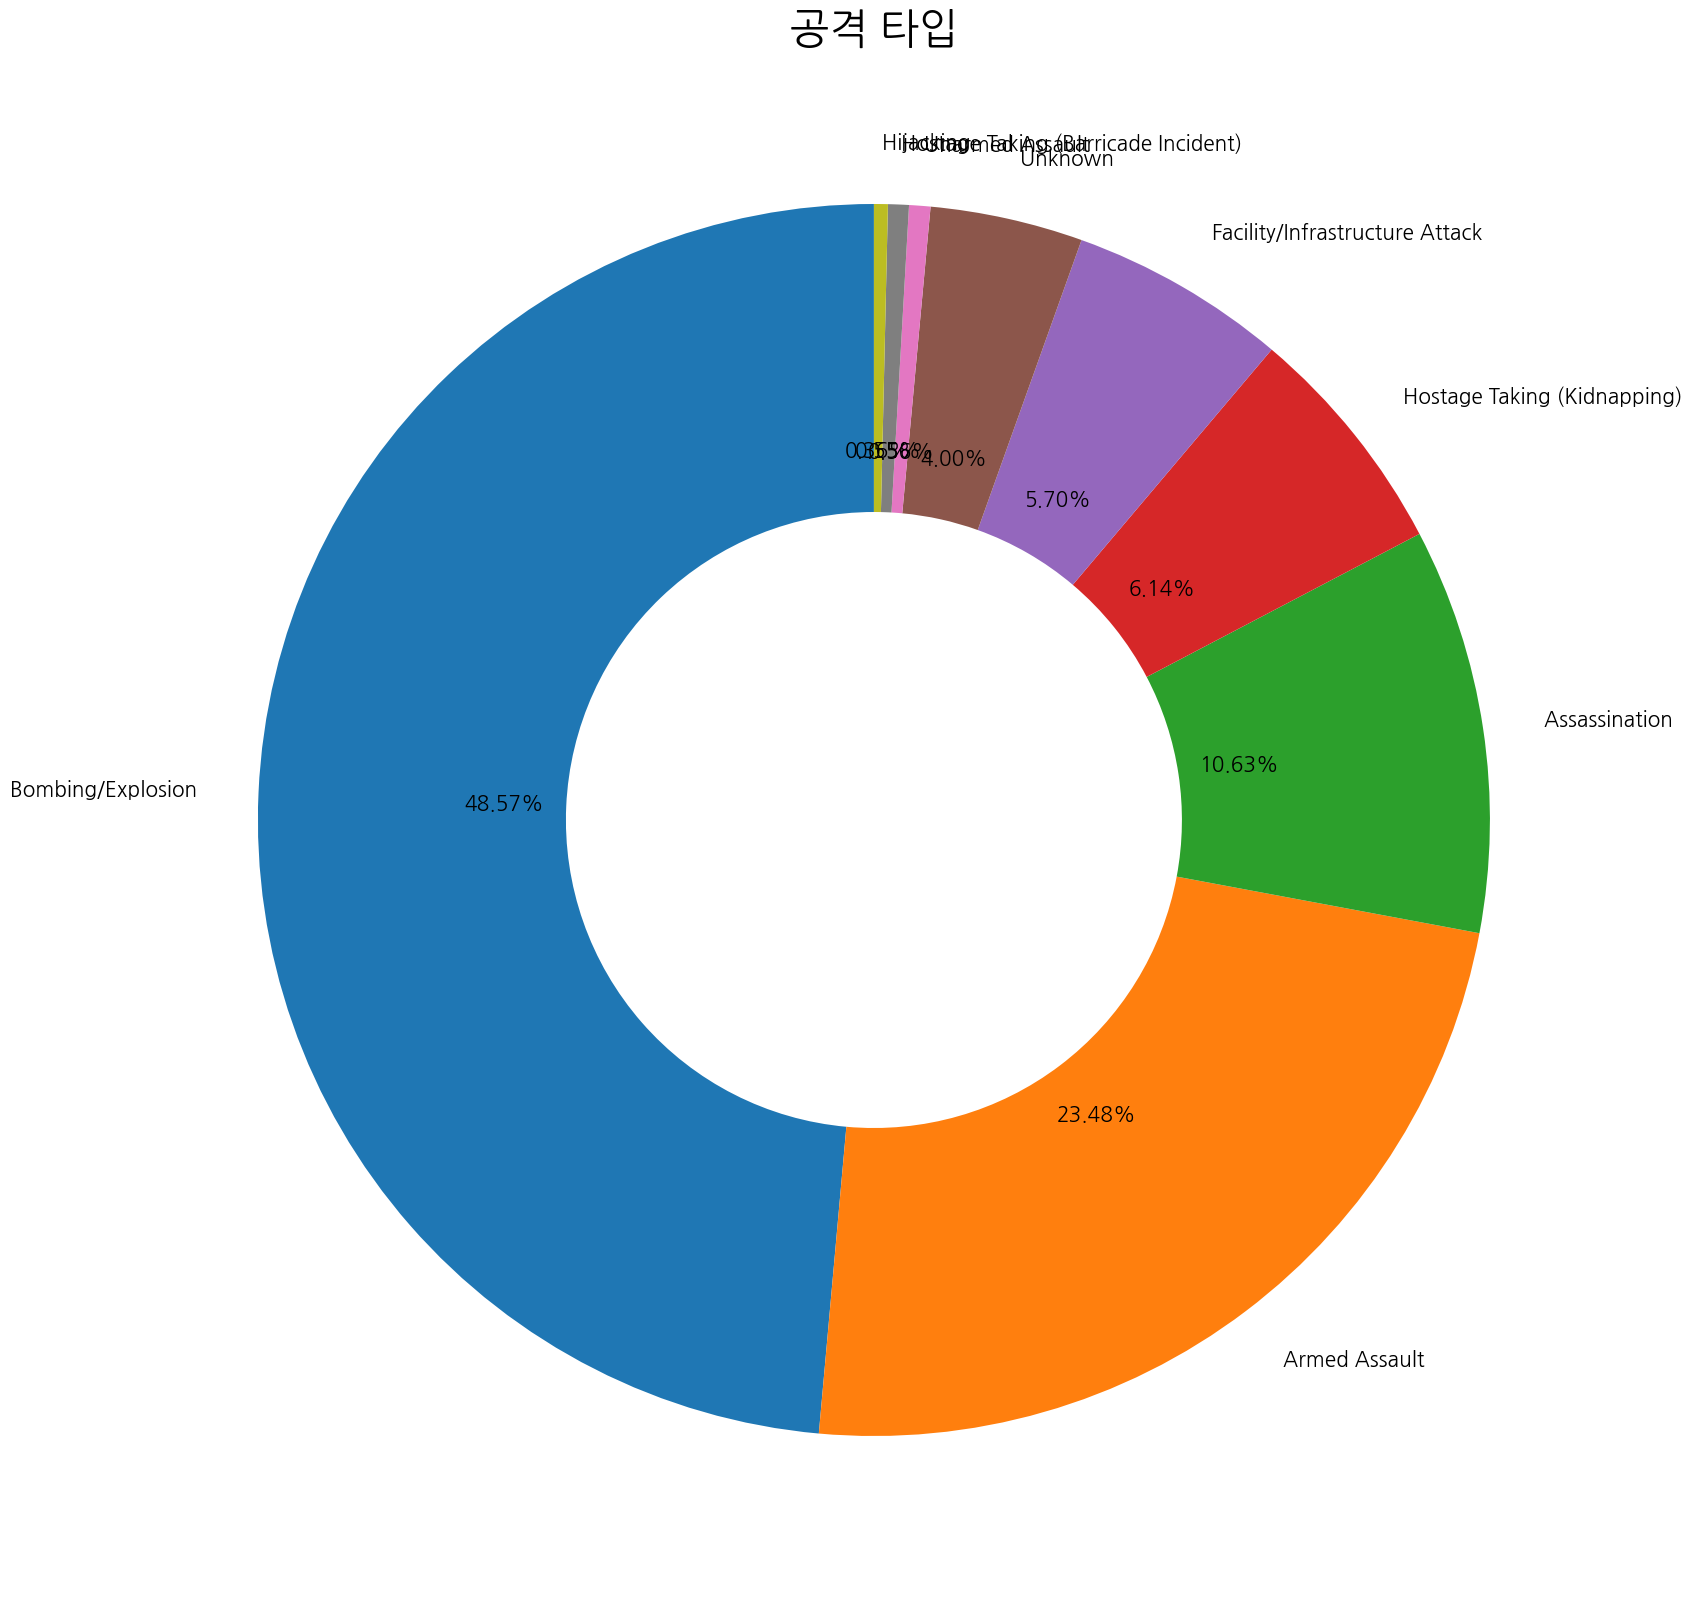

In [37]:
import matplotlib.pyplot as plt
import numpy as np
 
## 데이터 준비
labels = ['Bombing/Explosion','Armed Assault  ','Assassination ','Hostage Taking (Kidnapping) ','Facility/Infrastructure Attack ','Unknown','Unarmed Assault ','Hostage Taking (Barricade Incident)','Hijacking '] ## 라벨

frequency = ['88255','42669','19312','11158','10356','7276','1015',' 991','659'] ## 빈도
 
fig = plt.figure(figsize=(25,20)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
plt.title('공격 타입', size =30)
explode = [0.1,0.1,0,0,0]
ax.pie(frequency, ## 파이차트 출력
       labels=labels, ## 라벨 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=True, ## 반시계 방향으로 파이차트를 그린다.
       autopct=lambda p : '{:.2f}%'.format(p) ## 퍼센티지 출력
       ,textprops = {'size':15},wedgeprops=dict(width=0.5))   # 겹친 문제를 아직 해결하지 못했음 확인은 해보았으나 코드에 적용하지 못하였다 
 
plt.show()

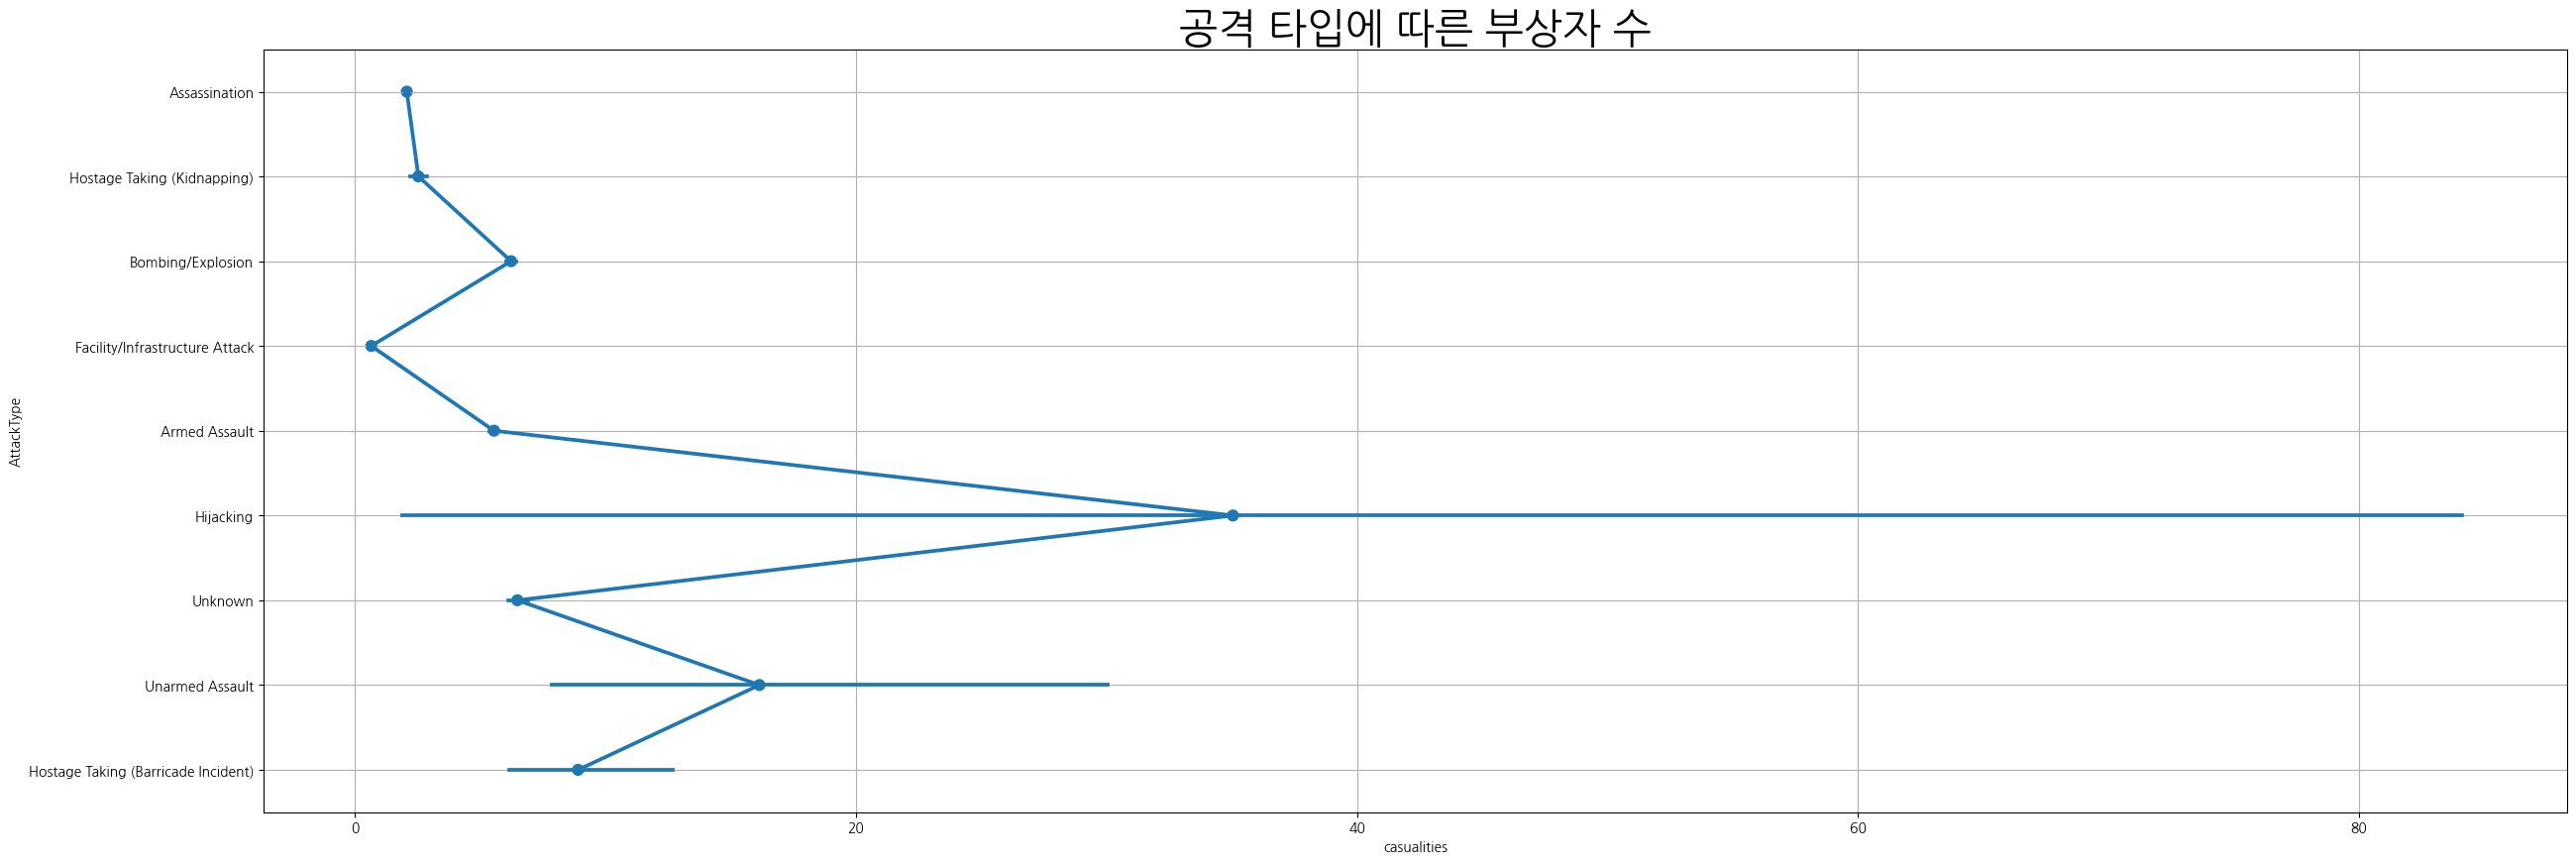

In [38]:
fig, ax = plt.subplots(figsize=(30,10))
sns.pointplot(y='AttackType',x ='casualities', data=terror )
plt.title('공격 타입에 따른 부상자 수', size =30)
plt.grid()
plt.show(); # 사상자를 만듦으로써 공포를 조성 할 것이다 또한 폭탄이 높지만 사망 및 사상자는 적다 미사일은 맞으면 거의 사망으로 가기에 사상자는 많이 없을 것이라 예상 된다.

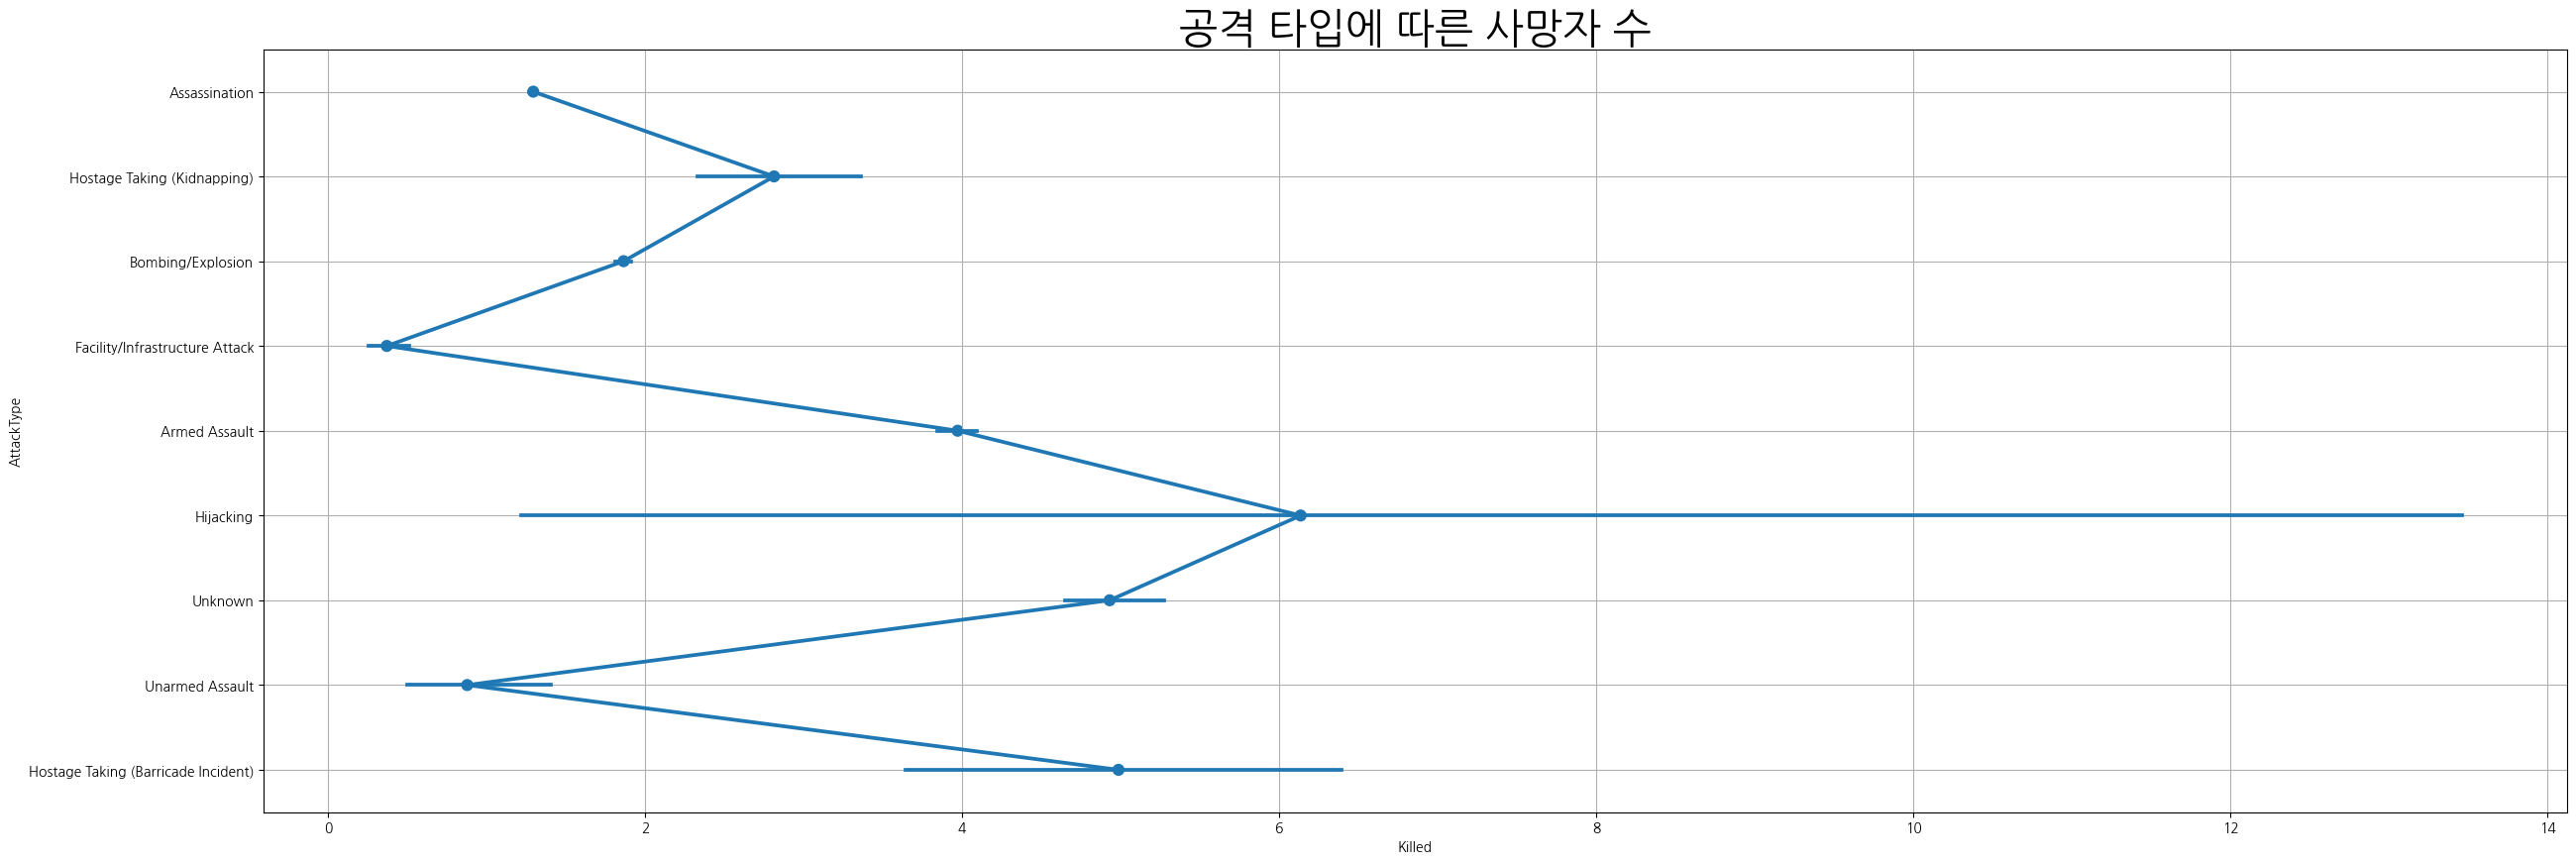

In [39]:
fig, ax = plt.subplots(figsize=(30,10))
sns.pointplot(y='AttackType',x='Killed', data=terror )
plt.title('공격 타입에 따른 사망자 수', size =30)
plt.grid()
plt.show();

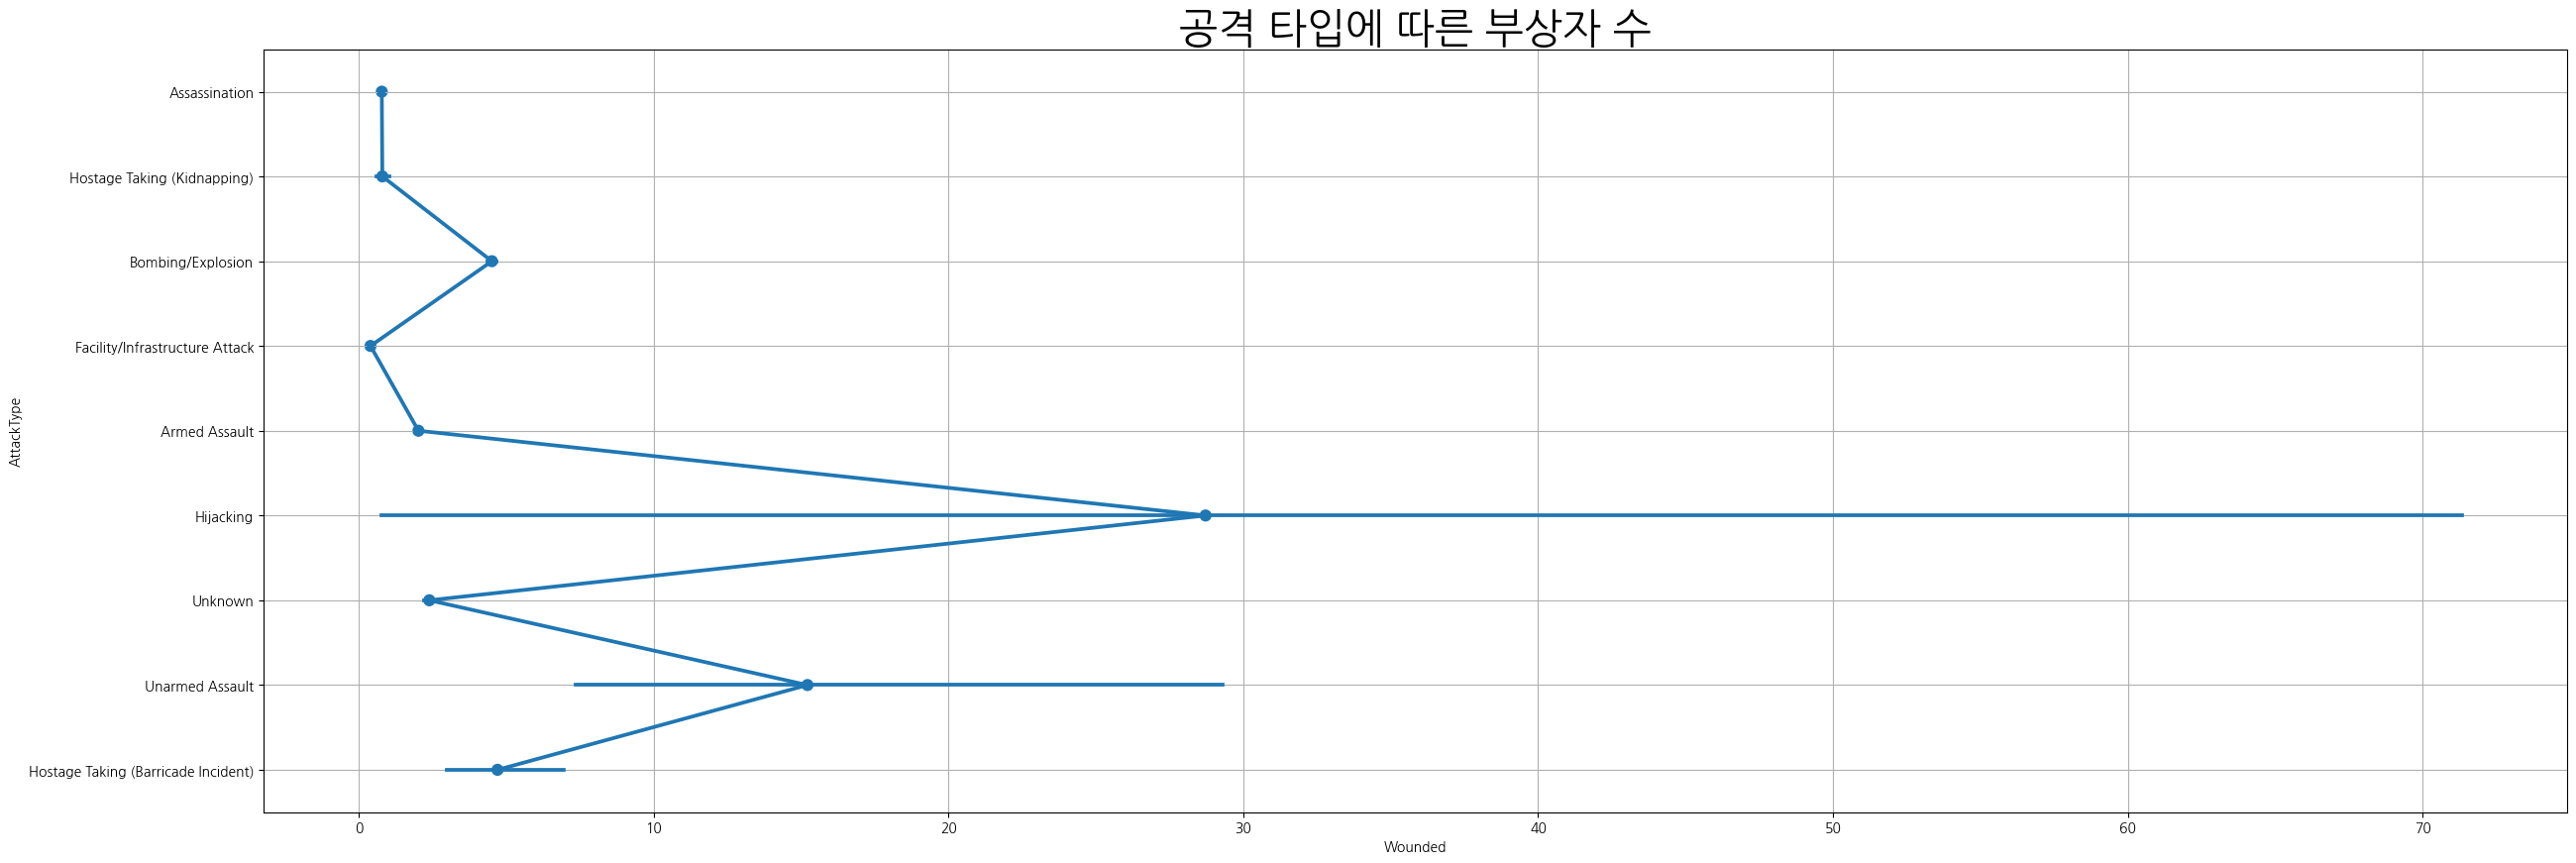

In [40]:
fig, ax = plt.subplots(figsize=(30,10))
sns.pointplot(y='AttackType',x ='Wounded', data=terror )
plt.title('공격 타입에 따른 부상자 수', size =30)
plt.grid()
plt.show(); 

In [41]:
terror['Region']

0         Central America & Caribbean
1                       North America
2                      Southeast Asia
3                      Western Europe
4                           East Asia
                     ...             
181686             Sub-Saharan Africa
181687     Middle East & North Africa
181688                 Southeast Asia
181689                     South Asia
181690                 Southeast Asia
Name: Region, Length: 181691, dtype: object

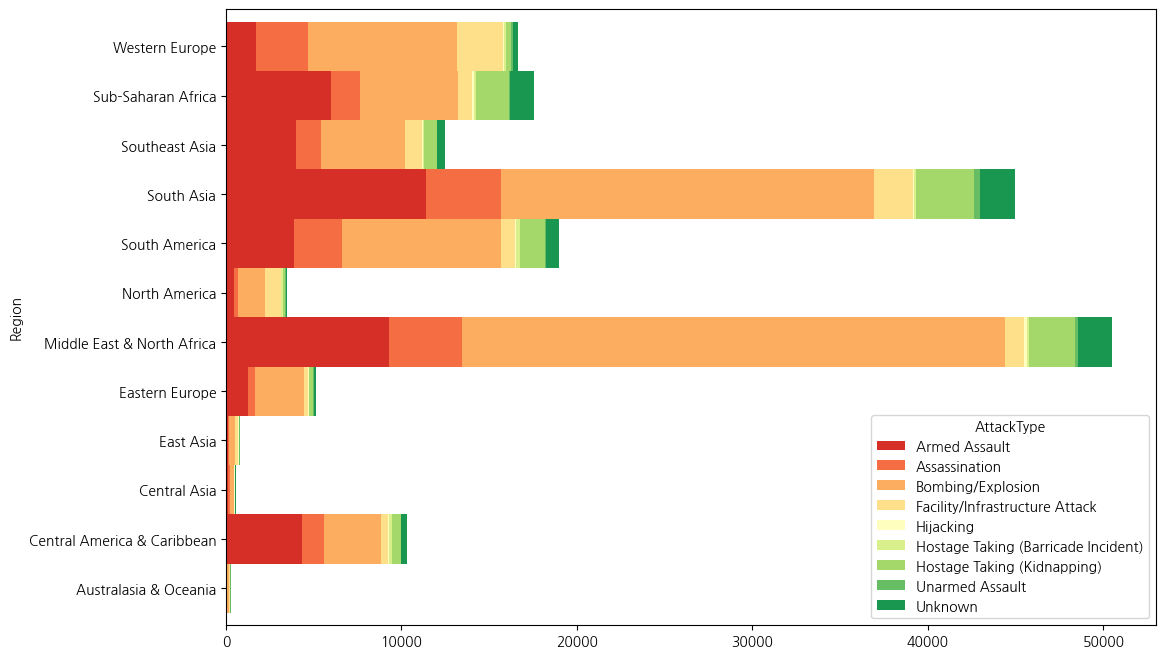

In [42]:
pd.crosstab(terror.Region,terror.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

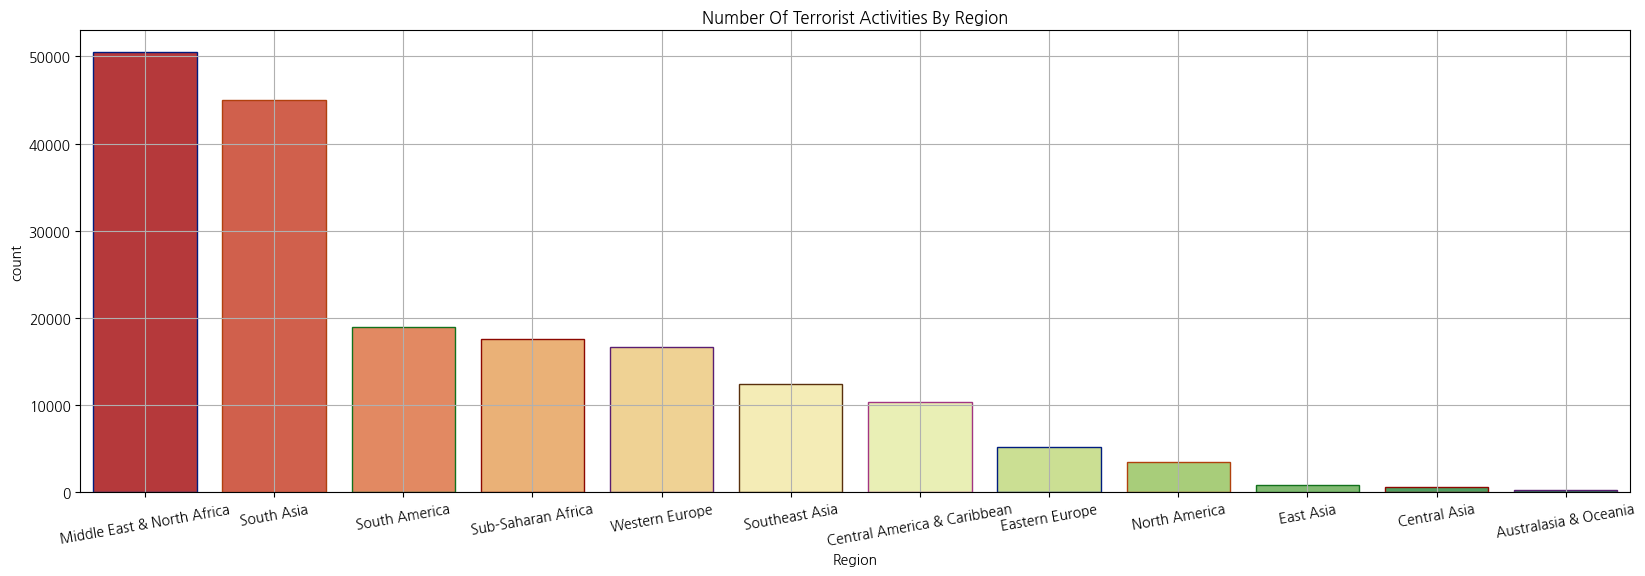

In [50]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(20,6))
sns.countplot(x='Region',data=terror,palette='RdYlGn',edgecolor=sns.color_palette('dark',7),order=terror['Region'].value_counts().index)
plt.xticks(rotation=370)
plt.title('Number Of Terrorist Activities By Region')

plt.grid()
plt.show()

In [258]:
terror.loc[]

Year                                 1977
Month                                   7
Day                                    10
Country                             Syria
Region         Middle East & North Africa
city                               Aleppo
latitude                        36.201721
longitude                        37.14352
AttackType              Bombing/Explosion
Killed                                0.0
Wounded                               0.0
Target           Ministry of the luterior
Summary                               NaN
Group                             Unknown
Target_type          Government (General)
Weapon_type                    Explosives
Motive                                NaN
casualities                           0.0
Name: 5000, dtype: object

# 일단 해본것 복잡해서 쓰이지 않음

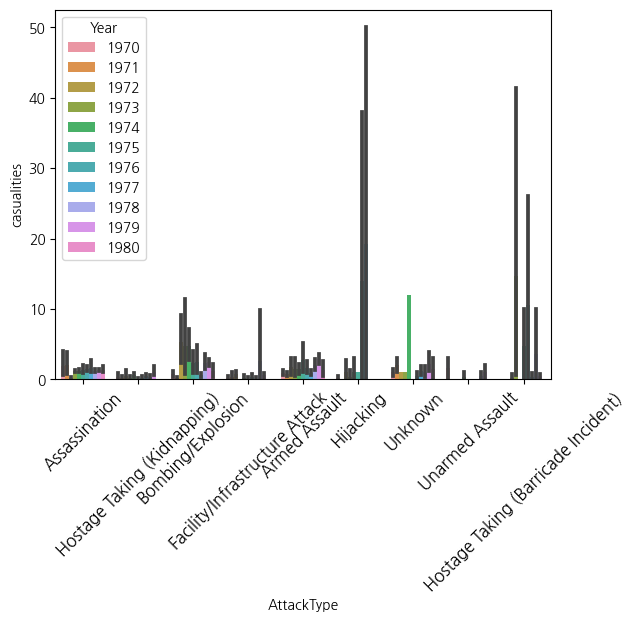

In [259]:
#sns.barplot(data= flights[-100:],x= "month",y= "year")
# ci="sd" # 오차막대 제거
g = sns.barplot(data= terror[:10000],x= "AttackType",y= "casualities", hue="Year")
ax = g

#annotate axis = seaborn axis 
for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
       textcoords='offset points') 

plt.xticks(fontsize=12, rotation=45)  
plt.show()

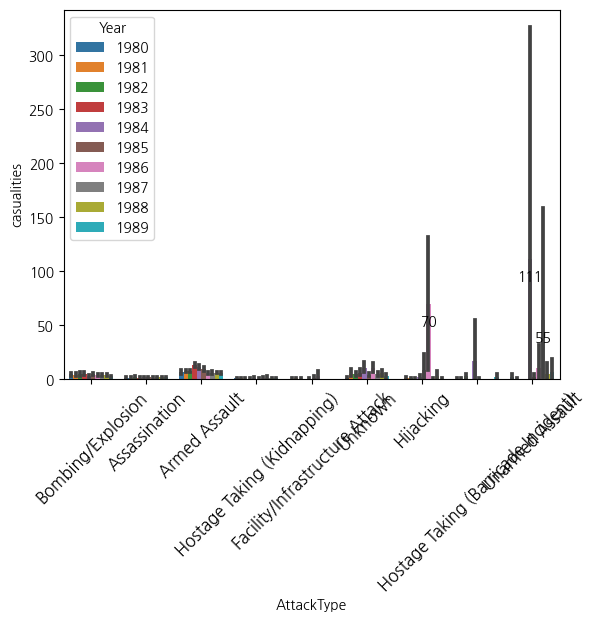

In [260]:
#sns.barplot(data= flights[-100:],x= "month",y= "year")
# ci="sd" # 오차막대 제거
g = sns.barplot(data= terror[10000:40000],x= "AttackType",y= "casualities", hue="Year")
ax = g

#annotate axis = seaborn axis 
for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
       textcoords='offset points') 

plt.xticks(fontsize=12, rotation=45)
plt.show()

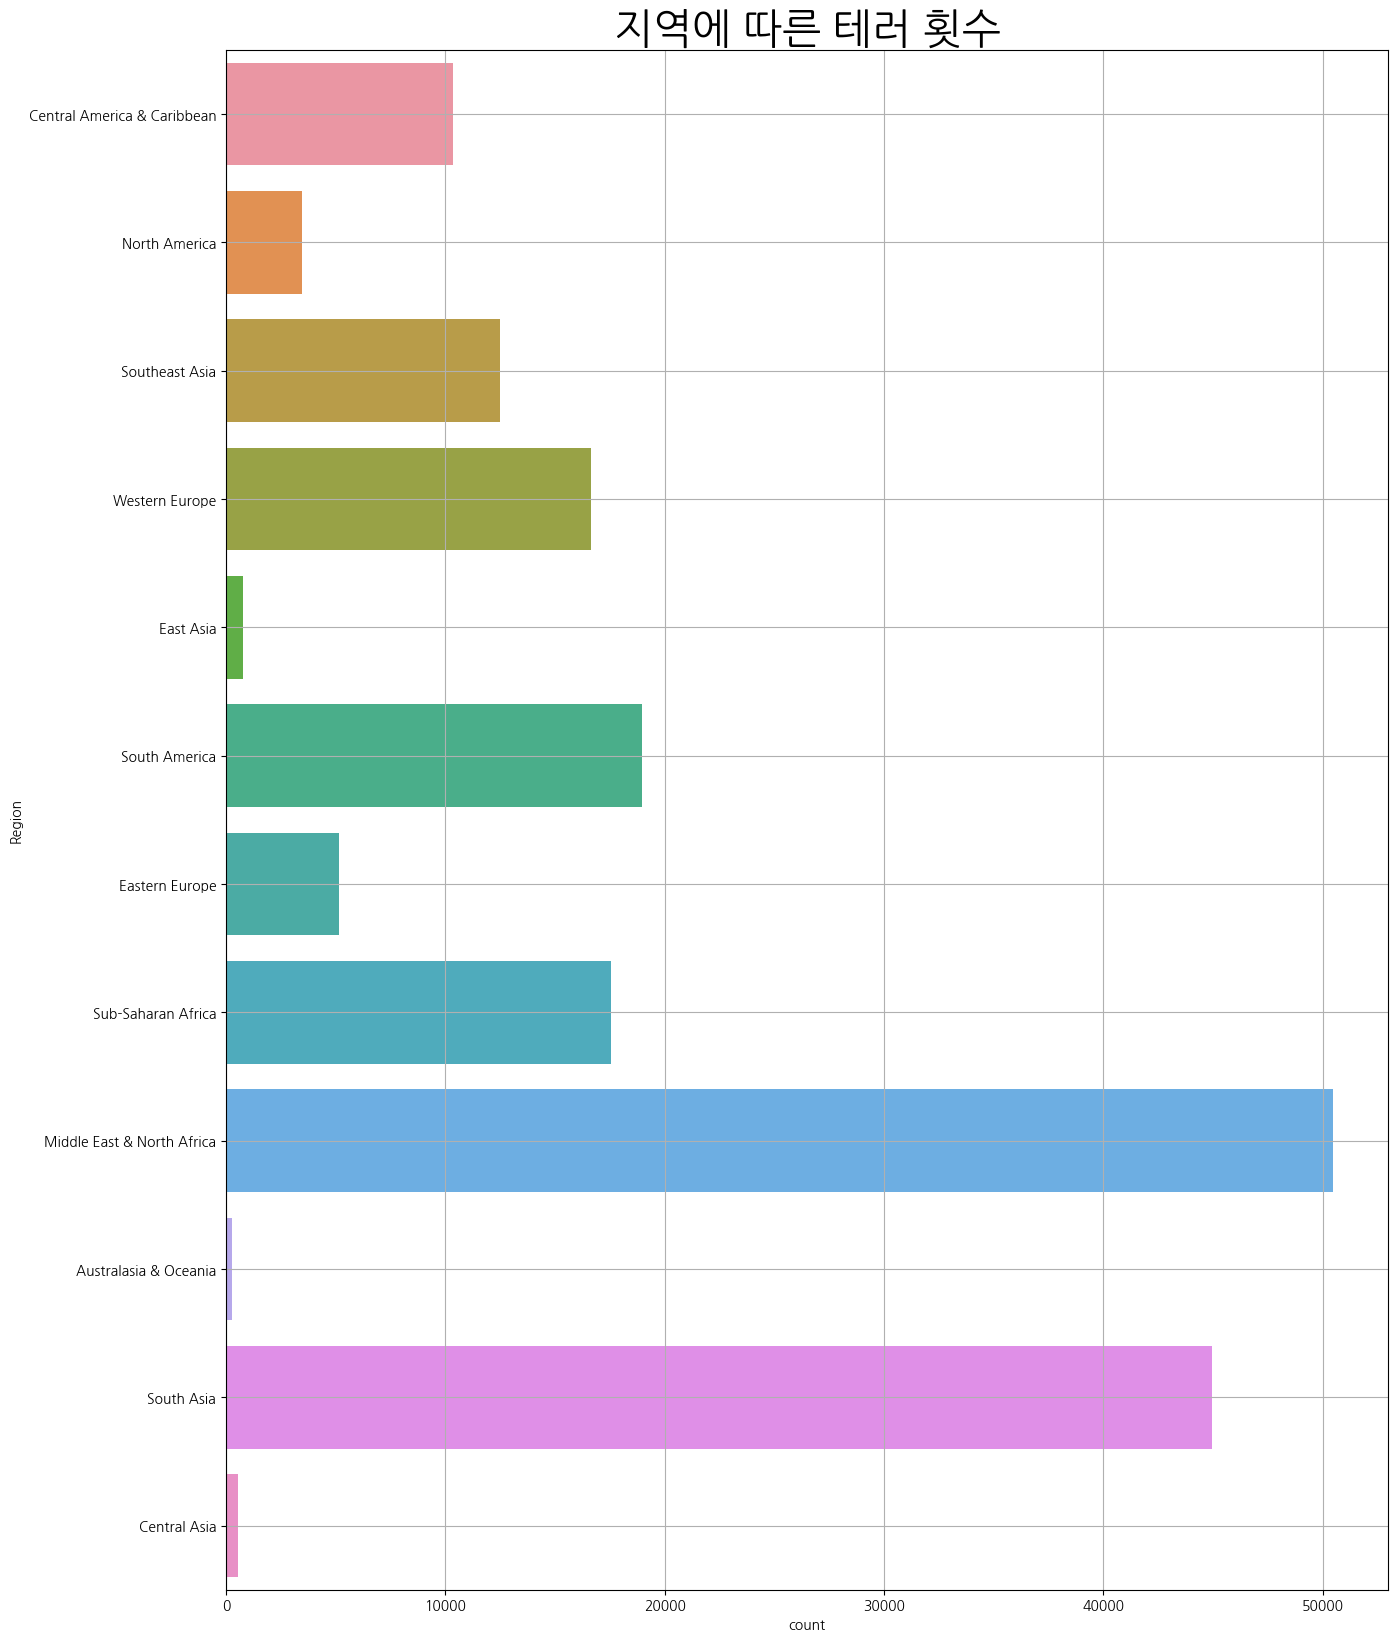

In [588]:
plt.show()
fig, ax = plt.subplots(figsize=(15,20))
sns.countplot(y='Region', data=terror ) #지역에 따른 테러 횟수
plt.title('지역에 따른 테러 횟수', size =30)
plt.grid()
plt.show();

In [262]:
terror['Region'].value_counts()

Region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: count, dtype: int64

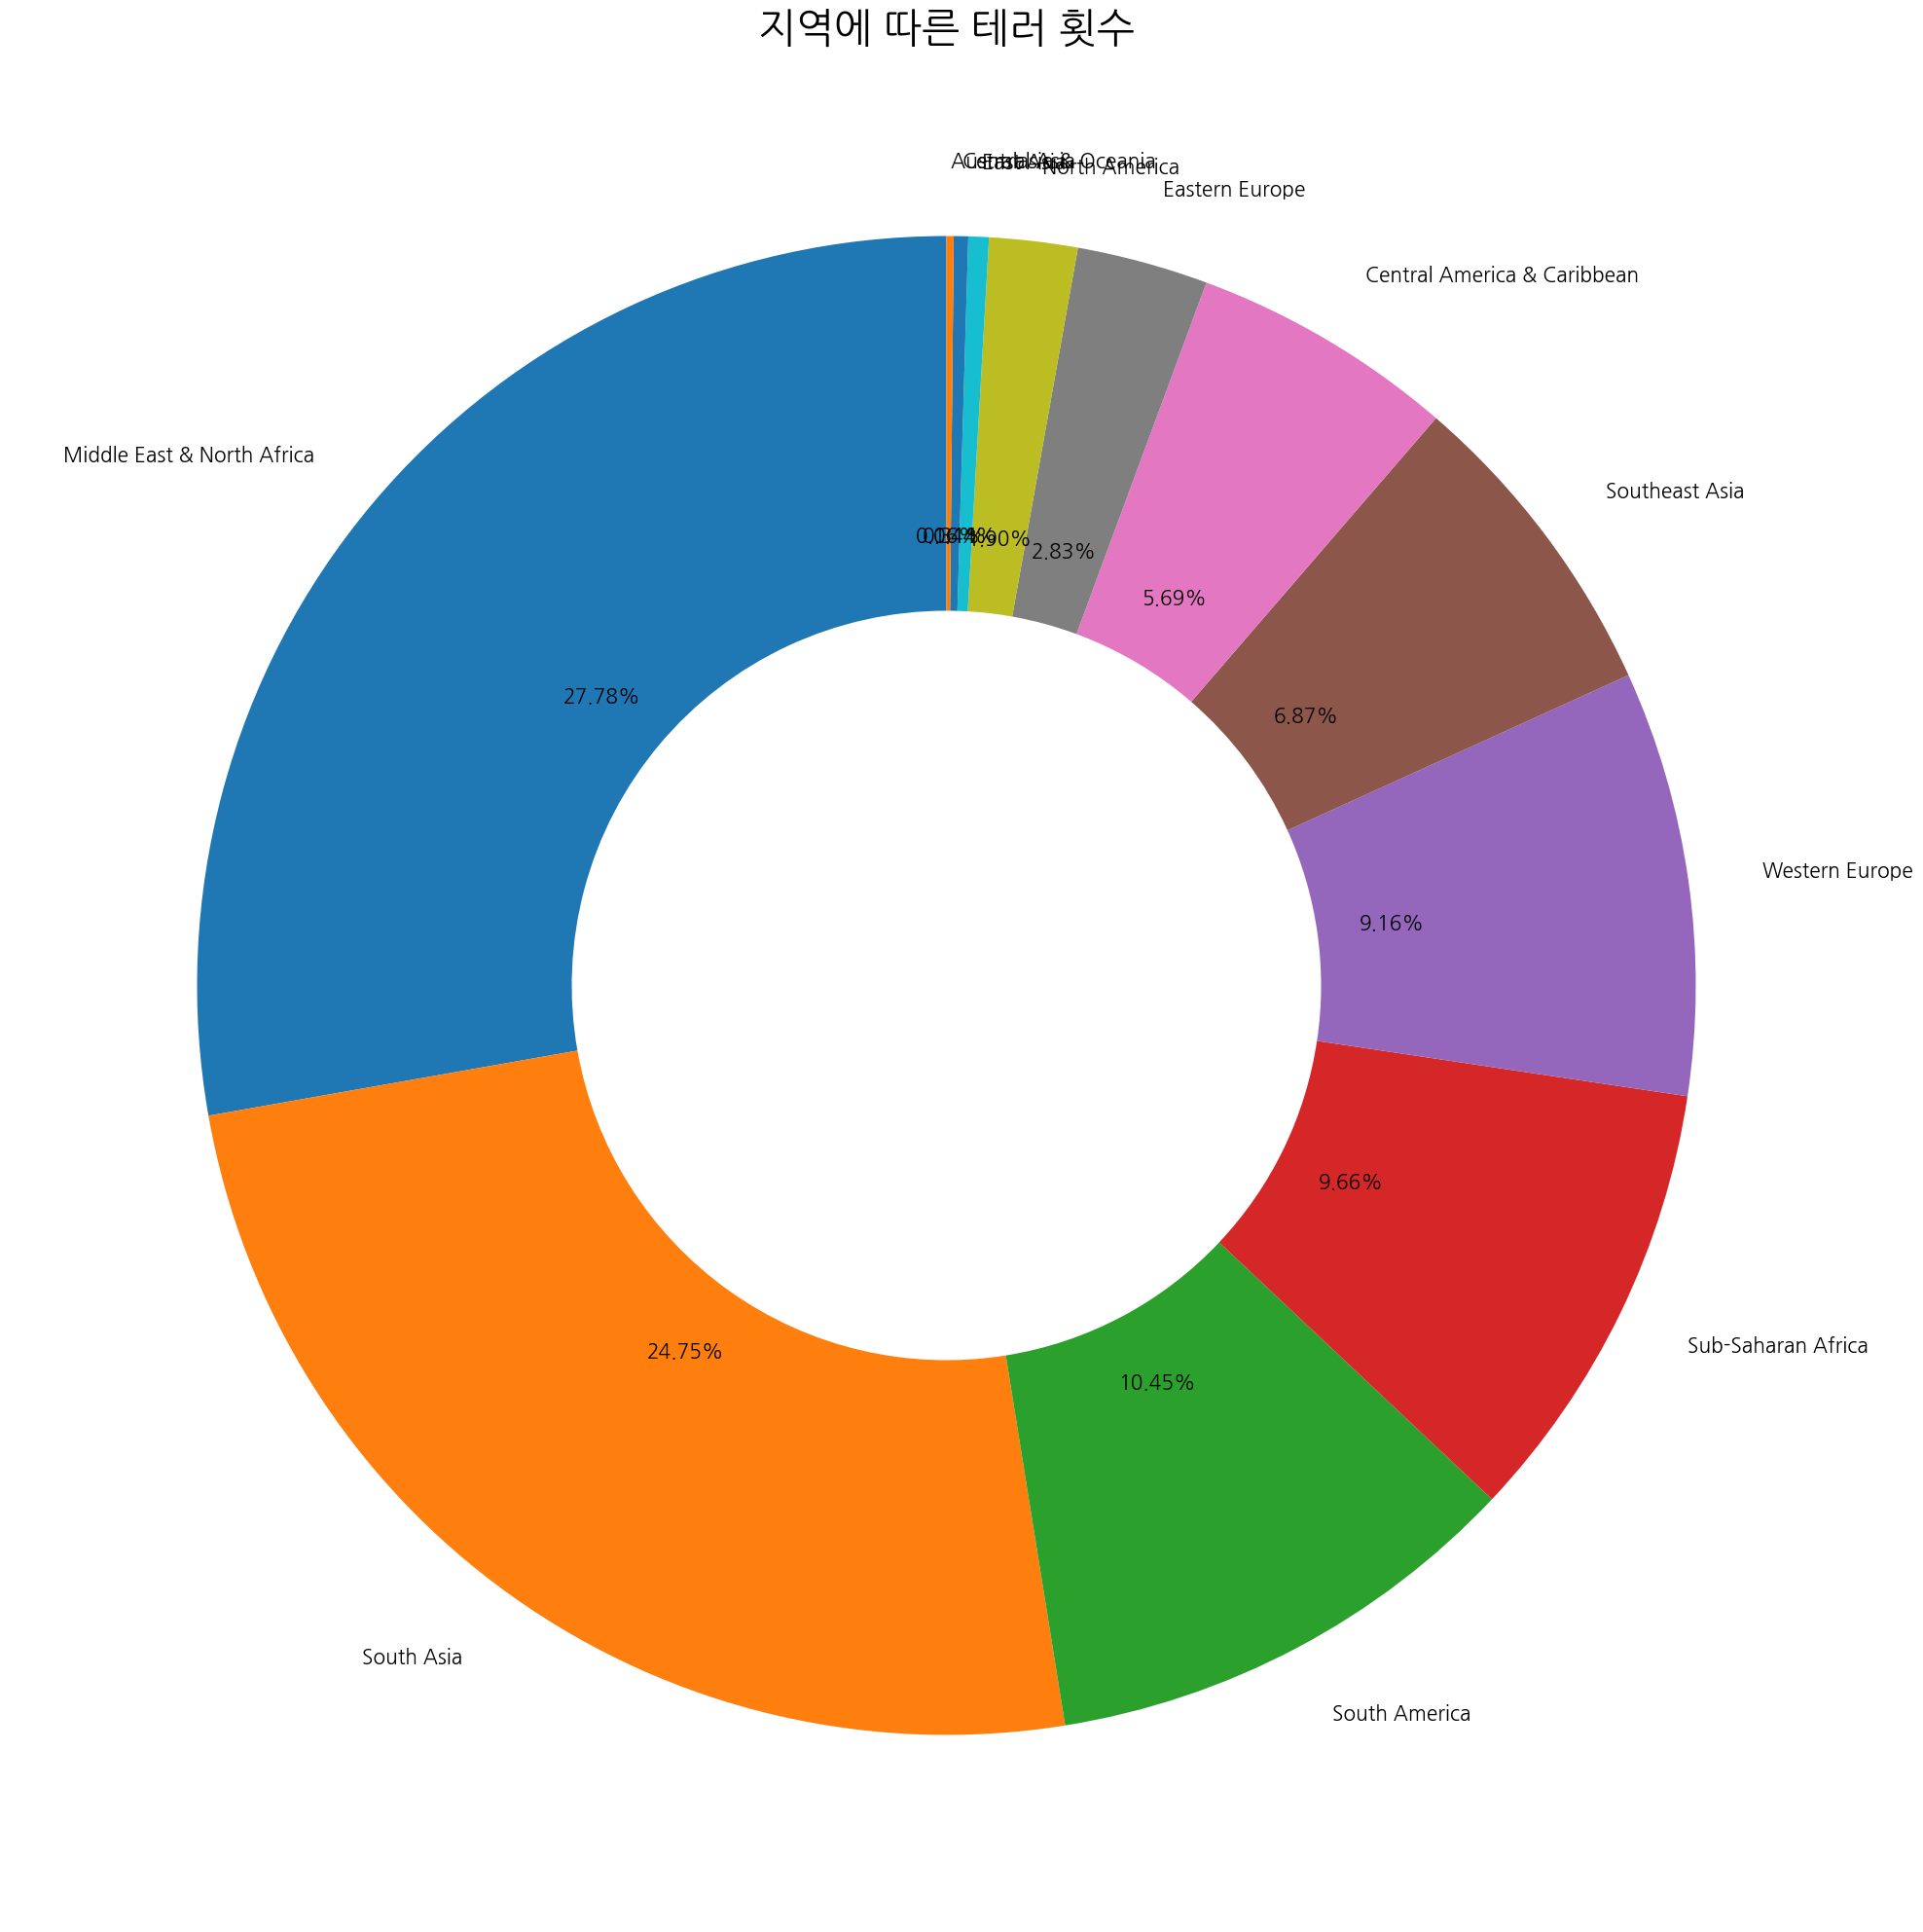

In [550]:
import matplotlib.pyplot as plt
import numpy as np
 
## 데이터 준비
labels = ['Middle East & North Africa','South Asia ','South America ','Sub-Saharan Africa ','Western Europe','Southeast Asia ','Central America & Caribbean ','Eastern Europe ','North America','East Asia','Central Asia','Australasia & Oceania '] ## 라벨
frequency = ['50474','44974','18978','17550','16639','12485','10344','5144','3456','802','563','282'] ## 빈도
 
fig = plt.figure(figsize=(32,25)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
plt.title('지역에 따른 테러 횟수', size = 30)
explode = [0.1,0.1,0,0,0]
ax.pie(frequency, ## 파이차트 출력
       labels=labels, ## 라벨 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=True, ## 반시계 방향으로 파이차트를 그린다.
       autopct=lambda p : '{:.2f}%'.format(p) ## 퍼센티지 출력
       ,textprops = {'size':15},wedgeprops=dict(width=0.5))
#total = np.sum(frequency) ## 빈도수 합
 
plt.show()

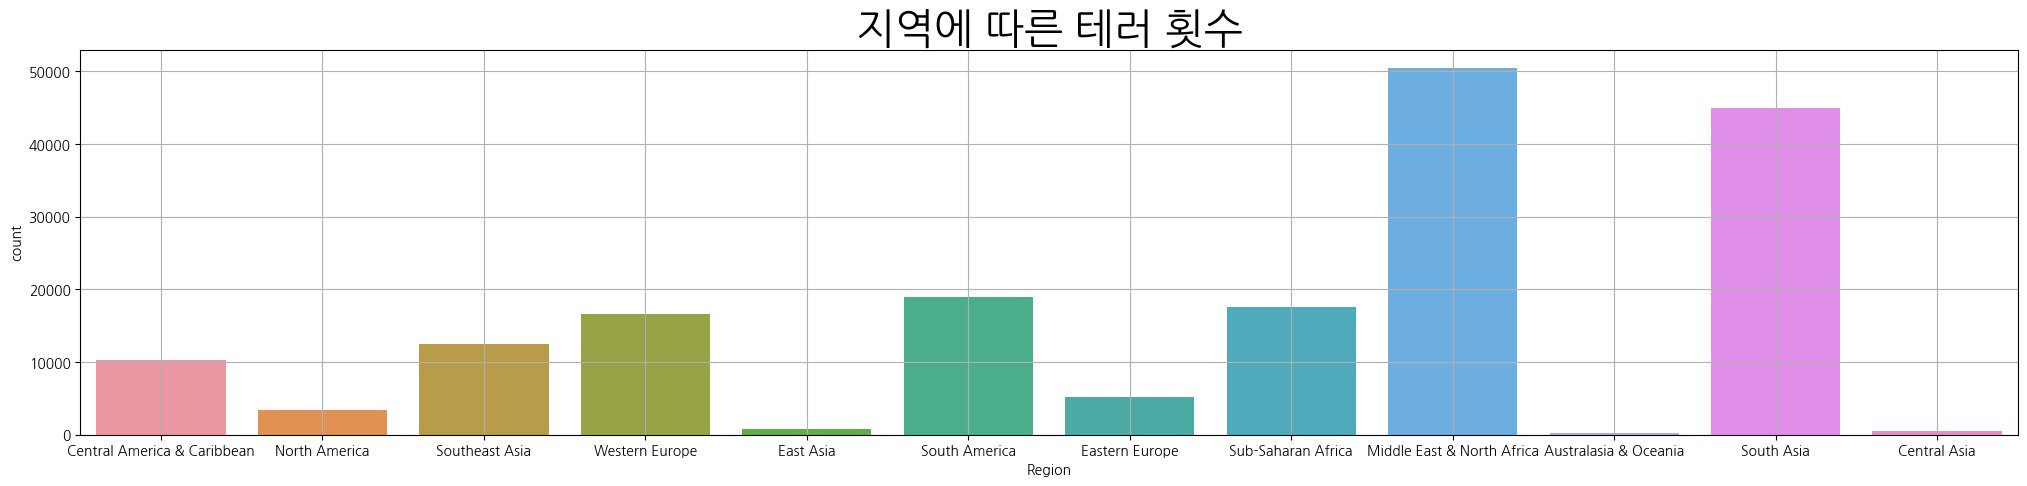

In [589]:
fig, ax = plt.subplots(figsize=(25,5))
sns.countplot(x='Region', data=terror )
plt.title('지역에 따른 테러 횟수', size = 30)
plt.grid()
plt.show();

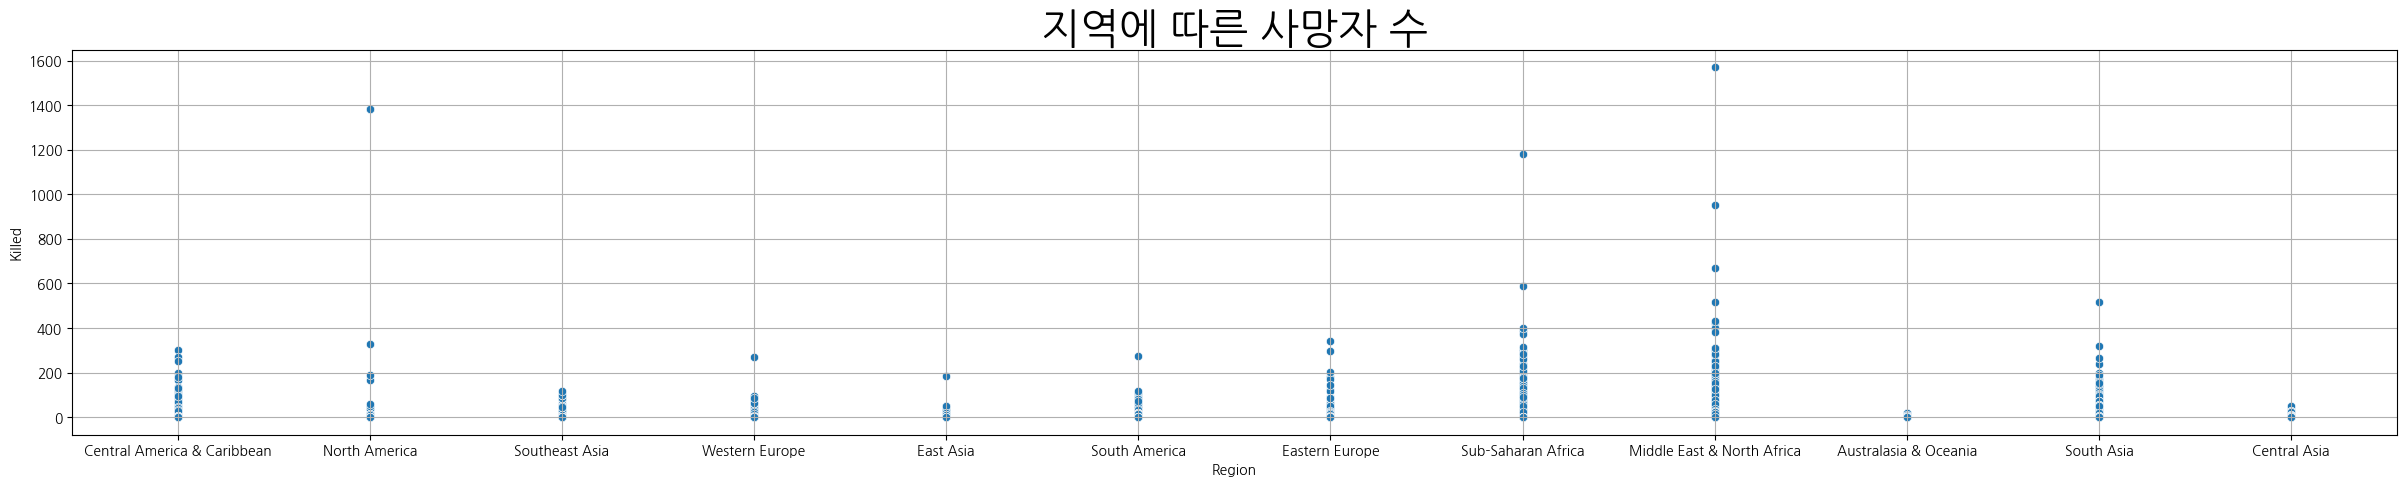

In [590]:
fig, ax = plt.subplots(figsize=(30,5))
sns.scatterplot(x='Region',y ='Killed', data=terror )
plt.title('지역에 따른 사망자 수', size = 30)
plt.grid()
plt.show();

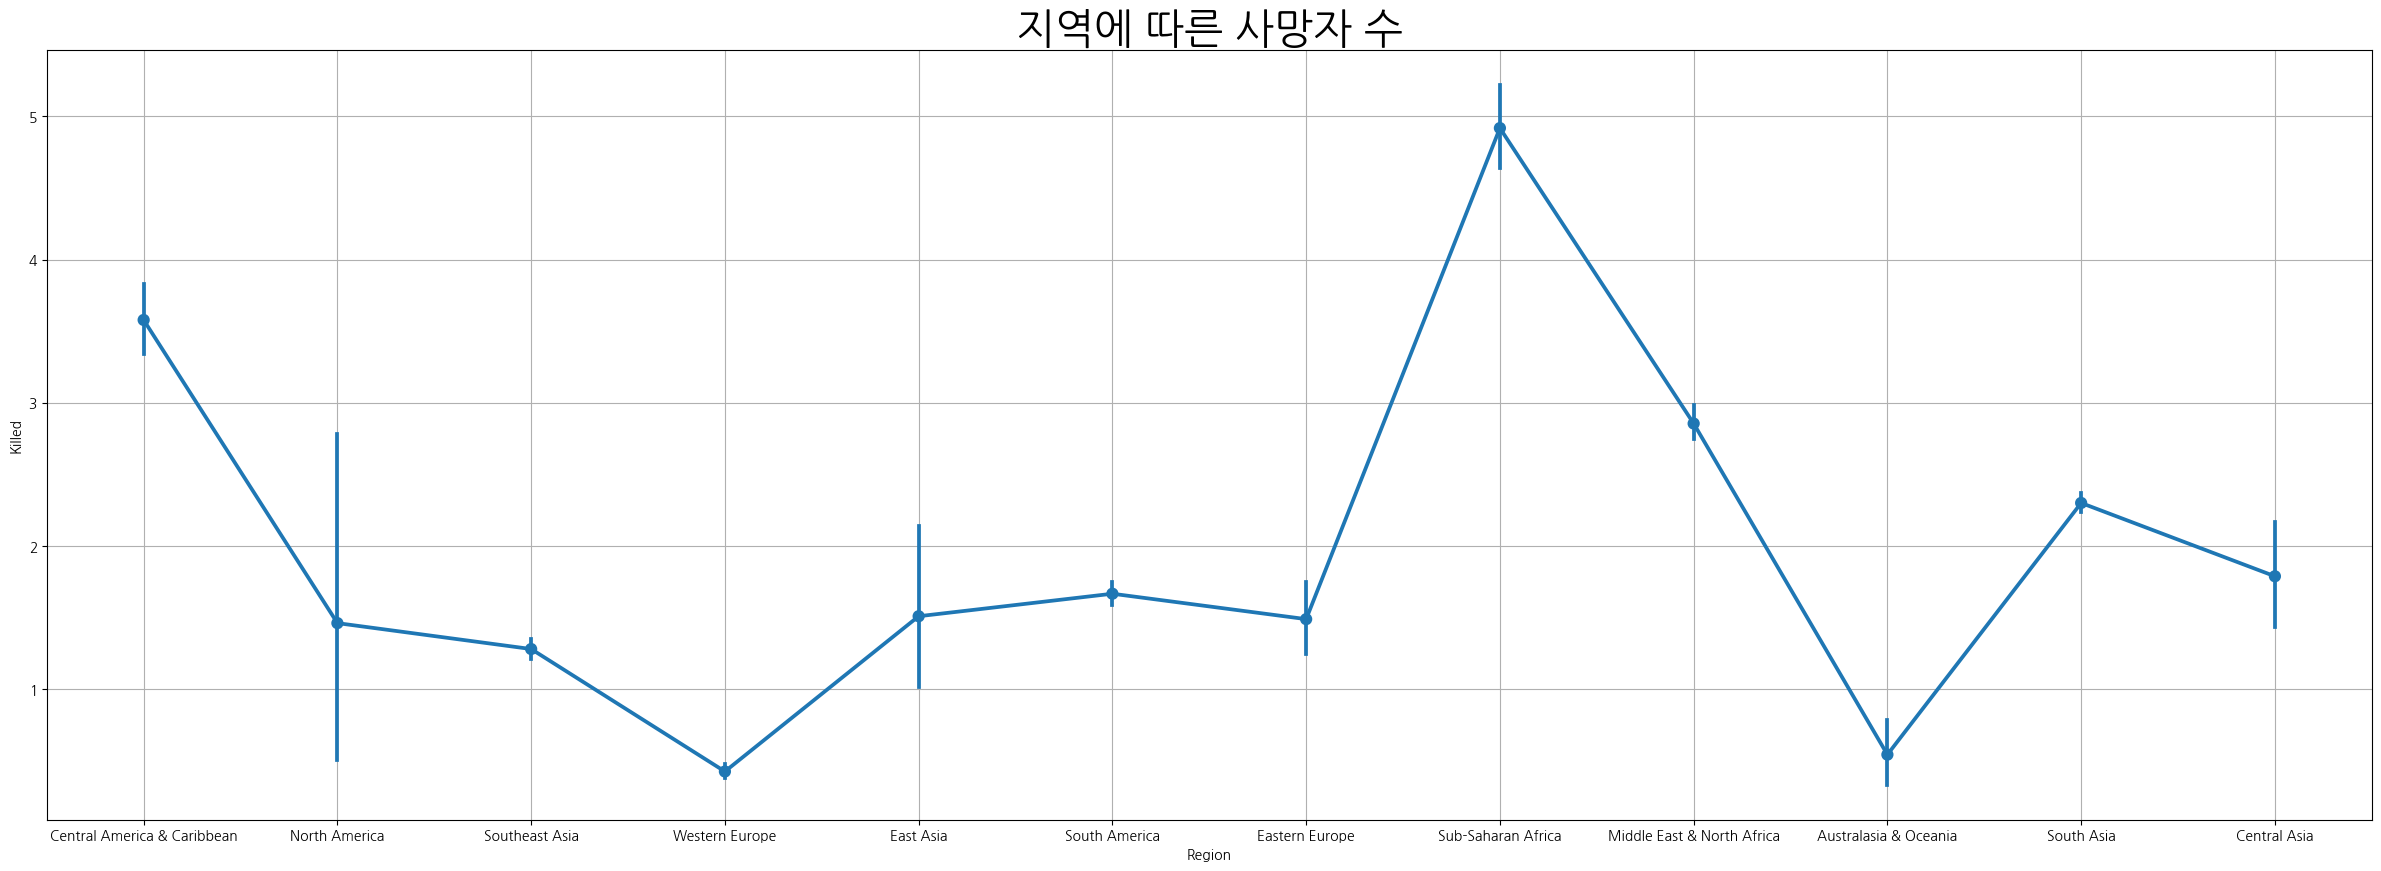

In [591]:
fig, ax = plt.subplots(figsize=(30,10))
sns.pointplot(x='Region',y ='Killed', data=terror )
plt.title('지역에 따른 사망자 수', size = 30)
plt.grid()
plt.show();

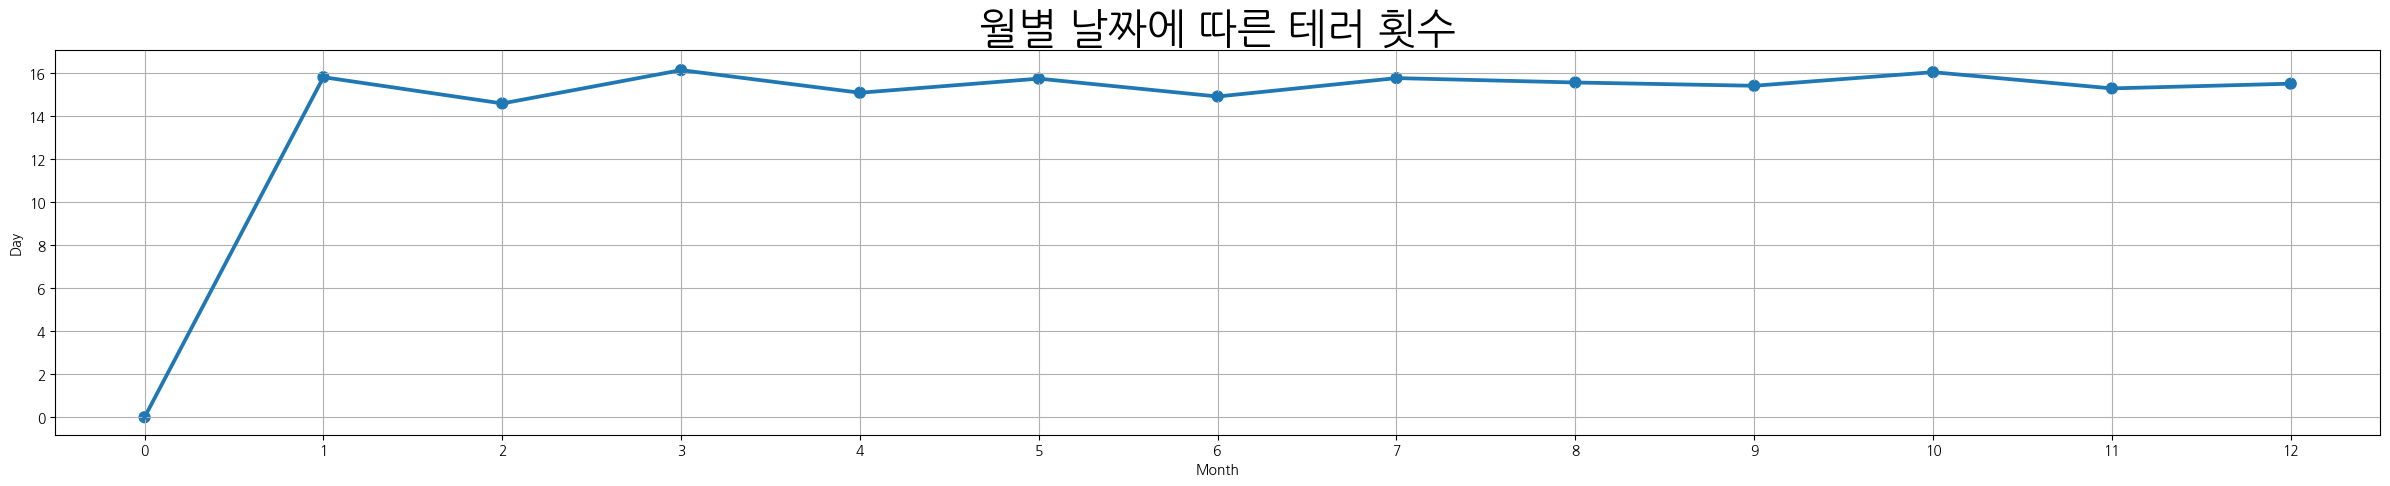

In [592]:
fig, ax = plt.subplots(figsize=(30,5))
sns.pointplot(x='Month',y ='Day', data=terror )
plt.title('월별 날짜에 따른 테러 횟수', size = 30)
plt.grid()
plt.show();

# s2 테러가 많이 일어난 국가 상위 10개

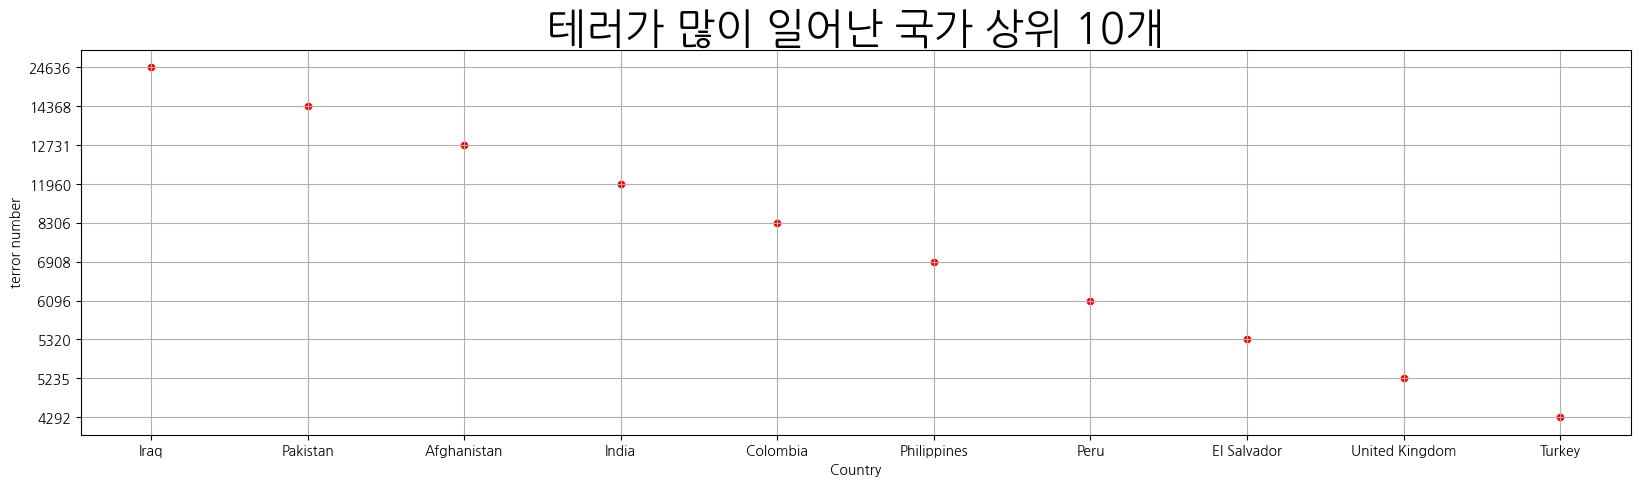

In [555]:
fig, ax = plt.subplots(figsize=(20,5))
sns.scatterplot(x='Country', y ='terror number', data=terror_top_10dff, c='red') 
plt.title('테러가 많이 일어난 국가 상위 10개', size = 30)
plt.grid()
plt.show()

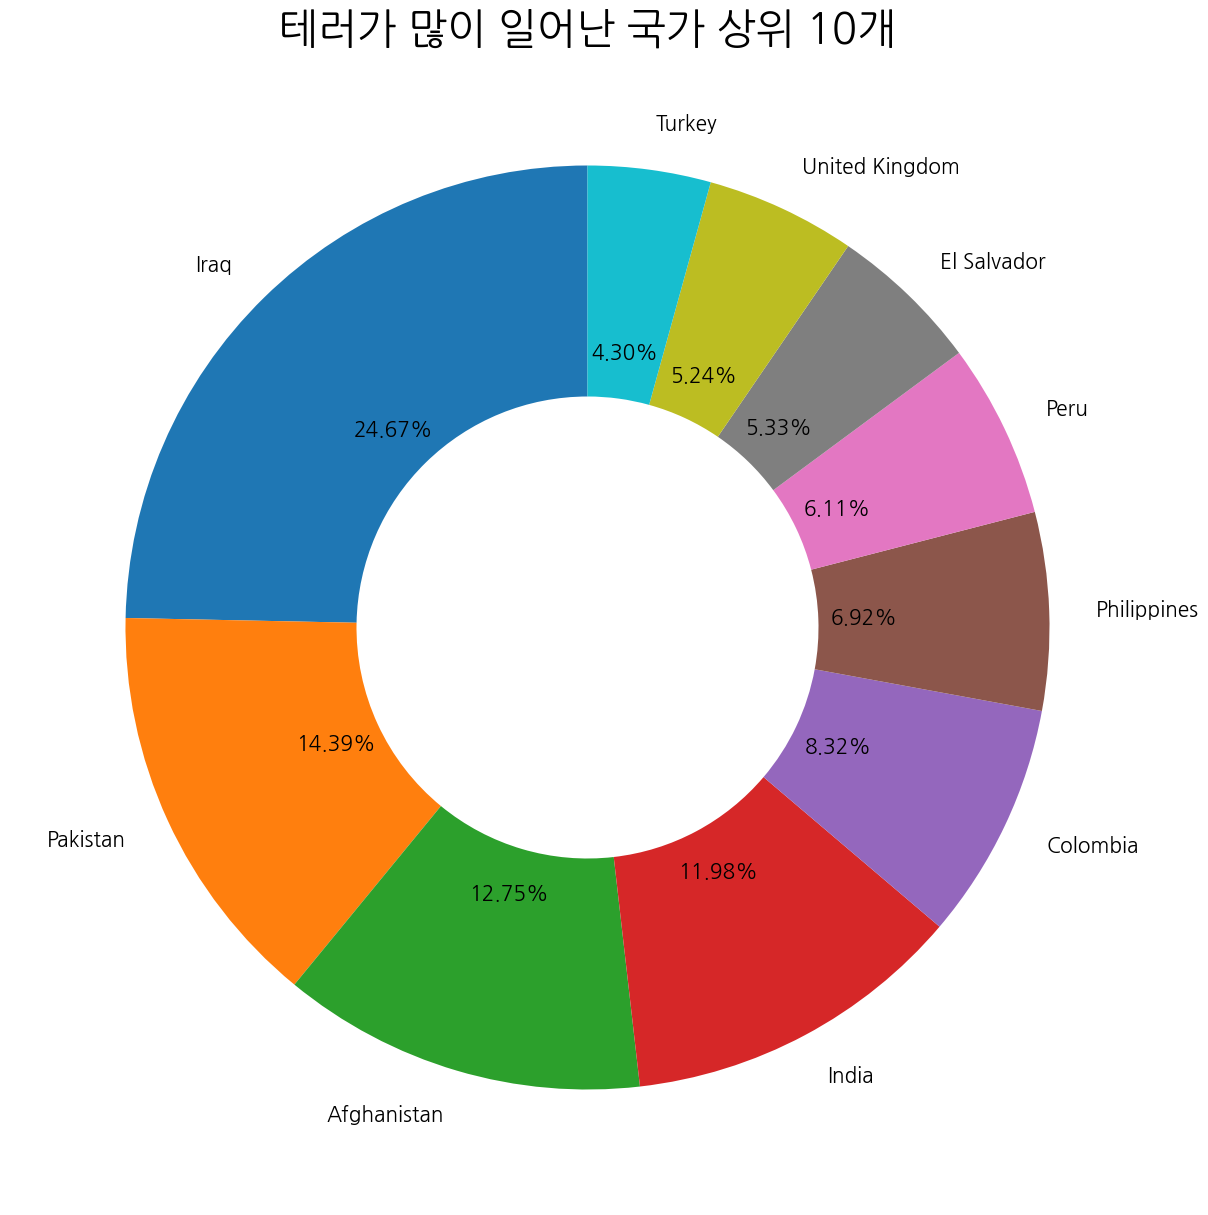

In [556]:
import matplotlib.pyplot as plt
import numpy as np
 
## 데이터 준비
labels = ['Iraq','Pakistan','Afghanistan','India','Colombia','Philippines','Peru','El Salvador','United Kingdom','Turkey'] ## 라벨
frequency = ['24636','14368','12731','11960','8306','6908','6096','5320','5235','4292'] ## 빈도
 
fig = plt.figure(figsize=(20,15)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
plt.title('테러가 많이 일어난 국가 상위 10개', size = 30)
ax.pie(frequency, ## 파이차트 출력
       labels=labels, ## 라벨 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=True, ## 반시계 방향으로 파이차트를 그린다.
       autopct=lambda p : '{:.2f}%'.format(p) ## 퍼센티지 출력
       ,textprops = {'size':15},wedgeprops=dict(width=0.5))
 
plt.show()

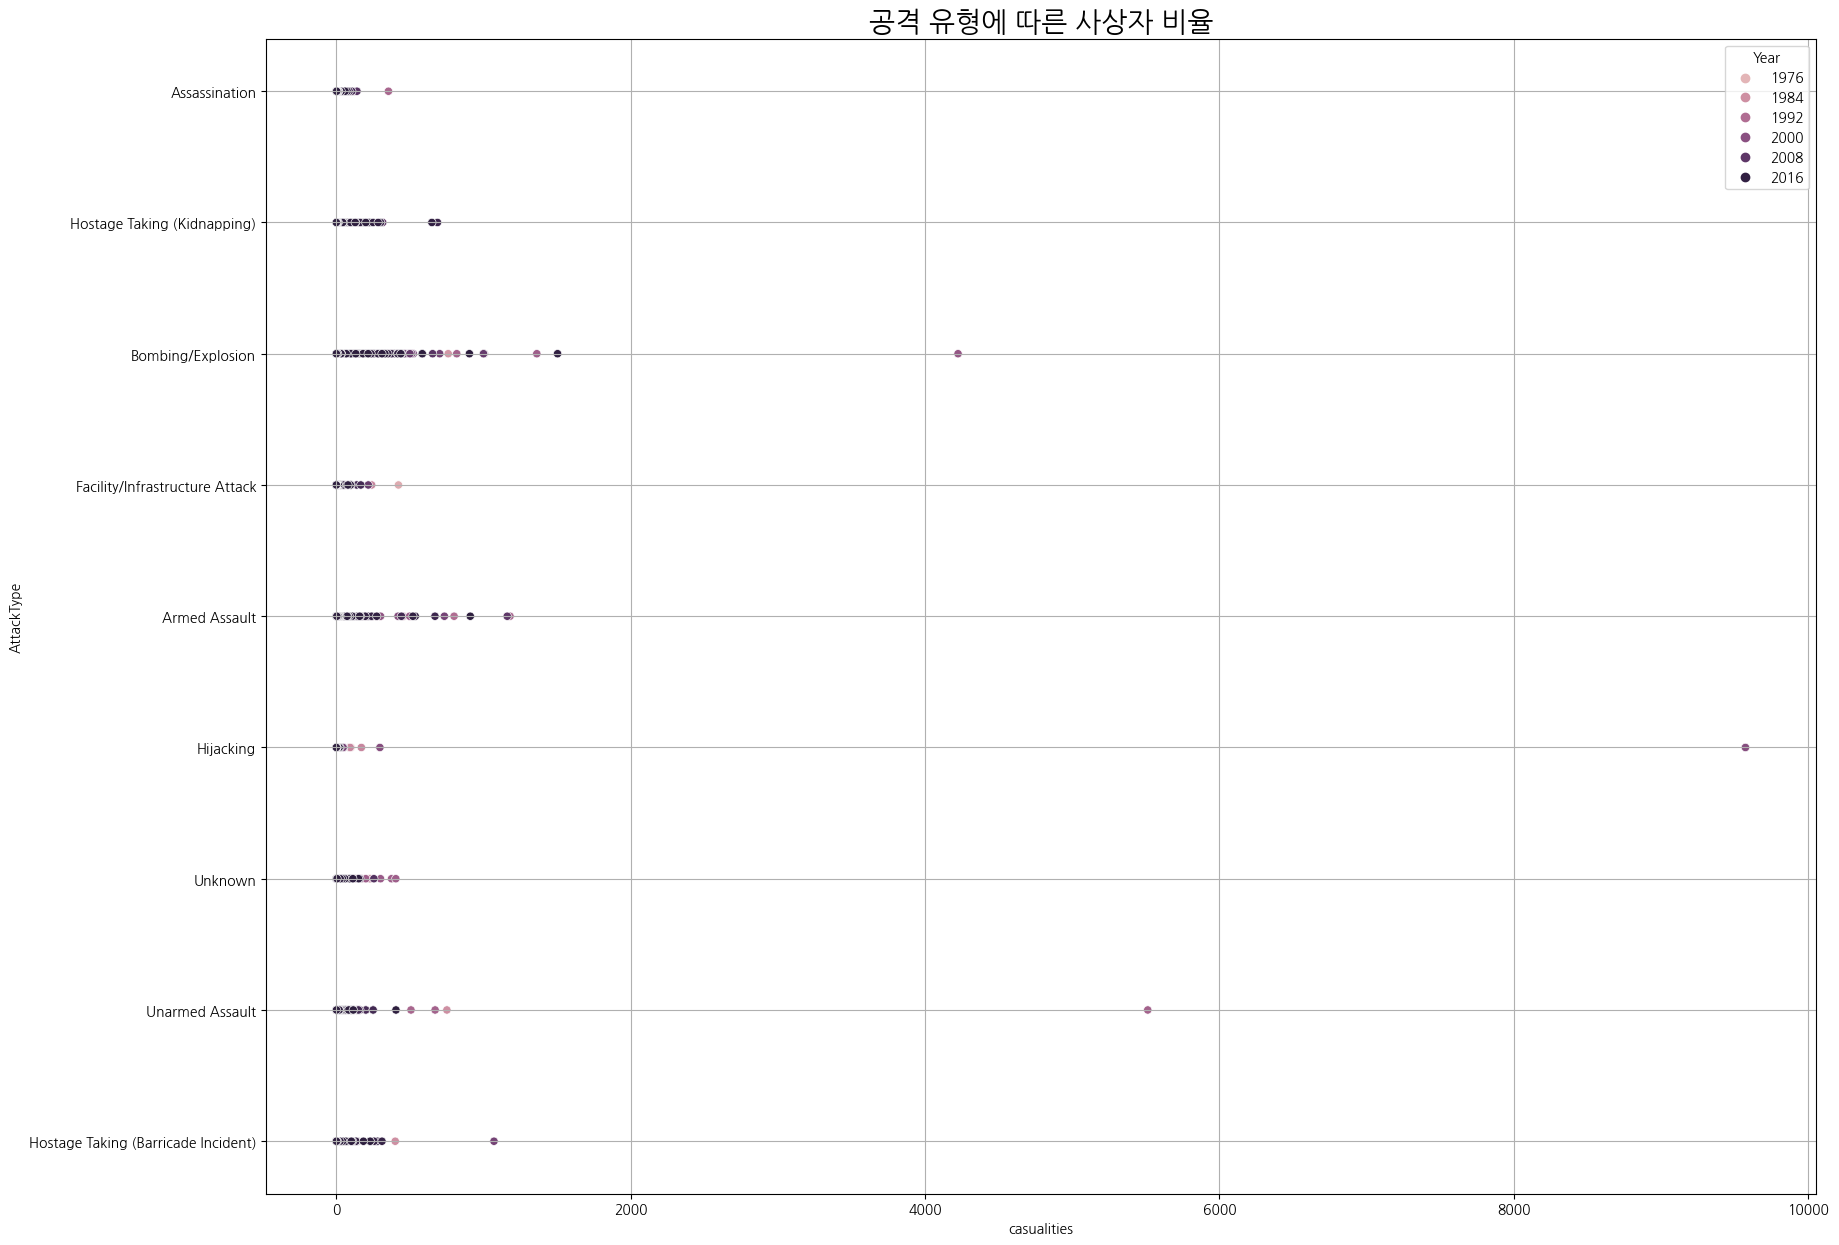

In [557]:
fig, ax = plt.subplots(figsize=(20,15))
sns.scatterplot(y='AttackType', x='casualities',data=terror,  hue='Year')   #palette=['dodgerblue','red','green','orange','brown']
plt.title('공격 유형에 따른 사상자 비율', size ='20')
plt.grid()
plt.show()

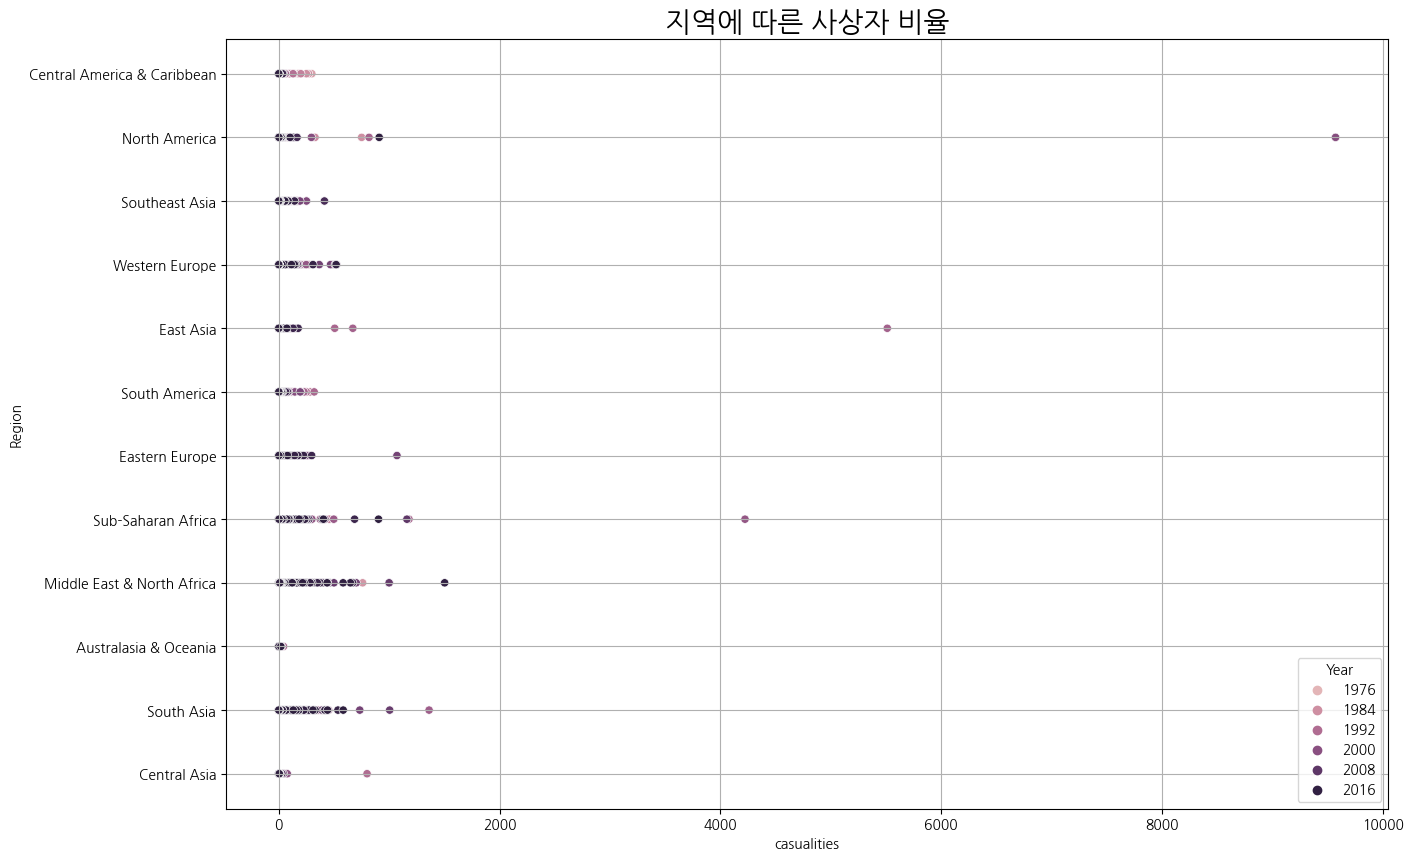

In [558]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=terror ,y='Region', x='casualities',hue='Year')
plt.title('지역에 따른 사상자 비율',size ='20')
plt.grid()
plt.show()

In [54]:
terror_top.tail(10)

국가
Vatican City           1
Falkland Islands       1
St. Lucia              1
North Korea            1
New Hebrides           1
International          1
Wallis and Futuna      1
South Vietnam          1
Andorra                1
Antigua and Barbuda    1
Name: count, dtype: int64

In [272]:
len(terror['Group'].unique())

3537

In [273]:
len(terror['AttackType'].unique())  #할만하다.

9

In [275]:
len(terror['Weapon_type'].unique()) # 할만하다.

12

In [277]:
len(terror['Region'].unique())

12

In [278]:
terror.loc[ :,['Year','Month','Day']]

Year  Month  Day
0       1970      7    2
1       1970      0    0
2       1970      1    0
3       1970      1    0
4       1970      1    0
...      ...    ...  ...
181686  2017     12   31
181687  2017     12   31
181688  2017     12   31
181689  2017     12   31
181690  2017     12   31

[181691 rows x 3 columns]

In [279]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   city         181256 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   AttackType   181691 non-null  object 
 9   Killed       171378 non-null  float64
 10  Wounded      165380 non-null  float64
 11  Target       181053 non-null  object 
 12  Summary      115562 non-null  object 
 13  Group        181691 non-null  object 
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
 16  Motive       50561 non-null   object 
 17  casualities  164817 non-null  float64
dtypes: float64(5), int64(3),

In [356]:
 terror.fillna(0)#NaN 값을 0으로 채움 

Year  Month  Day             Country                       Region  \
0       1970      7    2  Dominican Republic  Central America & Caribbean   
1       1970      0    0              Mexico                North America   
2       1970      1    0         Philippines               Southeast Asia   
3       1970      1    0              Greece               Western Europe   
4       1970      1    0               Japan                    East Asia   
...      ...    ...  ...                 ...                          ...   
181686  2017     12   31             Somalia           Sub-Saharan Africa   
181687  2017     12   31               Syria   Middle East & North Africa   
181688  2017     12   31         Philippines               Southeast Asia   
181689  2017     12   31               India                   South Asia   
181690  2017     12   31         Philippines               Southeast Asia   

                 city   latitude   longitude                      AttackType  \
0       Santo Domingo  18.456792  -69.951164                   Assassination   
1         Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)   
2             Unknown  15.478598  120.599741                   Assassination   
3              Athens  37.997490   23.762728               Bombing/Explosion   
4             Fukouka  33.580412  130.396361  Facility/Infrastructure Attack   
...               ...        ...         ...                             ...   
181686  Ceelka Geelow   2.359673   45.385034                   Armed Assault   
181687         Jableh  35.407278   35.942679               Bombing/Explosion   
181688       Kubentog   6.900742  124.437908  Facility/Infrastructure Attack   
181689         Imphal  24.798346   93.940430               Bombing/Explosion   
181690  Cotabato City   7.209594  124.241966               Bombing/Explosion   

        Killed  Wounded                   Target  \
0          1.0      0.0             Julio Guzman   
1          0.0      0.0  Nadine Chaval, daughter   
2          1.0      0.0                 Employee   
3          0.0      0.0             U.S. Embassy   
4          0.0      0.0           U.S. Consulate   
...        ...      ...                      ...   
181686     1.0      2.0               Checkpoint   
181687     2.0      7.0         Hmeymim Air Base   
181688     0.0      0.0                   Houses   
181689     0.0      0.0                   Office   
181690     0.0      0.0                  Unknown   

                                                  Summary  \
0                                                       0   
1                                                       0   
2                                                       0   
3                                                       0   
4                                                       0   
...                                                   ...   
181686  12/31/2017: Assailants opened fire on a Somali...   
181687  12/31/2017: Assailants launched mortars at the...   
181688  12/31/2017: Assailants set fire to houses in K...   
181689  12/31/2017: Assailants threw a grenade at a Fo...   
181690  12/31/2017: An explosive device was discovered...   

                                             Group  \
0                                           MANO-D   
1               23rd of September Communist League   
2                                          Unknown   
3                                          Unknown   
4                                          Unknown   
...                                            ...   
181686                                  Al-Shabaab   
181687                           Muslim extremists   
181688  Bangsamoro Islamic Freedom Movement (BIFM)   
181689                                     Unknown   
181690                                     Unknown   

                        Target_type Weapon_type Motive  casualities  
0       Private Citizens & Property     Unkno

In [281]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   city         181256 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   AttackType   181691 non-null  object 
 9   Killed       171378 non-null  float64
 10  Wounded      165380 non-null  float64
 11  Target       181053 non-null  object 
 12  Summary      115562 non-null  object 
 13  Group        181691 non-null  object 
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
 16  Motive       50561 non-null   object 
 17  casualities  164817 non-null  float64
dtypes: float64(5), int64(3),

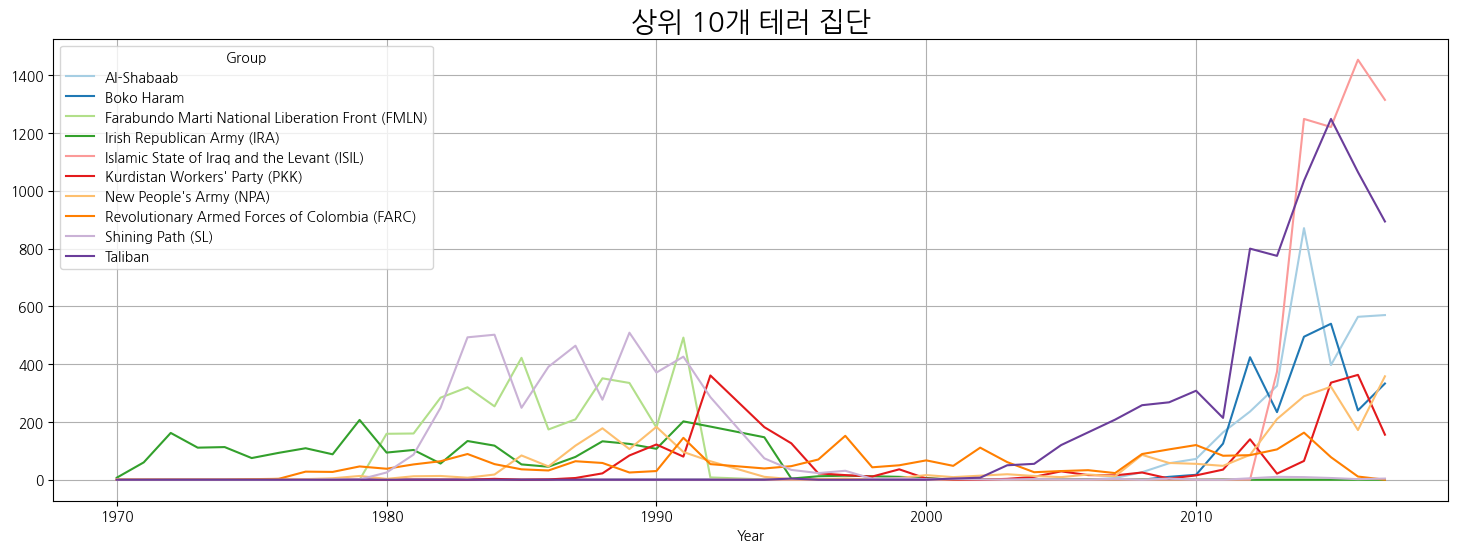

In [593]:
top_groups10 = terror[terror['Group'].isin(terror['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('상위 10개 테러 집단',size ='20')
plt.grid()
plt.show()

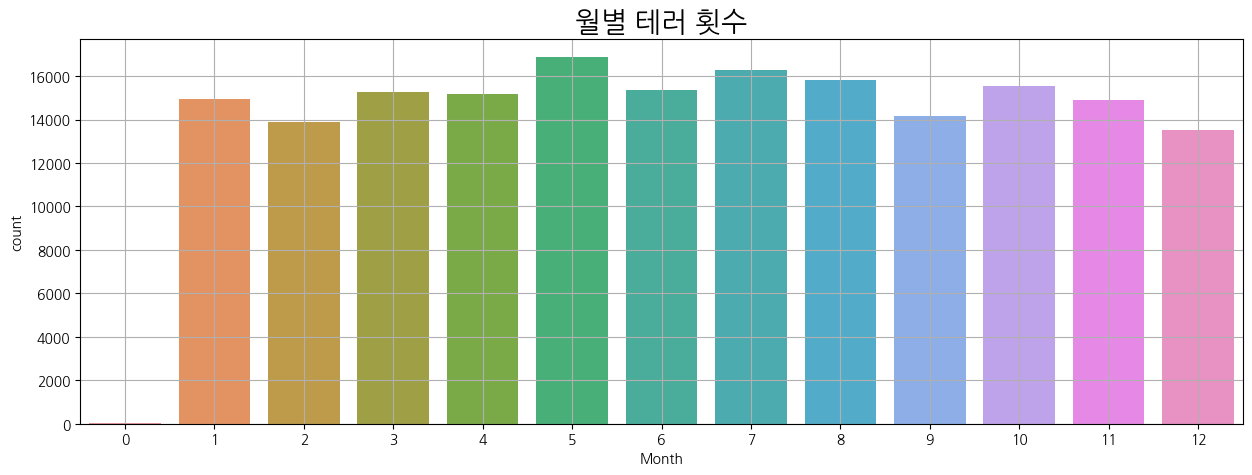

In [594]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(x=terror['Month'])
plt.title('월별 테러 횟수',size ='20')
plt.grid()
plt.show() #5월이 가장 많다.


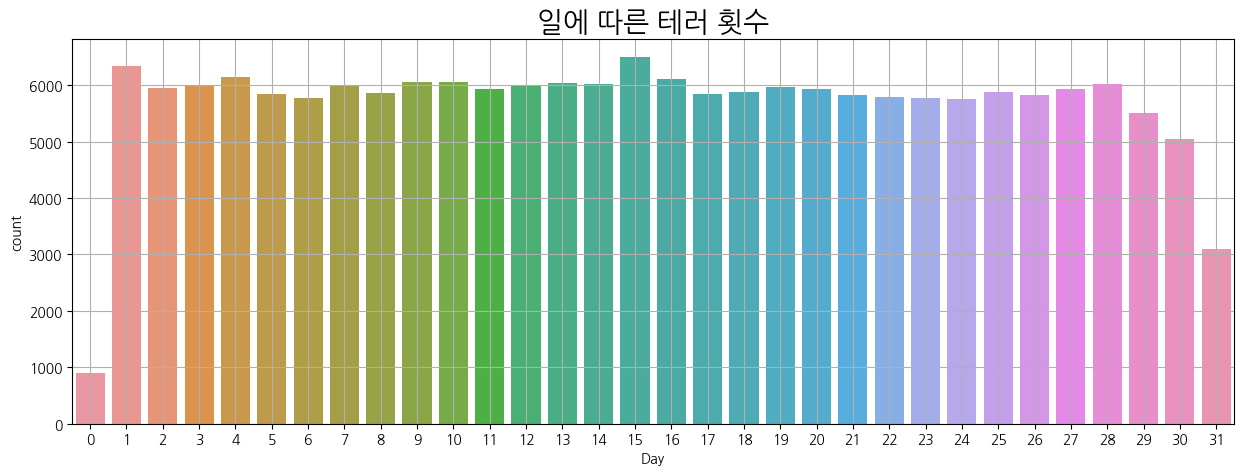

In [595]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(x=terror['Day'])
plt.title('일에 따른 테러 횟수',size ='20')
plt.grid()
plt.show() #월초 혹은 중간인 15일이 많고 30,31일은 적다 31일이 없는 2월, 4월, 6월, 9월, 11월이라도 꽤 높은 순위에 있는 것을 보면 30,31일은 피하는 것을 볼 수 있다.


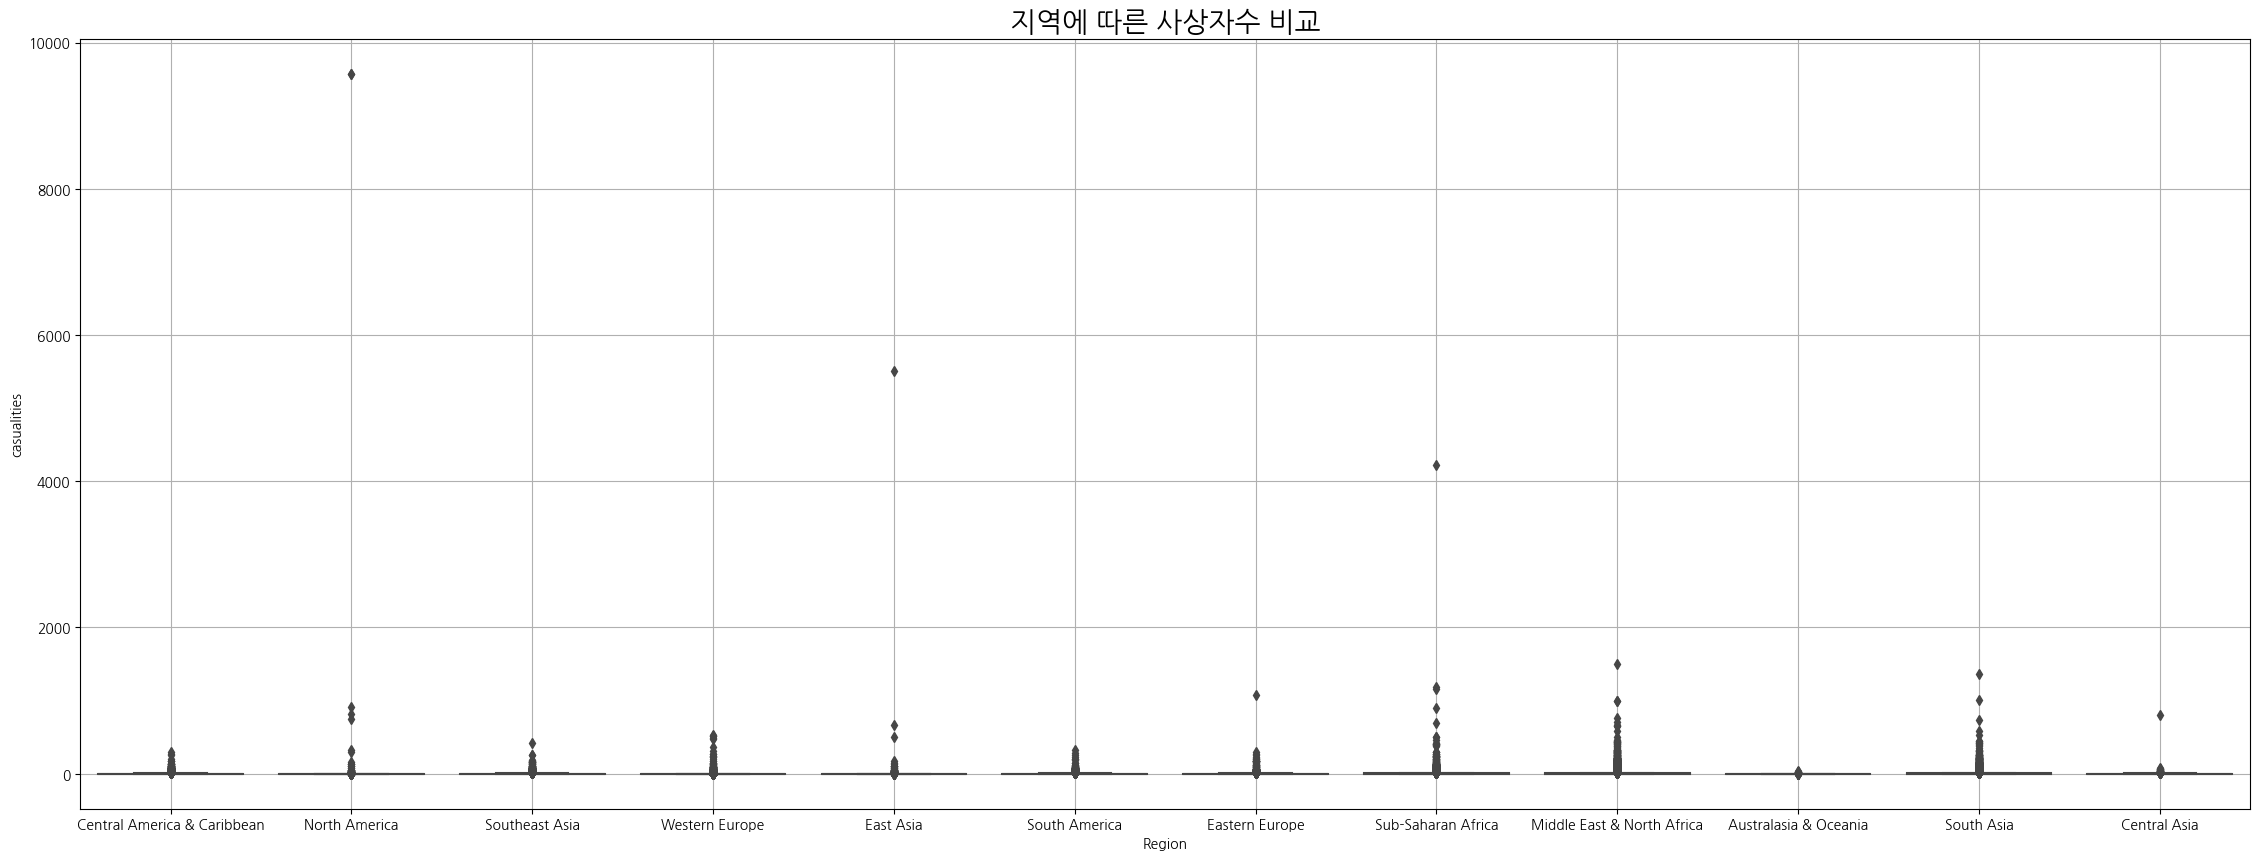

In [596]:
fig, ax = plt.subplots(figsize=(28, 10))
sns.boxplot(x=terror['Region'], y=terror['casualities'])
plt.title('지역에 따른 사상자수 비교',size ='20')
plt.grid()
plt.show()

In [287]:
terror.sort_values(by ='casualities',ascending=False) #9.11 테러는 단일 테러로는 가장 많은 사상자가 나왔다 

Year  Month  Day        Country                      Region  \
73127   2001      9   11  United States               North America   
73126   2001      9   11  United States               North America   
58841   1995      3   20          Japan                   East Asia   
68071   1998      8    7          Kenya          Sub-Saharan Africa   
159773  2016      3    9           Iraq  Middle East & North Africa   
...      ...    ...  ...            ...                         ...   
181655  2017     12   30        Nigeria          Sub-Saharan Africa   
181656  2017     12   30        Nigeria          Sub-Saharan Africa   
181662  2017     12   30    Philippines              Southeast Asia   
181666  2017     12   30        Nigeria          Sub-Saharan Africa   
181667  2017     12   30          Syria  Middle East & North Africa   

                    city   latitude   longitude  \
73127      New York City  40.697132  -73.931351   
73126      New York City  40.697132  -73.931351   
58841              Tokyo  35.689125  139.747742   
68071            Nairobi  -1.285180   36.821107   
159773     Taza Khurmatu  35.303047   44.329933   
...                  ...        ...         ...   
181655           Kanamma  13.099690   12.107900   
181656             Maiwa  11.883003   13.455697   
181662         Tarragona   7.042777  126.449221   
181666  Konduga district  11.492144   12.969724   
181667           Harasta  33.561504   36.368763   

                            AttackType  Killed  Wounded  \
73127                        Hijacking  1383.0   8191.0   
73126                        Hijacking  1384.0   8190.0   
58841                  Unarmed Assault    13.0   5500.0   
68071                Bombing/Explosion   224.0   4000.0   
159773               Bombing/Explosion     3.0   1500.0   
...                                ...     ...      ...   
181655                   Armed Assault     5.0      NaN   
181656                   Armed Assault    25.0      NaN   
181662               Bombing/Explosion     NaN      2.0   
181666  Facility/Infrastructure Attack     NaN      NaN   
181667               Bombing/Explosion     NaN      NaN   

                                                   Target  \
73127   Passengers and crew members on United Airlines...   
73126   Passengers and crew members on American Airlin...   
58841                                       Subway system   
68071             United States Embassy in Nairobi, Kenya   
159773                                        Subdistrict   
...                                                   ...   
181655                                               Base   
181656                                            Loggers   
181662                                           Soldiers   
181666                                             Convoy   
181667                                               Base   

                                                  Summary  \
73127   09/11/2001: This was one of four related attac...   
73126   09/11/2001: This was one of four related attac...   
58841                                                 NaN   
68071   08/07/1998: Suicide attackers detonated a vehi...   
159773  03/09/2016: Assailants fired 60 rockets holdin...   
...                                                   ...   
181655  12/30/2017: Assailants attacked a military ins...   
181656  12/30/2017: Assailants opened fire on loggers ...   
181662  12/30/2017: Assailants opened fire on and deto...   
181666  12/30/2017: Assailants attacked a convoy along...   
181667  12/30/2017: A suicide bomber detonated an expl...   

                                              Group  \
73127                                      Al-Qaida   
73126                                      Al-Qaida   
58841                                Aum Shinri Kyo   
68071                                      Al-Qaida   
159773  Islamic State of Iraq and the Levant (ISIL)   
...                                  

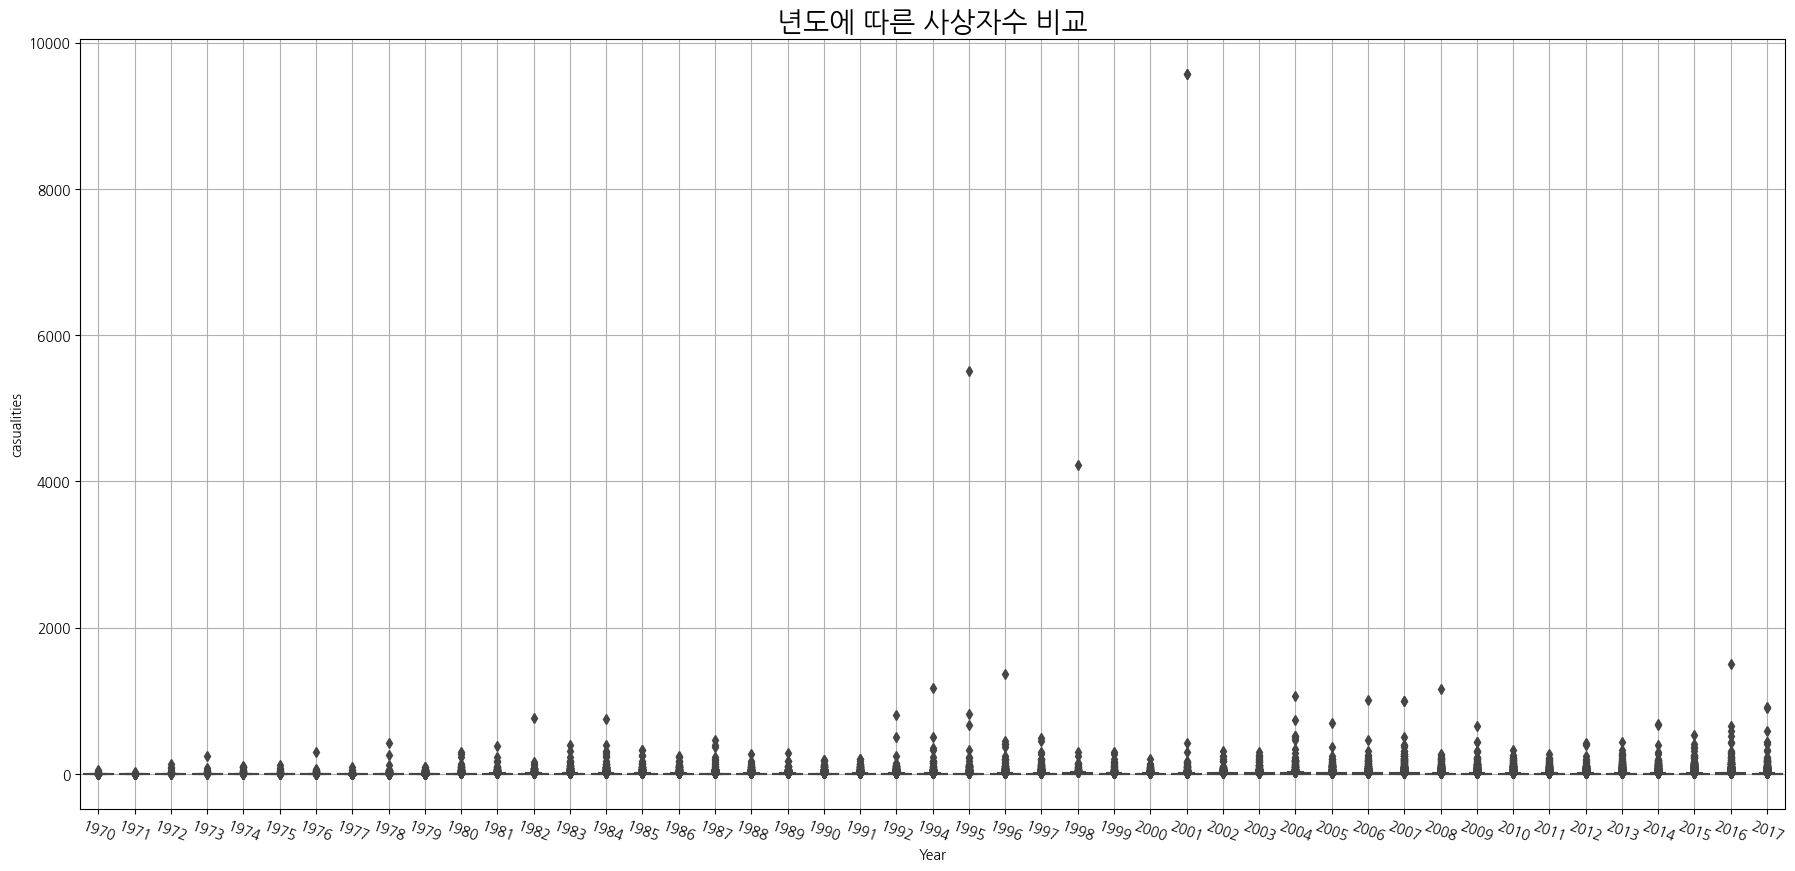

In [624]:
fig, ax = plt.subplots(figsize=(22, 10))
sns.boxplot(x=terror['Year'], y=terror['casualities'])
plt.title('년도에 따른 사상자수 비교',size ='20')
plt.grid()
plt.xticks(rotation=340)
plt.show(); #2001년은 9/11 테러로 인해 사상자가 가장 높다.

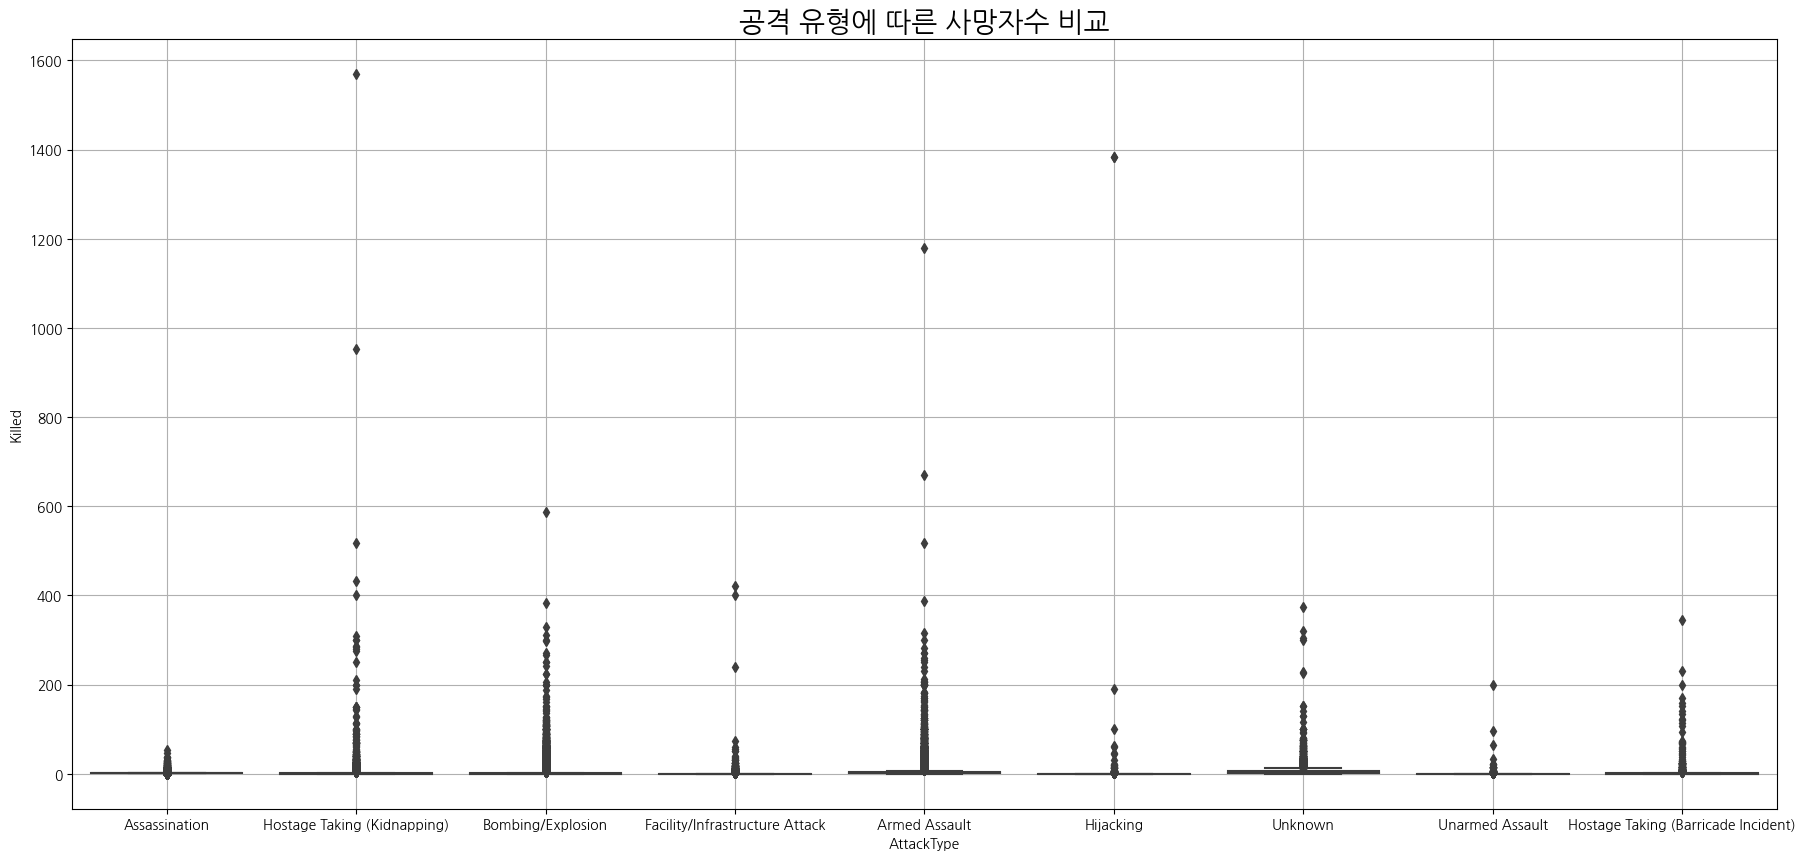

In [599]:
fig, ax = plt.subplots(figsize=(22, 10))
sns.boxplot(x=terror['AttackType'], y=terror['Killed'])
plt.title('공격 유형에 따른 사망자수 비교',size ='20')
plt.grid()
plt.show(); 

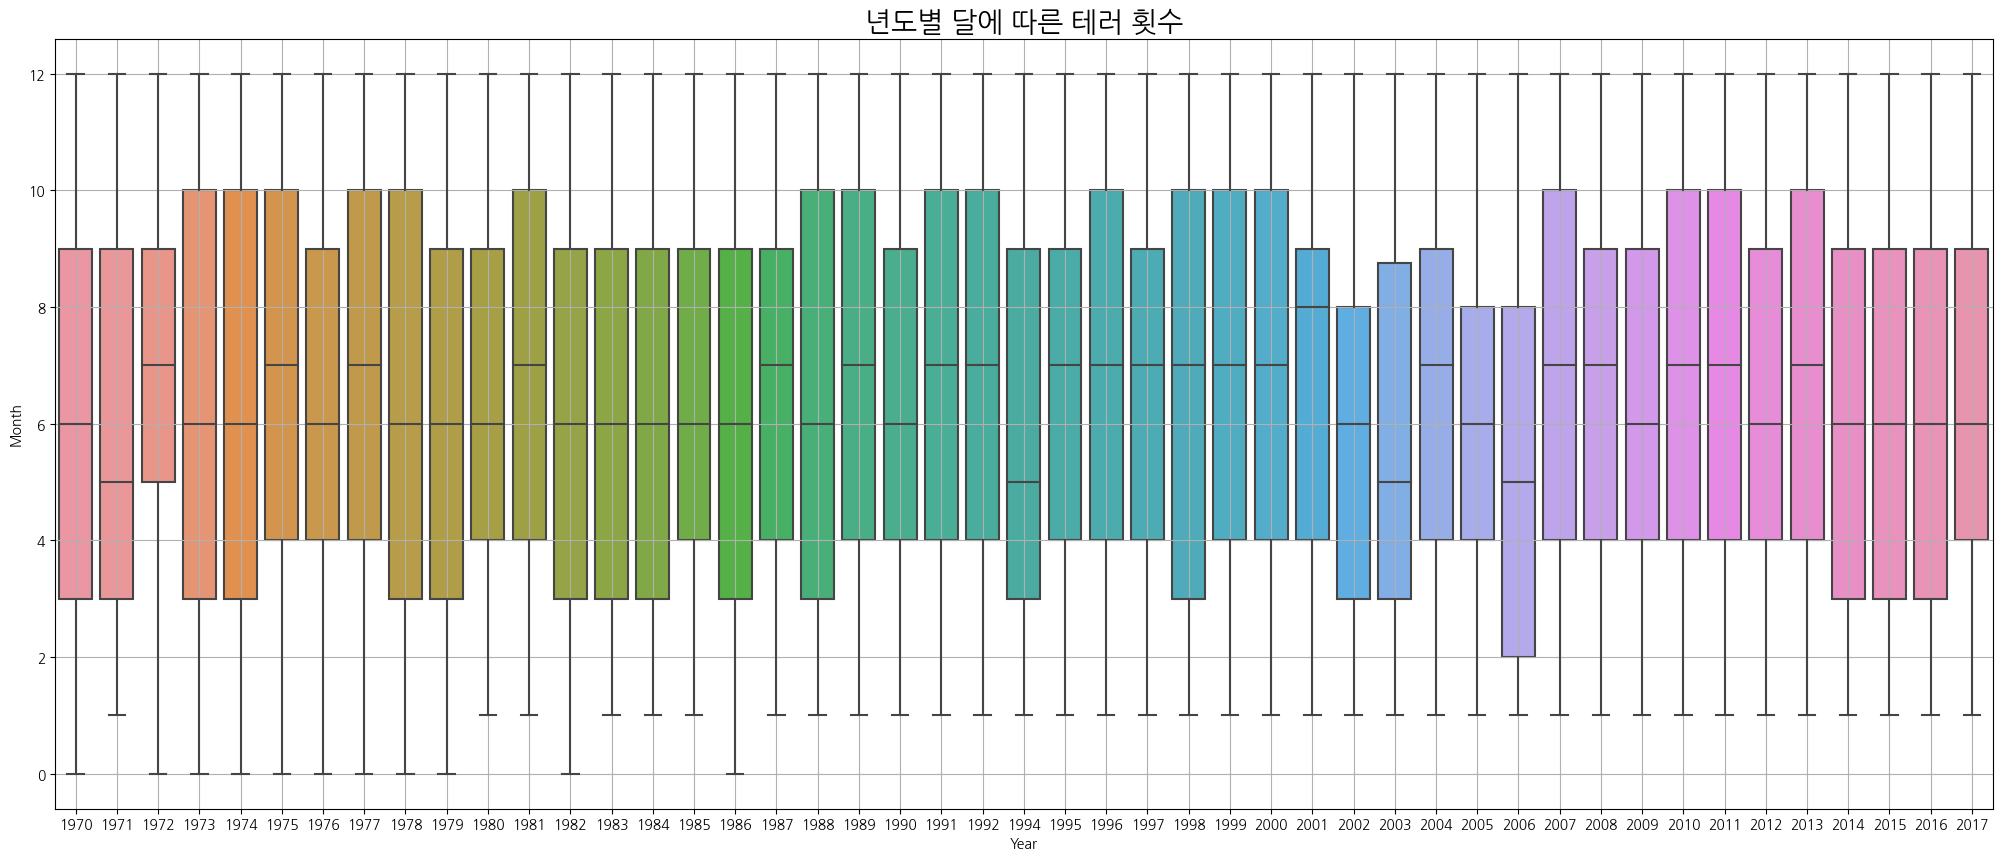

In [600]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.boxplot(x=terror['Year'], y=terror['Month'])
plt.title('년도별 달에 따른 테러 횟수',size ='20')
plt.grid()
plt.show(); 

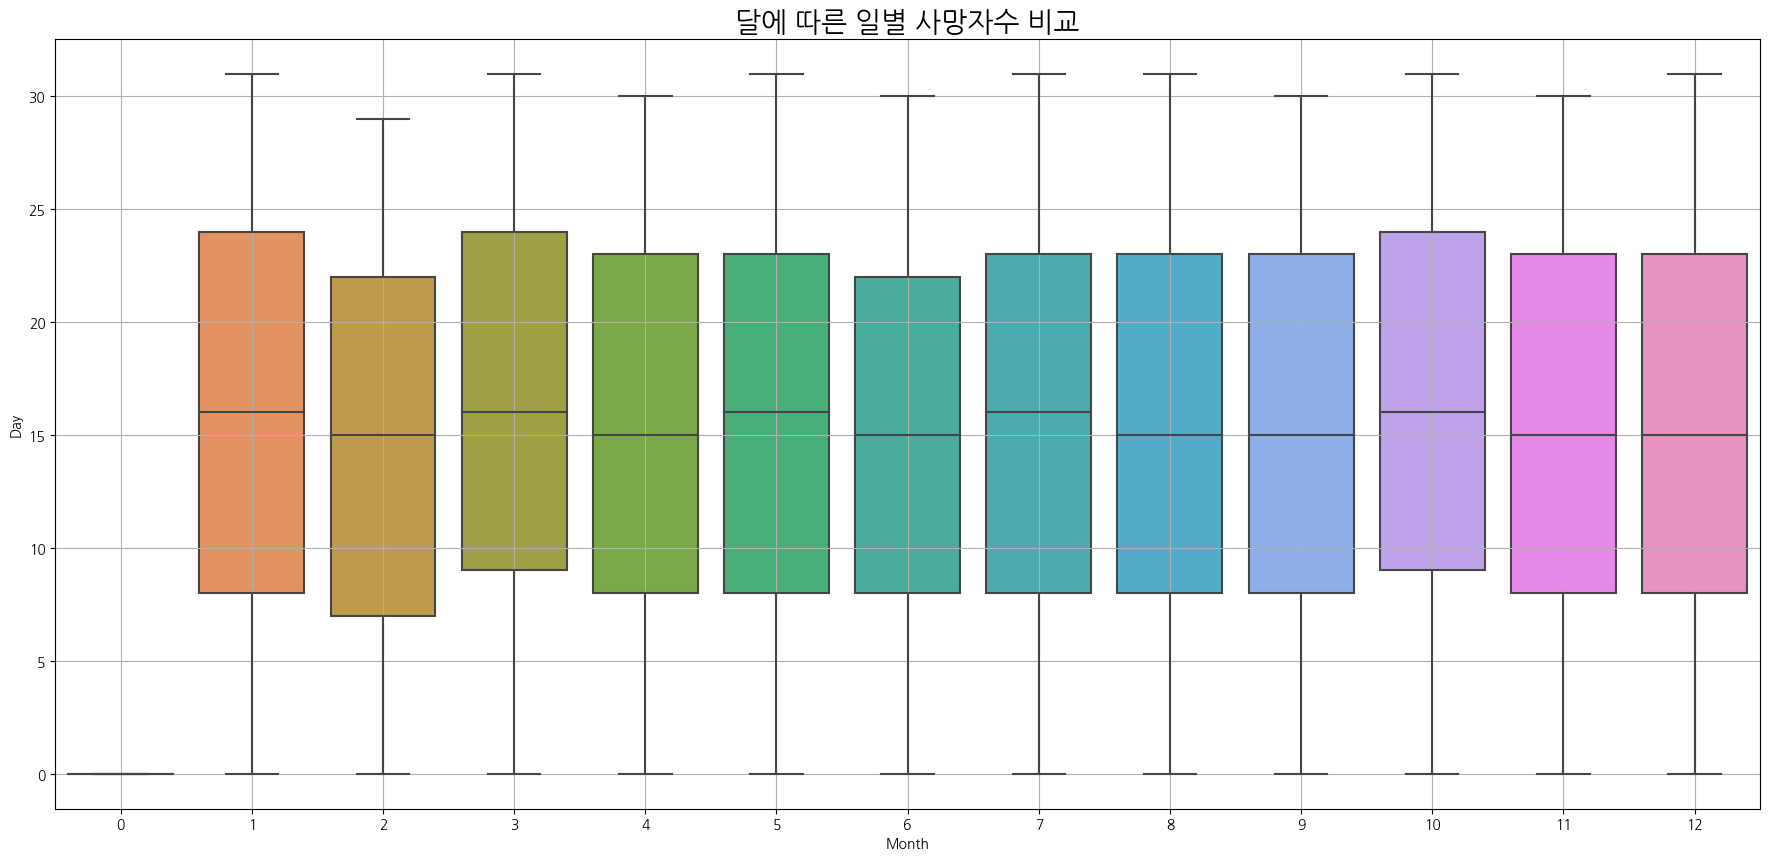

In [601]:
fig, ax = plt.subplots(figsize=(22, 10))
sns.boxplot(x=terror['Month'], y=terror['Day'])
plt.title('달에 따른 일별 사망자수 비교',size ='20')
plt.grid()
plt.show(); #2001년은 9/11 테러로 인해 가장 높다.

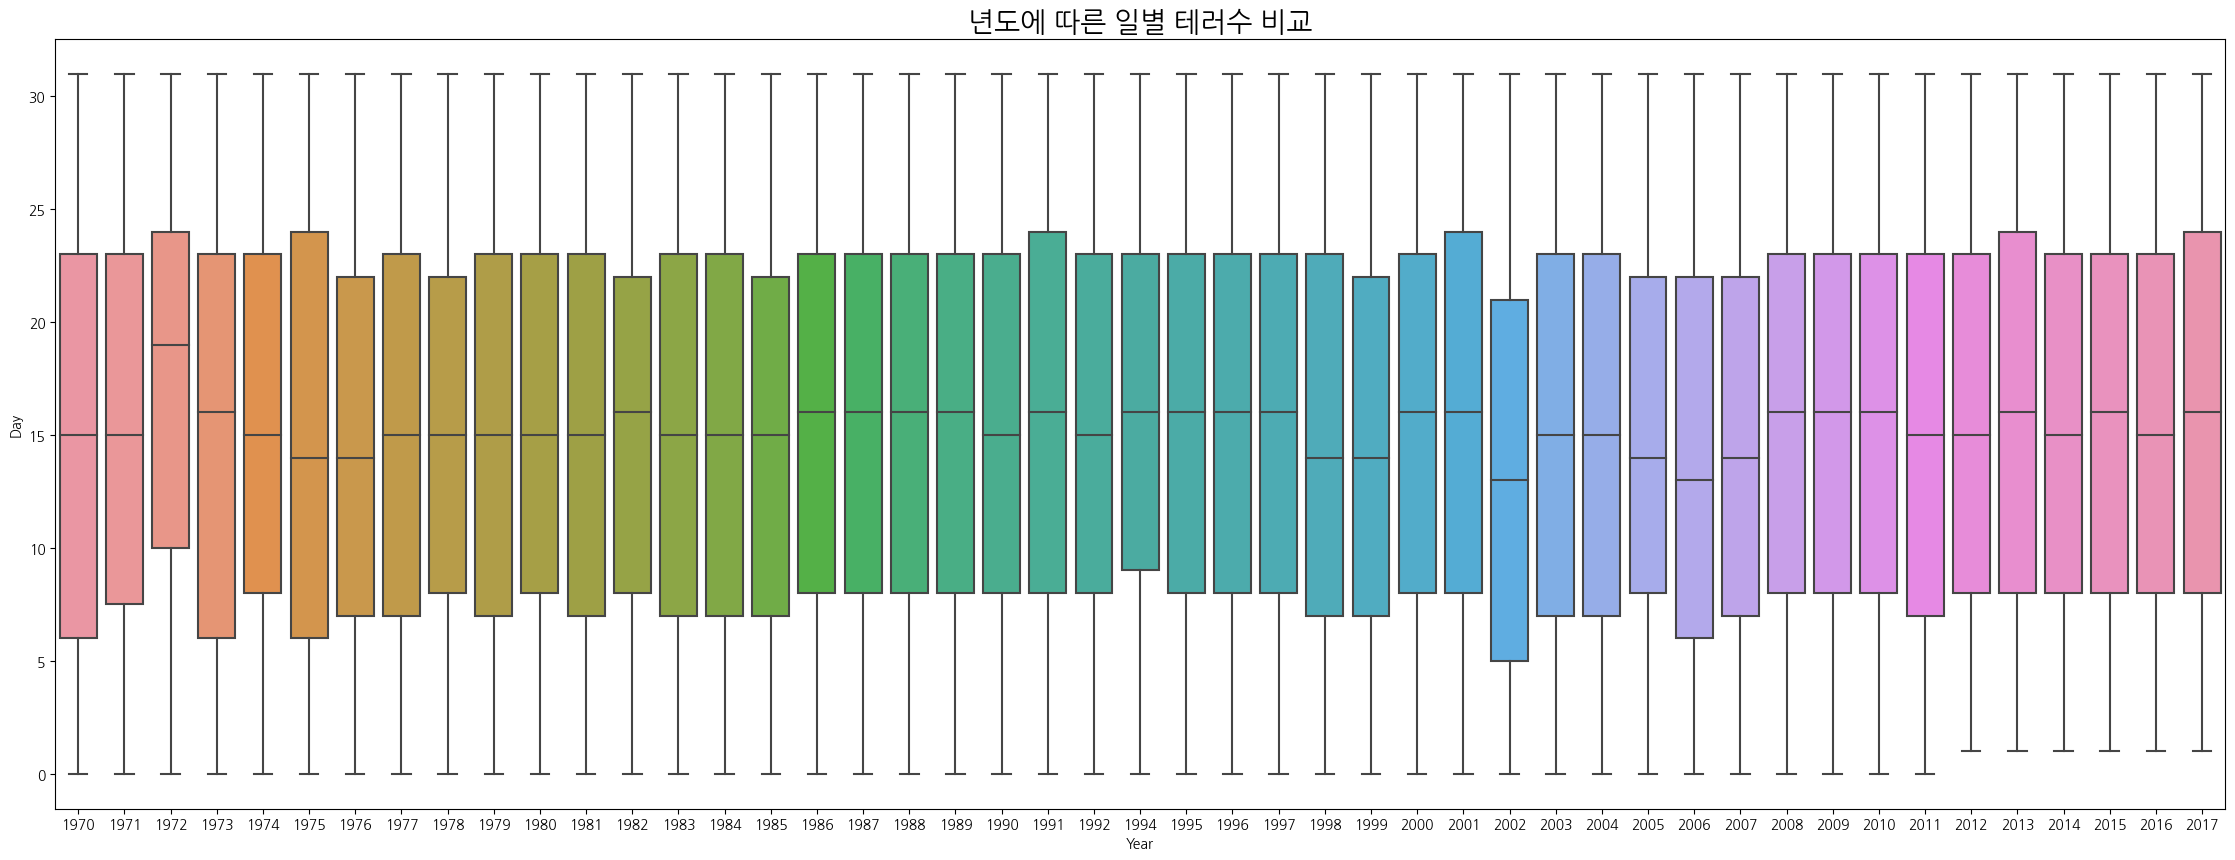

In [572]:
fig, ax = plt.subplots(figsize=(28, 10))
sns.boxplot(x=terror['Year'], y=terror['Day'])
plt.title('년도에 따른 일별 테러수 비교',size ='20')
plt.show()

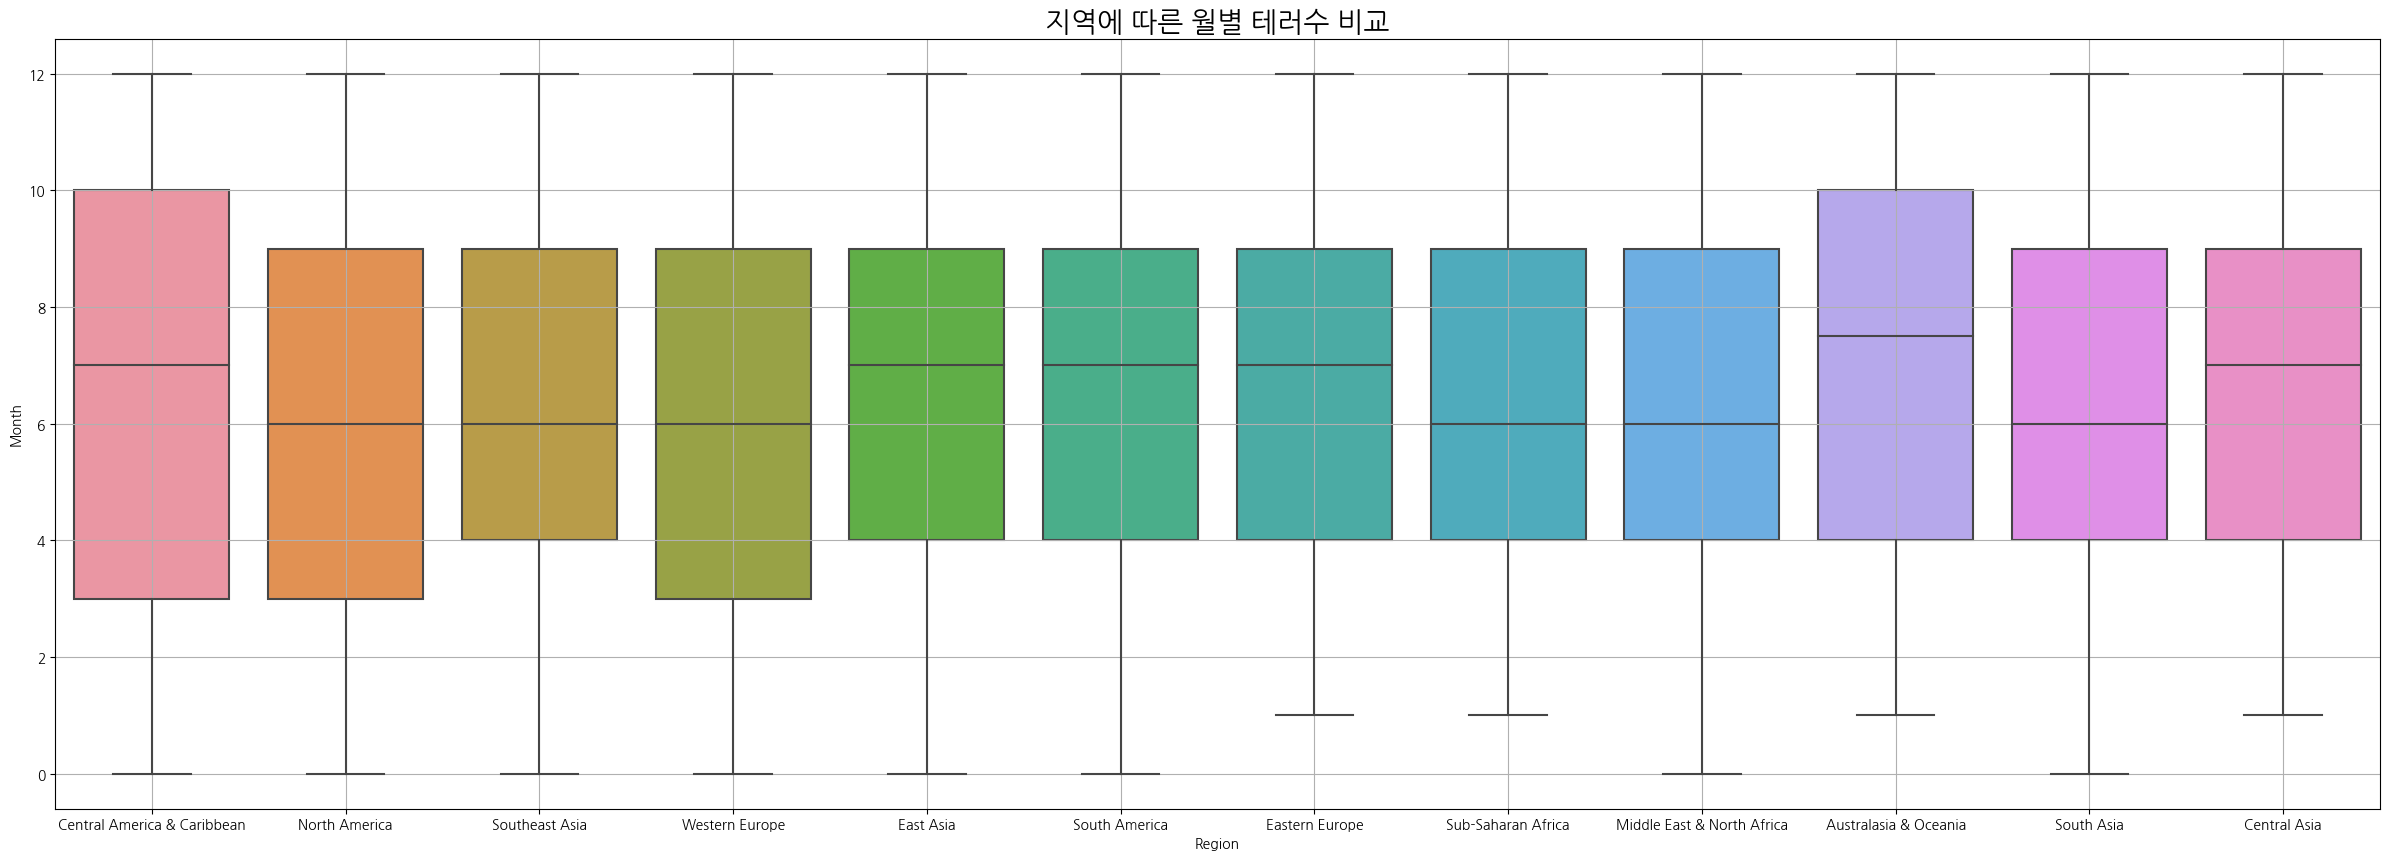

In [602]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.boxplot(x=terror['Region'], y=terror['Month'])
plt.title('지역에 따른 월별 테러수 비교',size ='20')
plt.grid()
plt.show()

In [296]:
terror.sort_values(by ='casualities',ascending=False) #9.11 테러는 단일 테러로는 가장 많은 사상자가 나왔다 

Year  Month  Day        Country                      Region  \
73127   2001      9   11  United States               North America   
73126   2001      9   11  United States               North America   
58841   1995      3   20          Japan                   East Asia   
68071   1998      8    7          Kenya          Sub-Saharan Africa   
159773  2016      3    9           Iraq  Middle East & North Africa   
...      ...    ...  ...            ...                         ...   
181655  2017     12   30        Nigeria          Sub-Saharan Africa   
181656  2017     12   30        Nigeria          Sub-Saharan Africa   
181662  2017     12   30    Philippines              Southeast Asia   
181666  2017     12   30        Nigeria          Sub-Saharan Africa   
181667  2017     12   30          Syria  Middle East & North Africa   

                    city   latitude   longitude  \
73127      New York City  40.697132  -73.931351   
73126      New York City  40.697132  -73.931351   
58841              Tokyo  35.689125  139.747742   
68071            Nairobi  -1.285180   36.821107   
159773     Taza Khurmatu  35.303047   44.329933   
...                  ...        ...         ...   
181655           Kanamma  13.099690   12.107900   
181656             Maiwa  11.883003   13.455697   
181662         Tarragona   7.042777  126.449221   
181666  Konduga district  11.492144   12.969724   
181667           Harasta  33.561504   36.368763   

                            AttackType  Killed  Wounded  \
73127                        Hijacking  1383.0   8191.0   
73126                        Hijacking  1384.0   8190.0   
58841                  Unarmed Assault    13.0   5500.0   
68071                Bombing/Explosion   224.0   4000.0   
159773               Bombing/Explosion     3.0   1500.0   
...                                ...     ...      ...   
181655                   Armed Assault     5.0      NaN   
181656                   Armed Assault    25.0      NaN   
181662               Bombing/Explosion     NaN      2.0   
181666  Facility/Infrastructure Attack     NaN      NaN   
181667               Bombing/Explosion     NaN      NaN   

                                                   Target  \
73127   Passengers and crew members on United Airlines...   
73126   Passengers and crew members on American Airlin...   
58841                                       Subway system   
68071             United States Embassy in Nairobi, Kenya   
159773                                        Subdistrict   
...                                                   ...   
181655                                               Base   
181656                                            Loggers   
181662                                           Soldiers   
181666                                             Convoy   
181667                                               Base   

                                                  Summary  \
73127   09/11/2001: This was one of four related attac...   
73126   09/11/2001: This was one of four related attac...   
58841                                                 NaN   
68071   08/07/1998: Suicide attackers detonated a vehi...   
159773  03/09/2016: Assailants fired 60 rockets holdin...   
...                                                   ...   
181655  12/30/2017: Assailants attacked a military ins...   
181656  12/30/2017: Assailants opened fire on loggers ...   
181662  12/30/2017: Assailants opened fire on and deto...   
181666  12/30/2017: Assailants attacked a convoy along...   
181667  12/30/2017: A suicide bomber detonated an expl...   

                                              Group  \
73127                                      Al-Qaida   
73126                                      Al-Qaida   
58841                                Aum Shinri Kyo   
68071                                      Al-Qaida   
159773  Islamic State of Iraq and the Levant (ISIL)   
...                                  

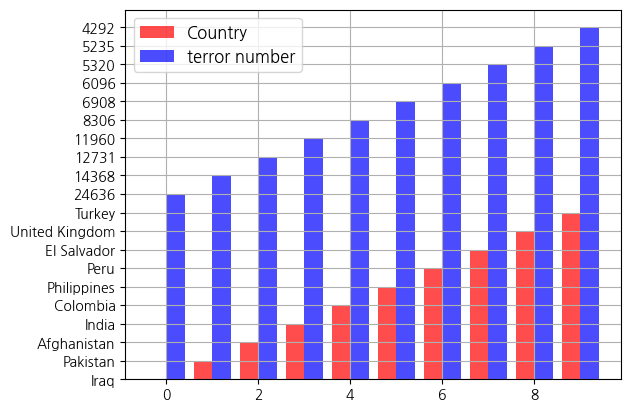

In [603]:
p1 = plt.bar(terror_top_10dff.index-0.2, terror_top_10dff['Country'], color='red', alpha=0.7, width=0.4)
p2 = plt.bar(terror_top_10dff.index+0.2, terror_top_10dff['terror number'], color='blue', alpha=0.7, width=0.4)
plt.legend((p1, p2), ('Country', 'terror number'), fontsize=12)  
plt.grid()

In [302]:
terror.pivot_table(index = "Year", columns = "Month", values = "casualities")

Month   0          1          2          3          4          5          6   \
Year                                                                           
1970   0.0   0.200000   1.490566   0.405797   0.736842   0.724638   1.148936   
1971   NaN   0.235294   0.034483   0.250000   0.403846   0.333333   0.043478   
1972   0.0   2.136364   3.533333  11.529412   1.428571   5.218750  10.250000   
1973   0.0   1.958333   0.857143  12.100000   0.242424   0.333333   0.571429   
1974   0.0   0.739130   1.655172   0.121212   0.800000   8.423077   1.088235   
1975   NaN   4.875000   0.281250   3.461538   0.913043   0.200000   1.857143   
1976   NaN   1.256410   1.170732   0.351351   1.055556   1.753425   1.820000   
1977   0.0   0.593750   0.200000   0.505882   0.340909   2.000000   0.572581   
1978   NaN   0.705479   1.488550   2.318966   1.767677   0.735849   1.195402   
1979   3.0   1.920000   2.047847   2.087432   1.791667   1.878594   1.562212   
1980   NaN   2.592179   3.528571   3.127962   3.614754   3.945122   3.305677   
1981   NaN   4.532847   3.981818   4.191358   4.148148   2.913043   5.460993   
1982   0.0   4.760274   6.542636   4.675676   3.036810   4.061111   4.008197   
1983   NaN   4.519774   7.700787   3.761905   8.189189  10.427536   3.337143   
1984   NaN   4.283898   5.570815   4.480620   4.248299   3.533613   4.502538   
1985   NaN   5.011696   6.303704   5.485207   3.969697   4.652661   5.473896   
1986   NaN   4.053763   3.152047   4.029412   4.640884   4.805687   4.209302   
1987   NaN   3.307692   3.703846   6.287129   5.296992   2.518018   3.792388   
1988   NaN   3.624113   3.534375   3.390935   3.672794   4.579439   3.400602   
1989   NaN   4.009288   3.114973   2.965625   2.863095   3.053977   3.598485   
1990   NaN   2.936842   2.832636   2.646465   4.541538   2.849879   3.883249   
1991   NaN   1.982143   3.296073   3.925926   3.003165   3.197605   4.386431   
1992   NaN   3.895317   4.153614   3.333333   7.579235   3.972912   3.094463   
1994   NaN   3.207237   3.437931   3.796392   7.466480   2.838384   6.429787   
1995   NaN   5.393519   3.924901  24.146067  14.048780   2.152648   3.193772   
1996   NaN   7.767123   5.585586   6.588235   5.155462   7.056000  10.269231   
1997   NaN   6.947137   4.266667   6.416667   4.965347   5.223464   5.100806   
1998   NaN   8.964912   9.428571  14.406780   5.769231   9.307692   7.475000   
1999   NaN   5.758065   6.821429   5.337209   6.740741   3.340909   7.796178   
2000   NaN   4.464052   5.305263   8.470588   2.905263   7.701754   2.600000   
2001   NaN   4.470588   4.196850   4.912500   9.216981   7.967391  10.589041   
2002   NaN   4.416058   2.882812  15.311688  10.896907   6.988636   7.640777   
2003   NaN   4.757062   6.060606   4.569948   6.200000   8.391608   8.333333   
2004   NaN  12.558442  34.684211  51.363636  11.511111  12.081395  11.739496   
2005   NaN   6.182927  17.982143   4.226804   4.340659  15.441441  10.423358   
2006   NaN   4.113281   5.320482  12.486486   4.968504   6.797030   9.500000   
2007   NaN  11.370370  15.117925  21.463542  16.537383  13.056338   5.484536   
2008   NaN   7.000000  22.834532   7.673913   5.042596   4.979592   4.147117   
2009   NaN   3.166247   5.480000   4.315385   6.132850   5.710000   6.167059   
2010   NaN   4.460432   5.036496   5.404372   5.601124   5.885965   4.125668   
2011   NaN   5.289673   3.669355   4.356009   3.895349   4.145740   4.676845   
2012   NaN   5.499276   5.136882   5.249186   4.141194   5.490820   5.593243   
2013   NaN   4.847102   4.838279   4.680879   4.560976   5.755299   5.299511   
2014   NaN   4.221331   4.027153   3.848820   4.721713   4.543029   5.621262   
2015   NaN   4.287407   4.973230   4.936803   5.053603   5.260908   6.939481   
2016   NaN   5.066038   5.203947   6.815414   5.802372   5.003279   6.305151   
2017   NaN   5.503769   5.041199   4.740440   4.619403   5.361835   4.570558   

Month         7          8           9          10         11         12  
Year

KeyError: '나라'

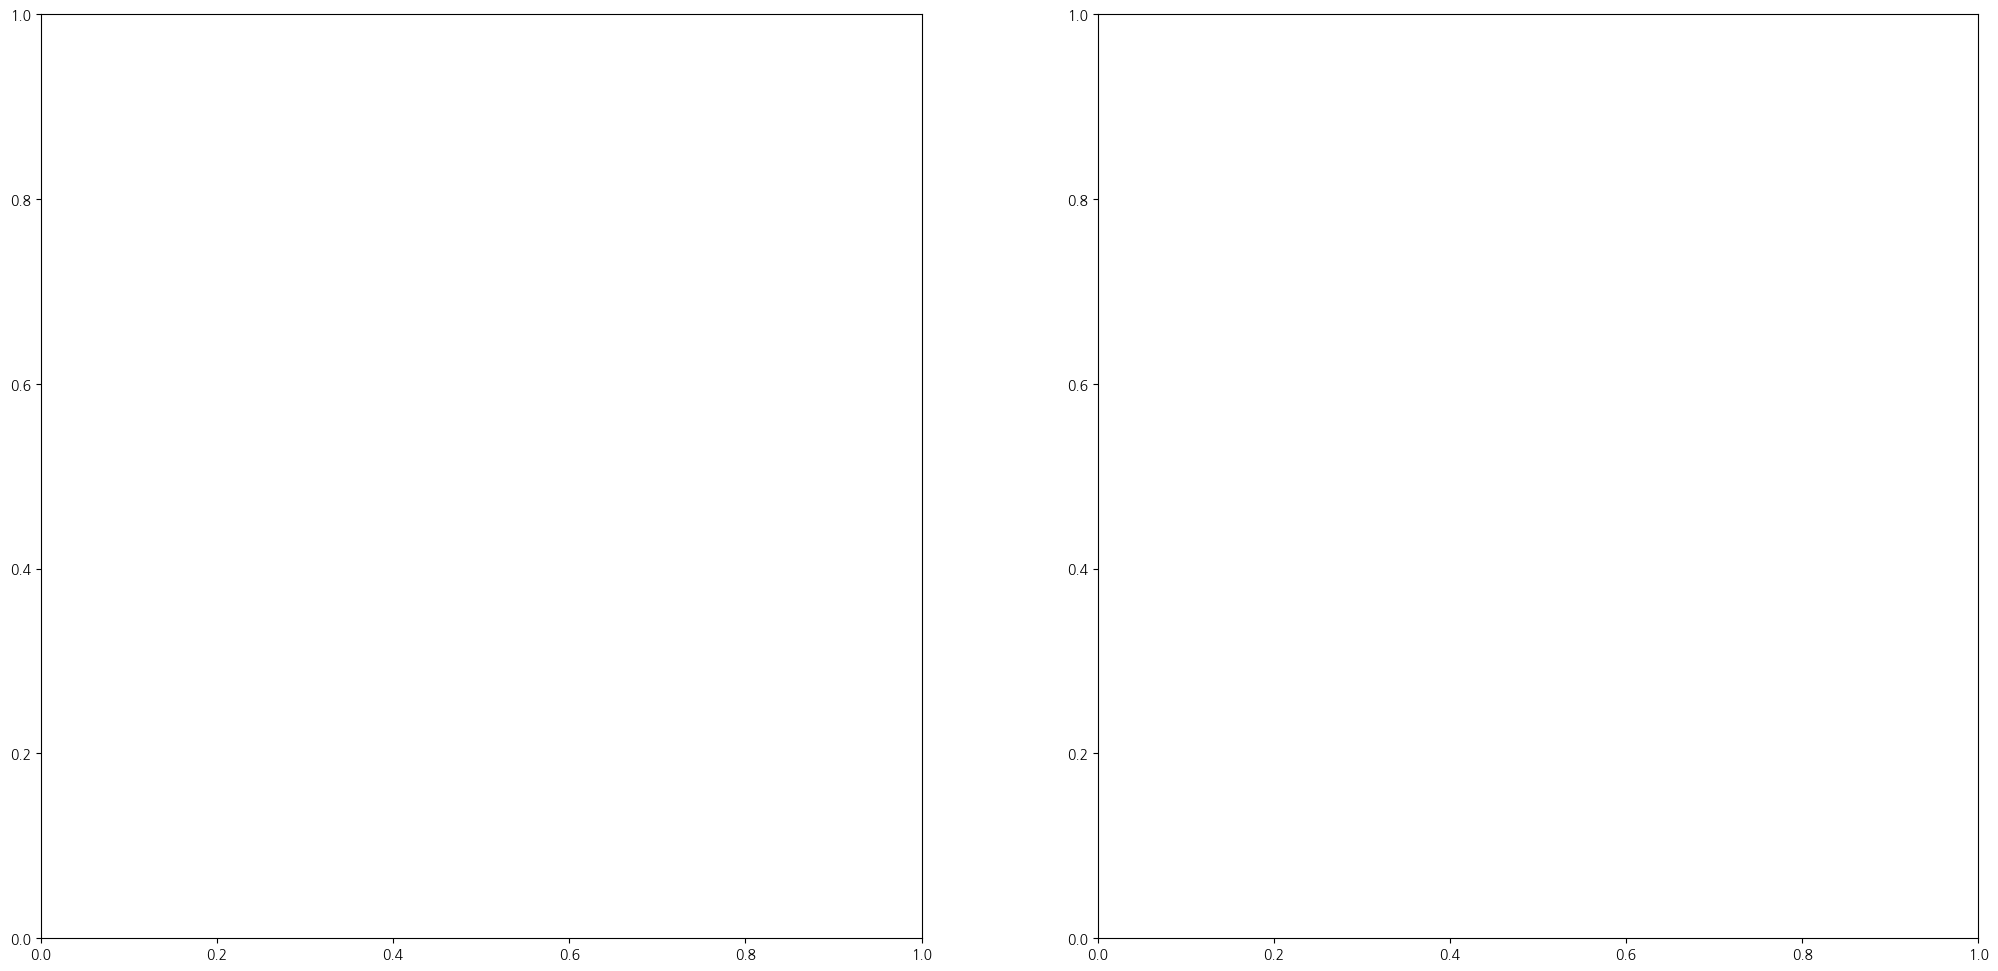

In [605]:
f,ax=plt.subplots(1,2,figsize=(25,12))
ind_groups=terror['나라'].value_counts()[1:11].index
ind_groups=terror[terror['나라'].isin(ind_groups)]
sns.countplot(y='나라',data=ind_groups,ax=ax[0])
ax[0].set_title('높은 테러 지역 순')
sns.countplot(y='AttackType',data=terror,ax=ax[1])
ax[1].set_title('Favorite Attack Types')
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()

# s4.서유럽

In [310]:
terror[terror.Region == 'Western Europe']


Year  Month  Day             Country          Region         city  \
3       1970      1    0              Greece  Western Europe       Athens   
12      1970      1    8               Italy  Western Europe         Rome   
59      1970      2   10  West Germany (FRG)  Western Europe       Munich   
62      1970      2   13  West Germany (FRG)  Western Europe       Munich   
79      1970      2   21  West Germany (FRG)  Western Europe    Frankfurt   
...      ...    ...  ...                 ...             ...          ...   
181556  2017     12   26      United Kingdom  Western Europe  Londonderry   
181643  2017     12   31              Greece  Western Europe      Piraeus   
181644  2017     12   31              Greece  Western Europe      Piraeus   
181664  2017     12   30      United Kingdom  Western Europe      Belfast   
181682  2017     12   31               Italy  Western Europe    Spinetoli   

         latitude  longitude                      AttackType  Killed  Wounded  \
3       37.997490  23.762728               Bombing/Explosion     NaN      NaN   
12      41.890961  12.490069                       Hijacking     0.0      0.0   
59      48.139126  11.580186                   Armed Assault     1.0      NaN   
62      48.139126  11.580186  Facility/Infrastructure Attack     7.0      9.0   
79      50.117970   8.644191               Bombing/Explosion     0.0      0.0   
...           ...        ...                             ...     ...      ...   
181556  55.011562  -7.312045                   Armed Assault     0.0      1.0   
181643  37.966024  23.663207                         Unknown     0.0      0.0   
181644  37.969891  23.642225                         Unknown     0.0      0.0   
181664  54.607712  -5.956210                   Armed Assault     0.0      2.0   
181682  42.888982  13.772795  Facility/Infrastructure Attack     0.0      0.0   

                                        Target  \
3                                 U.S. Embassy   
12                       Flight 802 Boeing 707   
59        El Al Passenger Bus & Airport Lounge   
62                    Jewish Old People's Home   
79      Austrian Airliner en route to Tel Aviv   
...                                        ...   
181556                                Civilian   
181643           Residence of Muslim Civilians   
181644           Residence of Muslim Civilians   
181664                               Civilians   
181682                          Migrant Center   

                                                  Summary  \
3                                                     NaN   
12                                                    NaN   
59                                                    NaN   
62                                                    NaN   
79                                                    NaN   
...                                                   ...   
181556  12/26/2017: Assailants shot and injured a civi...   
181643  12/00/2017: Sometime between December 25, 2017...   
181644  12/00/2017: Sometime between December 25, 2017...   
181664  12/30/2017: Assailants attacked a house on Cav...   
181682  12/31/2017: Assailants set fire to a migrants'...   

                                                    Group  \
3                                                 Unknown   
12                                                Unknown   
59      Popular Front for the Liberation of Palestine ...   
62      Popular Front for the Liberation of Palestine ...   
79      Popular Front for the Liberation of Palestine,...   
...                                                   ...   
181556                                            Unknown   
181643                                           Crypteia   
181644                                           Crypteia   
181664                                            Unknown   
181682                                            Unknown   

                        Target_type Weapon_

In [343]:
terror_WE = terror[terror.Region == 'Western Europe'] # 따로 index만 뽑아서 저장해준다.

In [364]:
type(terror_WE) #데이터 타입인거 확인

pandas.core.frame.DataFrame

In [365]:
terror_WE.columns # 컬럼 확인

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'city', 'latitude',
       'longitude', 'AttackType', 'Killed', 'Wounded', 'Target', 'Summary',
       'Group', 'Target_type', 'Weapon_type', 'Motive', 'casualities'],
      dtype='object')

## 일단 시각효과를 위해 이거저거 적용해보고 맘에 드는 타입을 4개 지역에 적용해본다

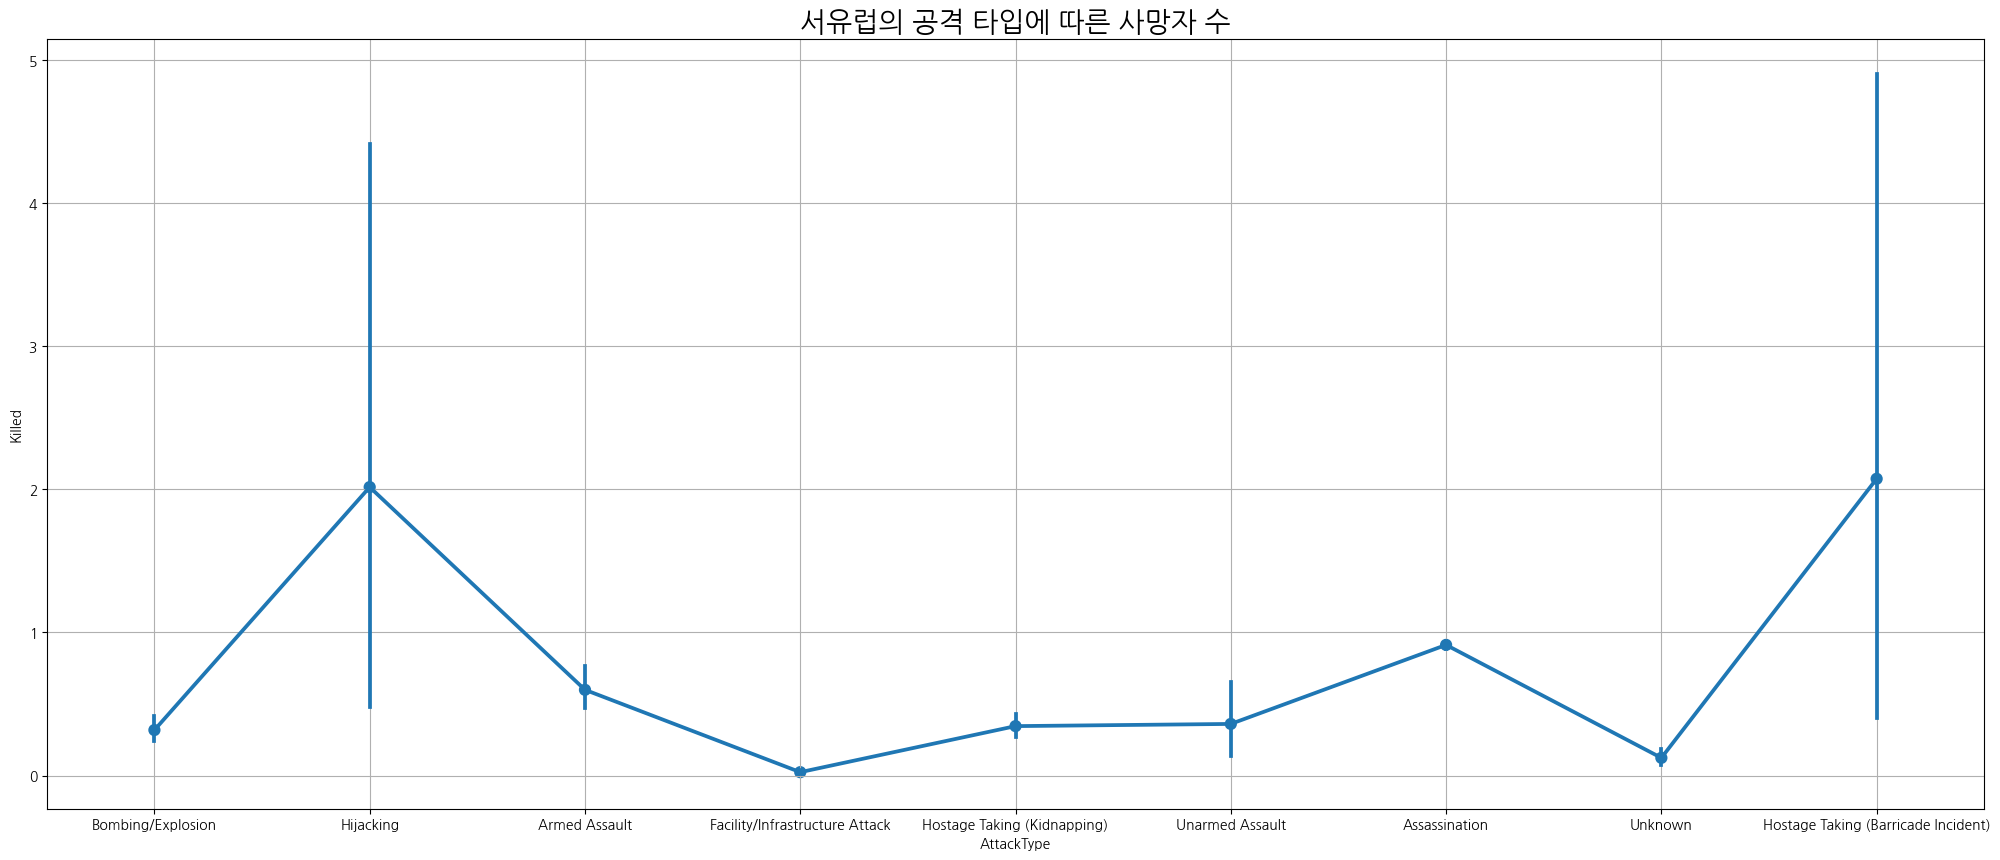

In [606]:
fig, ax = plt.subplots(figsize=(25,10))
sns.pointplot(x='AttackType',y ='Killed', data=terror_WE )
plt.title('서유럽의 공격 타입에 따른 사망자 수',size = '20')
plt.grid()
plt.show();

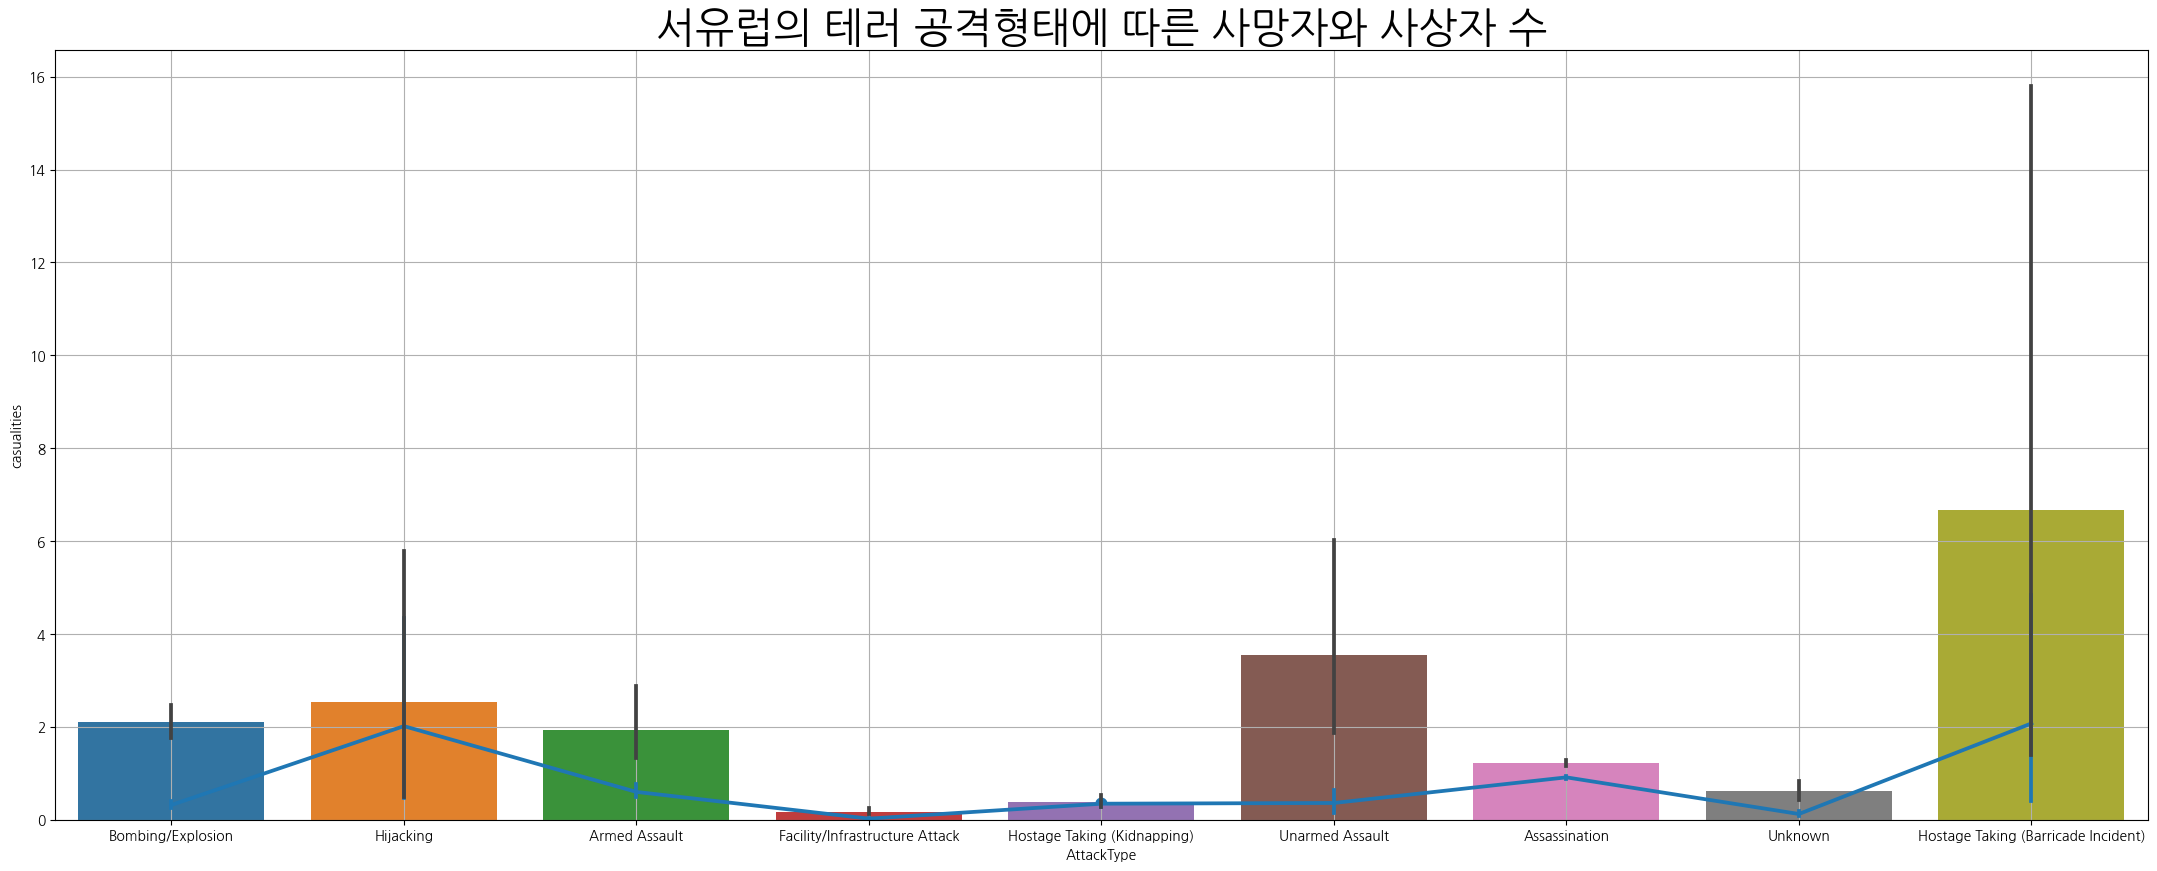

In [607]:
fig, ax = plt.subplots(figsize=(27,10))
sns.pointplot(x='AttackType',y ='Killed', data=terror_WE )
sns.barplot(x='AttackType',y ='casualities', data=terror_WE)
plt.title('서유럽의 테러 공격형태에 따른 사망자와 사상자 수', size = '30')
plt.grid()
plt.show();

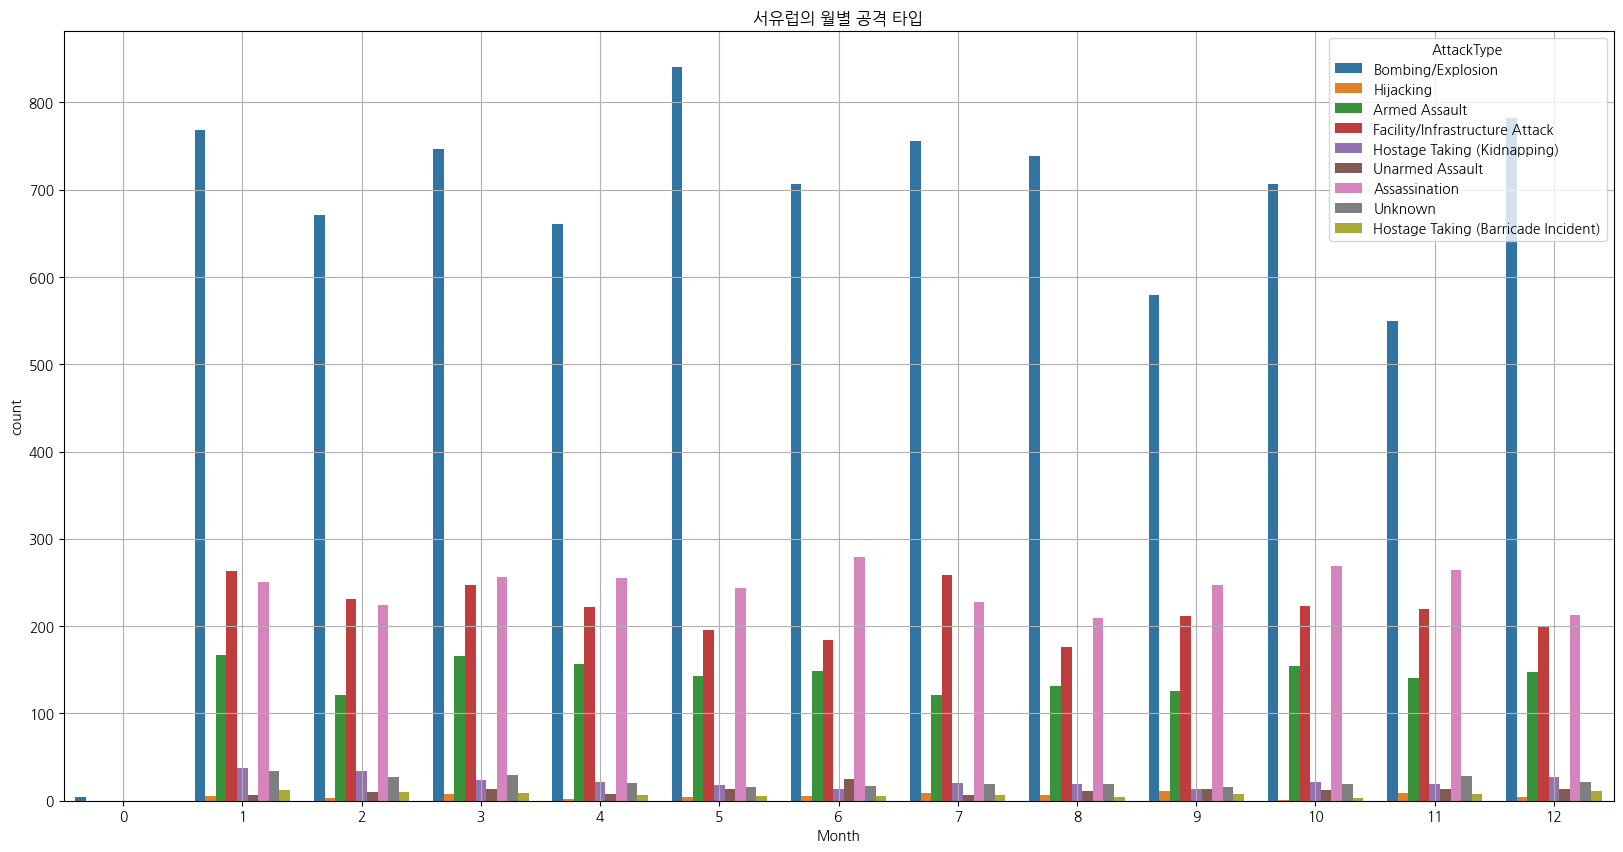

In [608]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x='Month',hue ='AttackType' ,data=terror_WE )
plt.title('서유럽의 월별 공격 타입')
plt.grid()
plt.show();

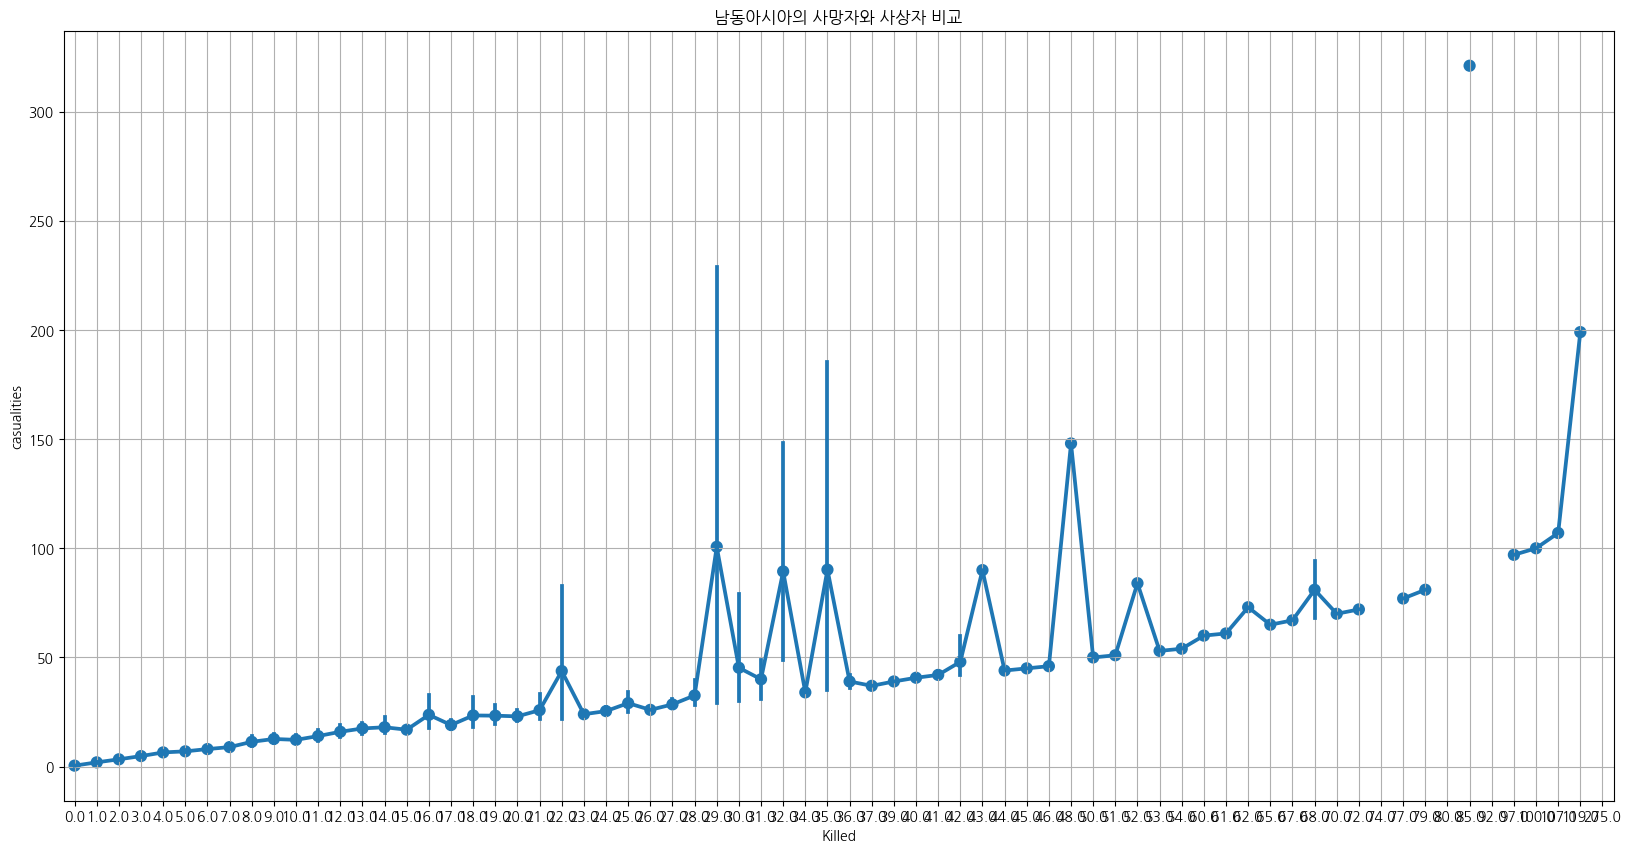

In [609]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(x='Killed',y ='casualities', data=terror_SA )
plt.title('남동아시아의 사망자와 사상자 비교')
plt.grid()
plt.show();

# s4.남아메리카

In [311]:
terror[terror.Region == 'South America']

Year  Month  Day    Country         Region                      city  \
6       1970      1    2    Uruguay  South America                Montevideo   
21      1970      1   15    Uruguay  South America                Montevideo   
27      1970      1   22  Venezuela  South America                   Caracas   
123     1970      3   11     Brazil  South America                 Sao Paulo   
152     1970      3   24  Argentina  South America                 Ituzaingo   
...      ...    ...  ...        ...            ...                       ...   
181231  2017     12   11      Chile  South America                Collipulli   
181376  2017     12   16   Colombia  South America     San Jose del Guaviare   
181383  2017     12   18  Venezuela  South America  San Antonio de los Altos   
181444  2017     12   20   Colombia  South America           Piedras Blancas   
181516  2017     12   24   Colombia  South America                  Santa Fe   

         latitude  longitude                           AttackType  Killed  \
6      -34.891151 -56.187214                        Assassination     0.0   
21     -34.891151 -56.187214                        Armed Assault     0.0   
27      10.482834 -66.962128          Hostage Taking (Kidnapping)     0.0   
123    -23.550711 -46.633475          Hostage Taking (Kidnapping)     0.0   
152    -27.583246 -56.683334          Hostage Taking (Kidnapping)     0.0   
...           ...        ...                                  ...     ...   
181231 -37.955200 -72.432741       Facility/Infrastructure Attack     0.0   
181376   2.564260 -72.637985                    Bombing/Explosion     1.0   
181383  10.377202 -66.966843  Hostage Taking (Barricade Incident)     0.0   
181444   7.745807 -76.556143          Hostage Taking (Kidnapping)     1.0   
181516   1.916008 -75.242891                        Assassination     1.0   

        Wounded                                             Target  \
6           0.0  Juan Maria de Lucah/Chief of Directorate of in...   
21          0.0                    Secondary School, Chemistry Lab   
27          0.0                            Leon Jacobo Taurel, son   
123         0.0  Nobico Okushi, Japanese consul general, Sao PAulo   
152         0.0  Waldemar Sanchez, paraguayan consul, Buenos Aires   
...         ...                                                ...   
181231      0.0                                            Offices   
181376      2.0  Vehicle of Deputy Police Commander: Colonel Wi...   
181383      NaN                                           Barracks   
181444      0.0  Former Revolutionary Armed Forces of Colombia ...   
181516      0.0          Municipal Representative: Freddy Chavarro   

                                                  Summary  \
6                                                     NaN   
21                                                    NaN   
27                                                    NaN   
123                                                   NaN   
152                                                   NaN   
...                                                   ...   
181231  12/11/2017: Assailants set fire to the offices...   
181376  12/16/2017: An explosives-laden motorcycle det...   
181383  12/18/2017: Assailants attacked a Bolivarian N...   
181444  12/20/2017: Assailants abducted Gonzalo Antoni...   
181516  12/24/2017: Assailants opened fire on Freddy C...   

                                                    Group  \
6                                     Tupamaros (Uruguay)   
21                                    Tupamaros (Uruguay)   
27      Armed Forces of National Liberation- Venezuela...   
123                  Popular Revolutionary Vanguard (VPR)   
152                      Argentine Liberation Front (FAL)   
...                                                   ...   
181231                                  Mapuche activists   
181376  Revolutionary Armed Forces of Colombia (FARC) ...   

In [368]:
terror_SA = terror[terror.Region == 'South America']

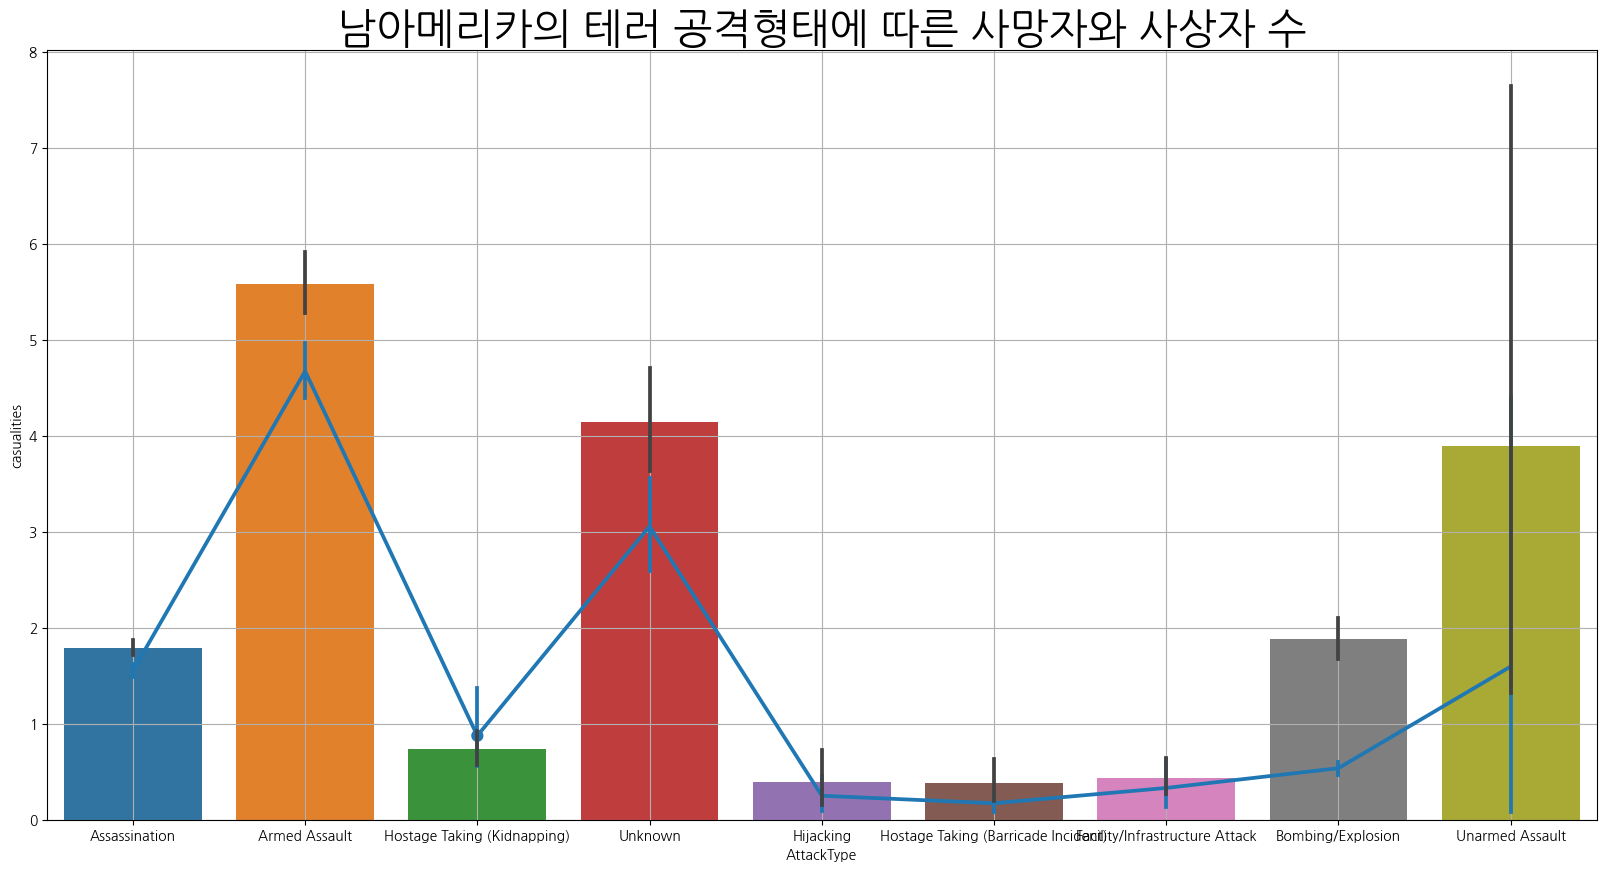

In [610]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(x='AttackType',y ='Killed', data=terror_SA )
sns.barplot(x='AttackType',y ='casualities', data=terror_SA)
plt.title('남아메리카의 테러 공격형태에 따른 사망자와 사상자 수', size = '30')
plt.grid()
plt.show();

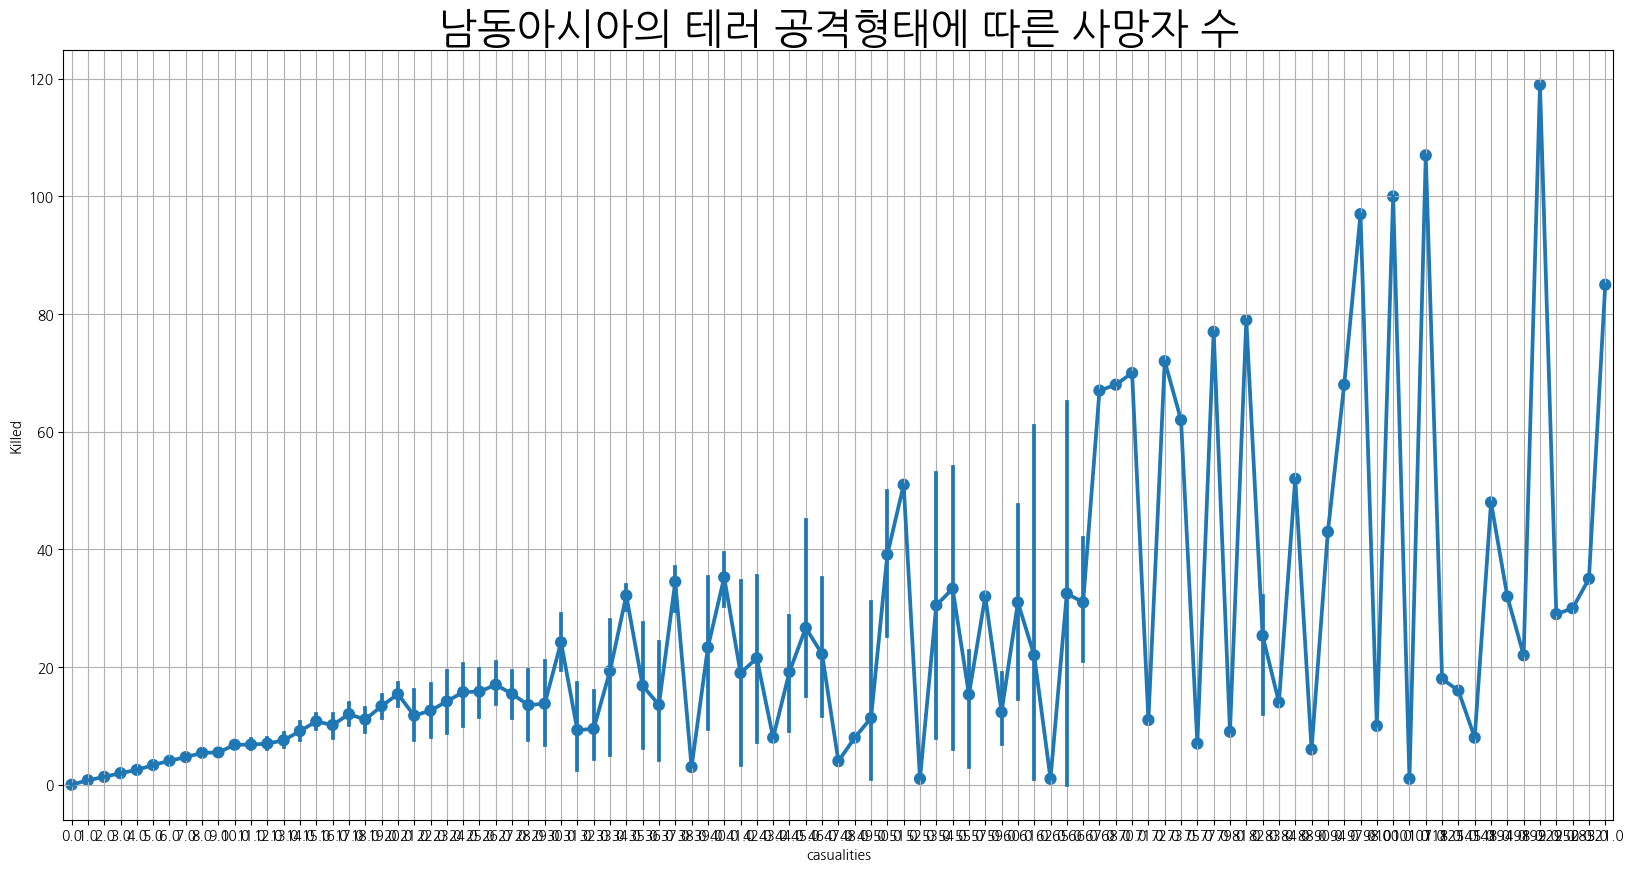

In [611]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(x='casualities',y ='Killed', data=terror_SA )
plt.title('남동아시아의 테러 공격형태에 따른 사망자 수', size = '30')
plt.grid()
plt.show();

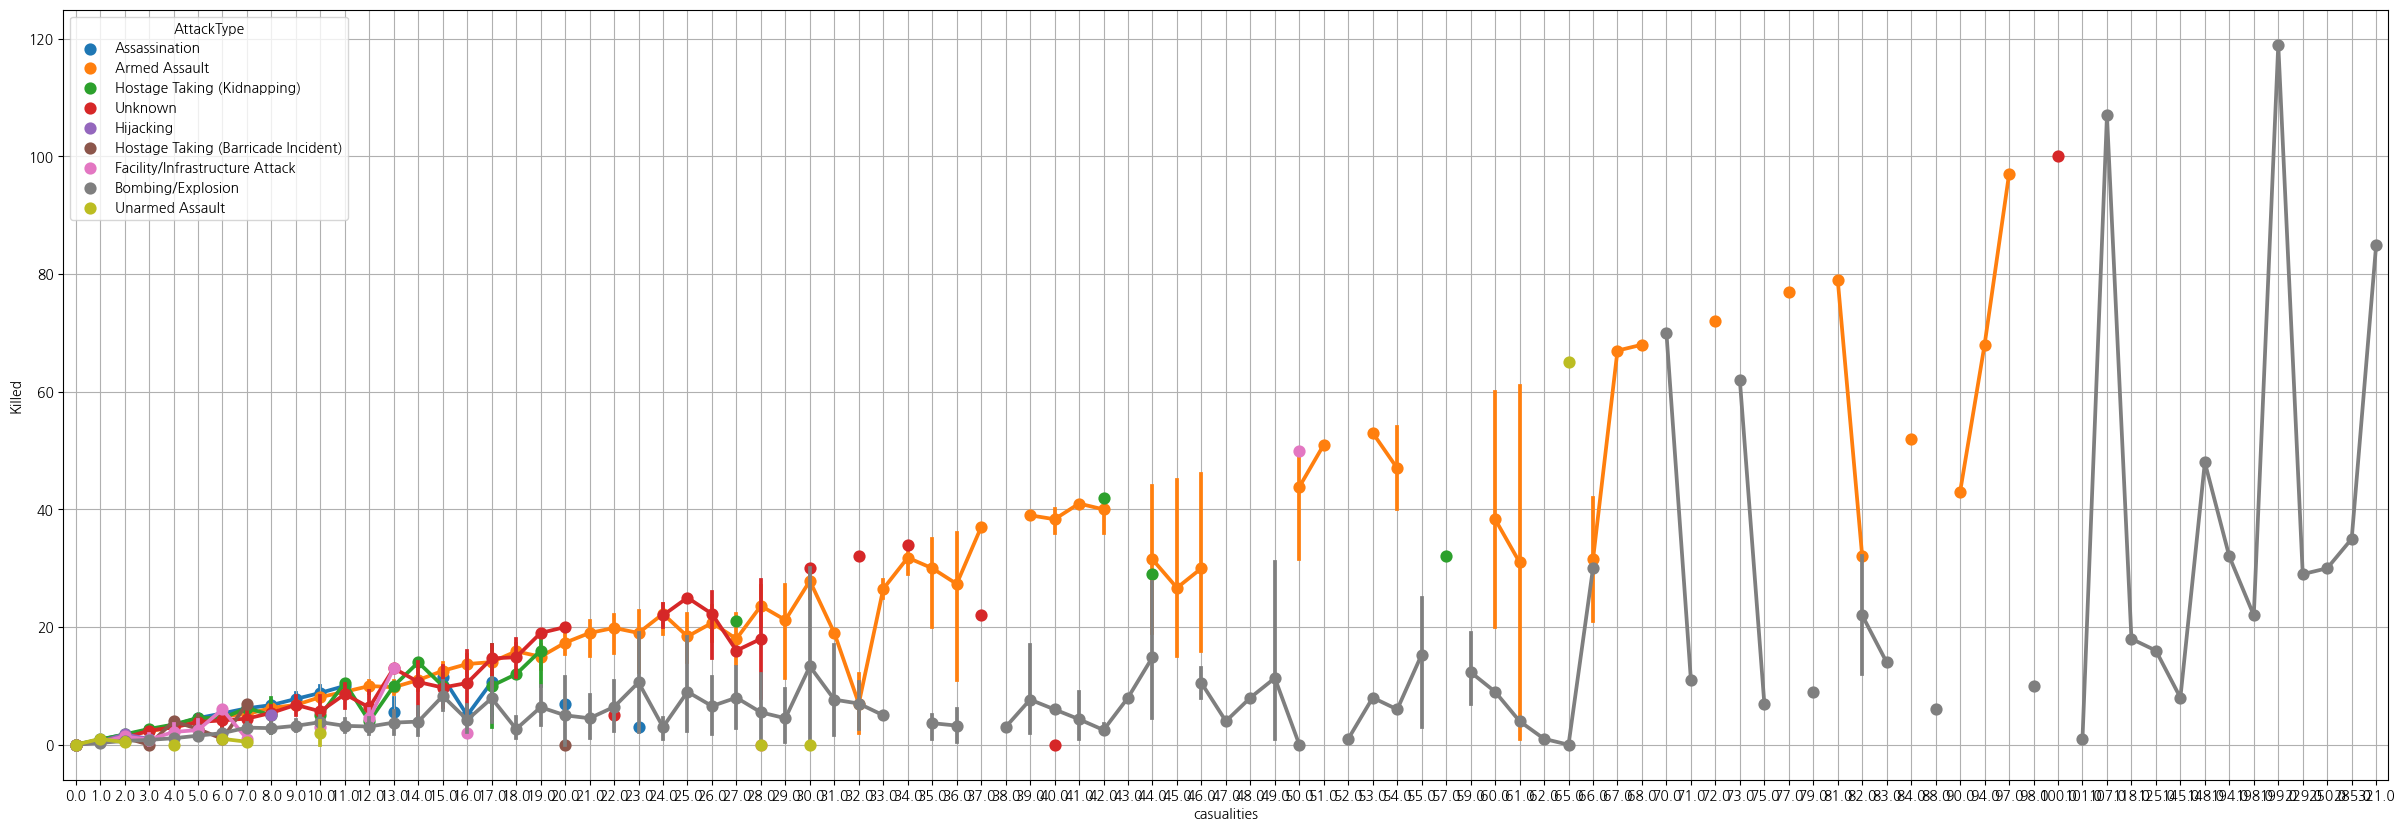

In [612]:
fig, ax = plt.subplots(figsize=(30,10))
sns.pointplot(x='casualities',y ='Killed', hue ='AttackType', data=terror_SA )
plt.grid()
plt.show();

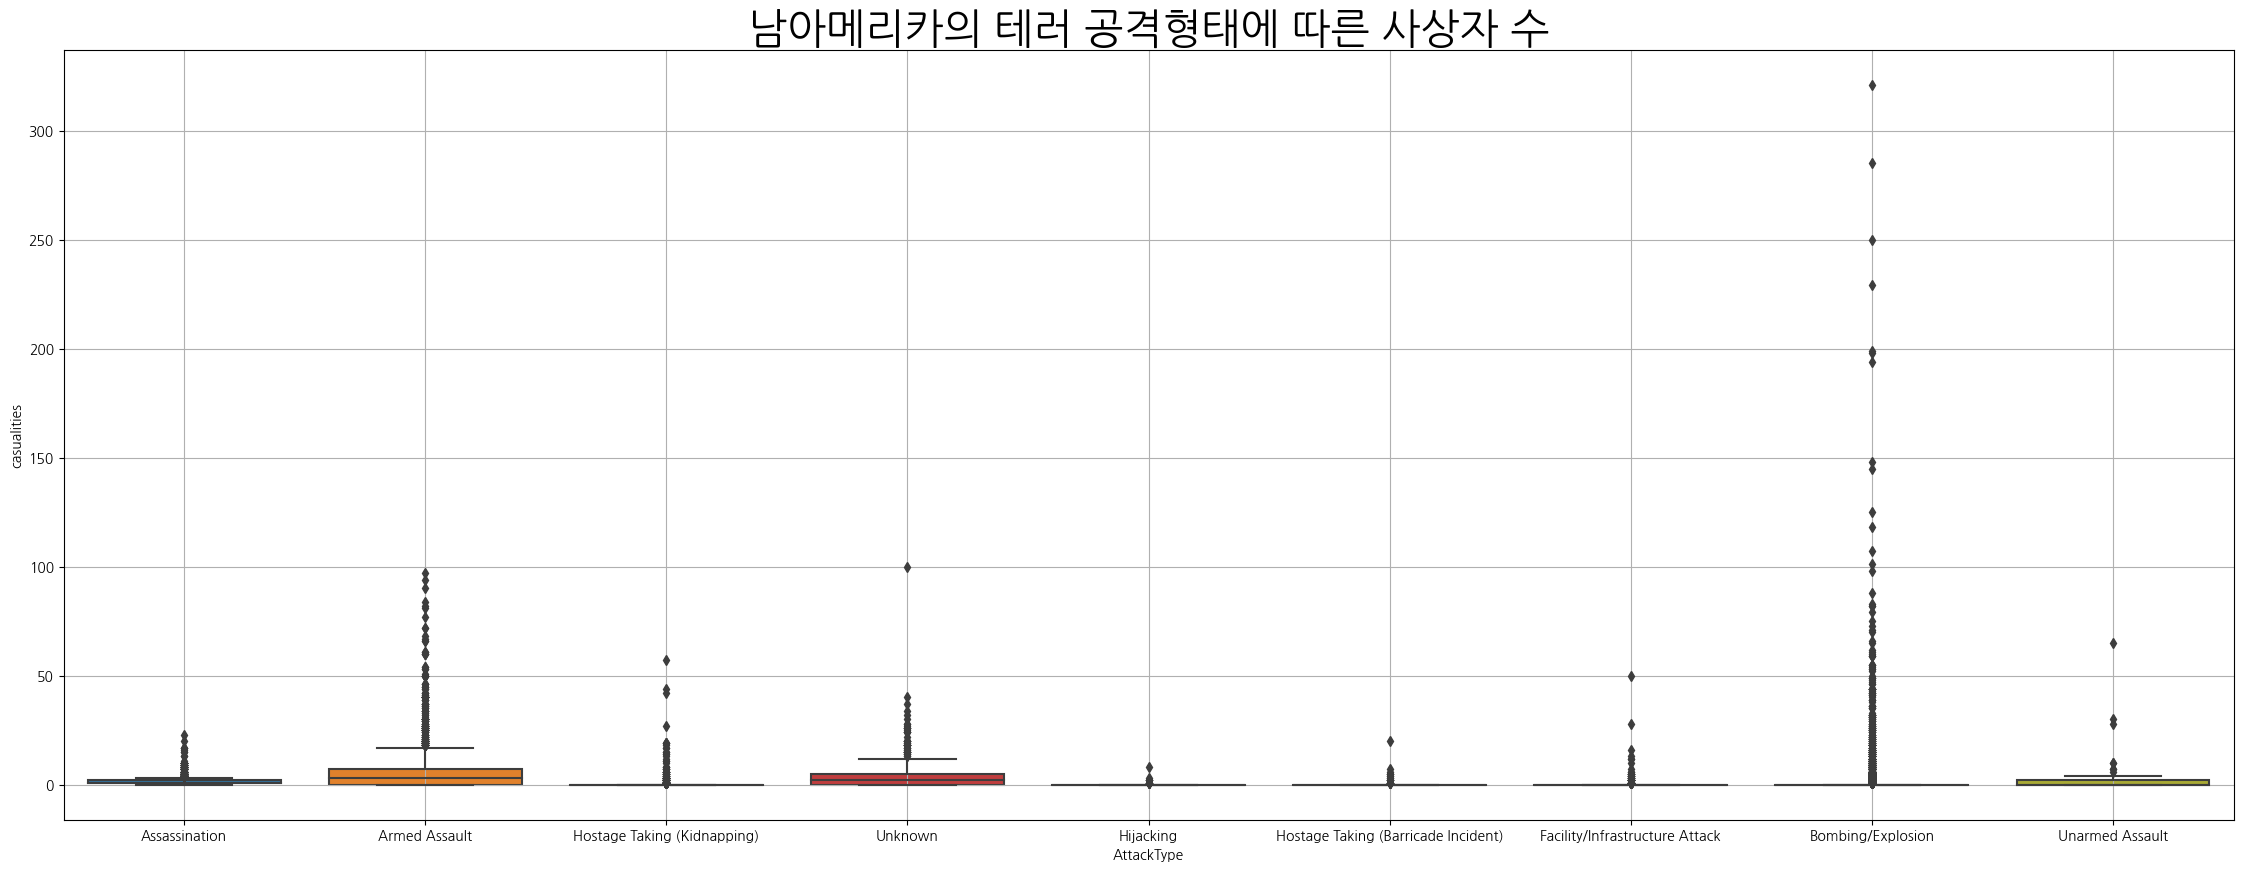

In [613]:
fig, ax = plt.subplots(figsize=(28, 10))
sns.boxplot(x=terror_SA['AttackType'], y=terror['casualities'],)
plt.title('남아메리카의 테러 공격형태에 따른 사상자 수', size = '30')
plt.grid()
plt.show()

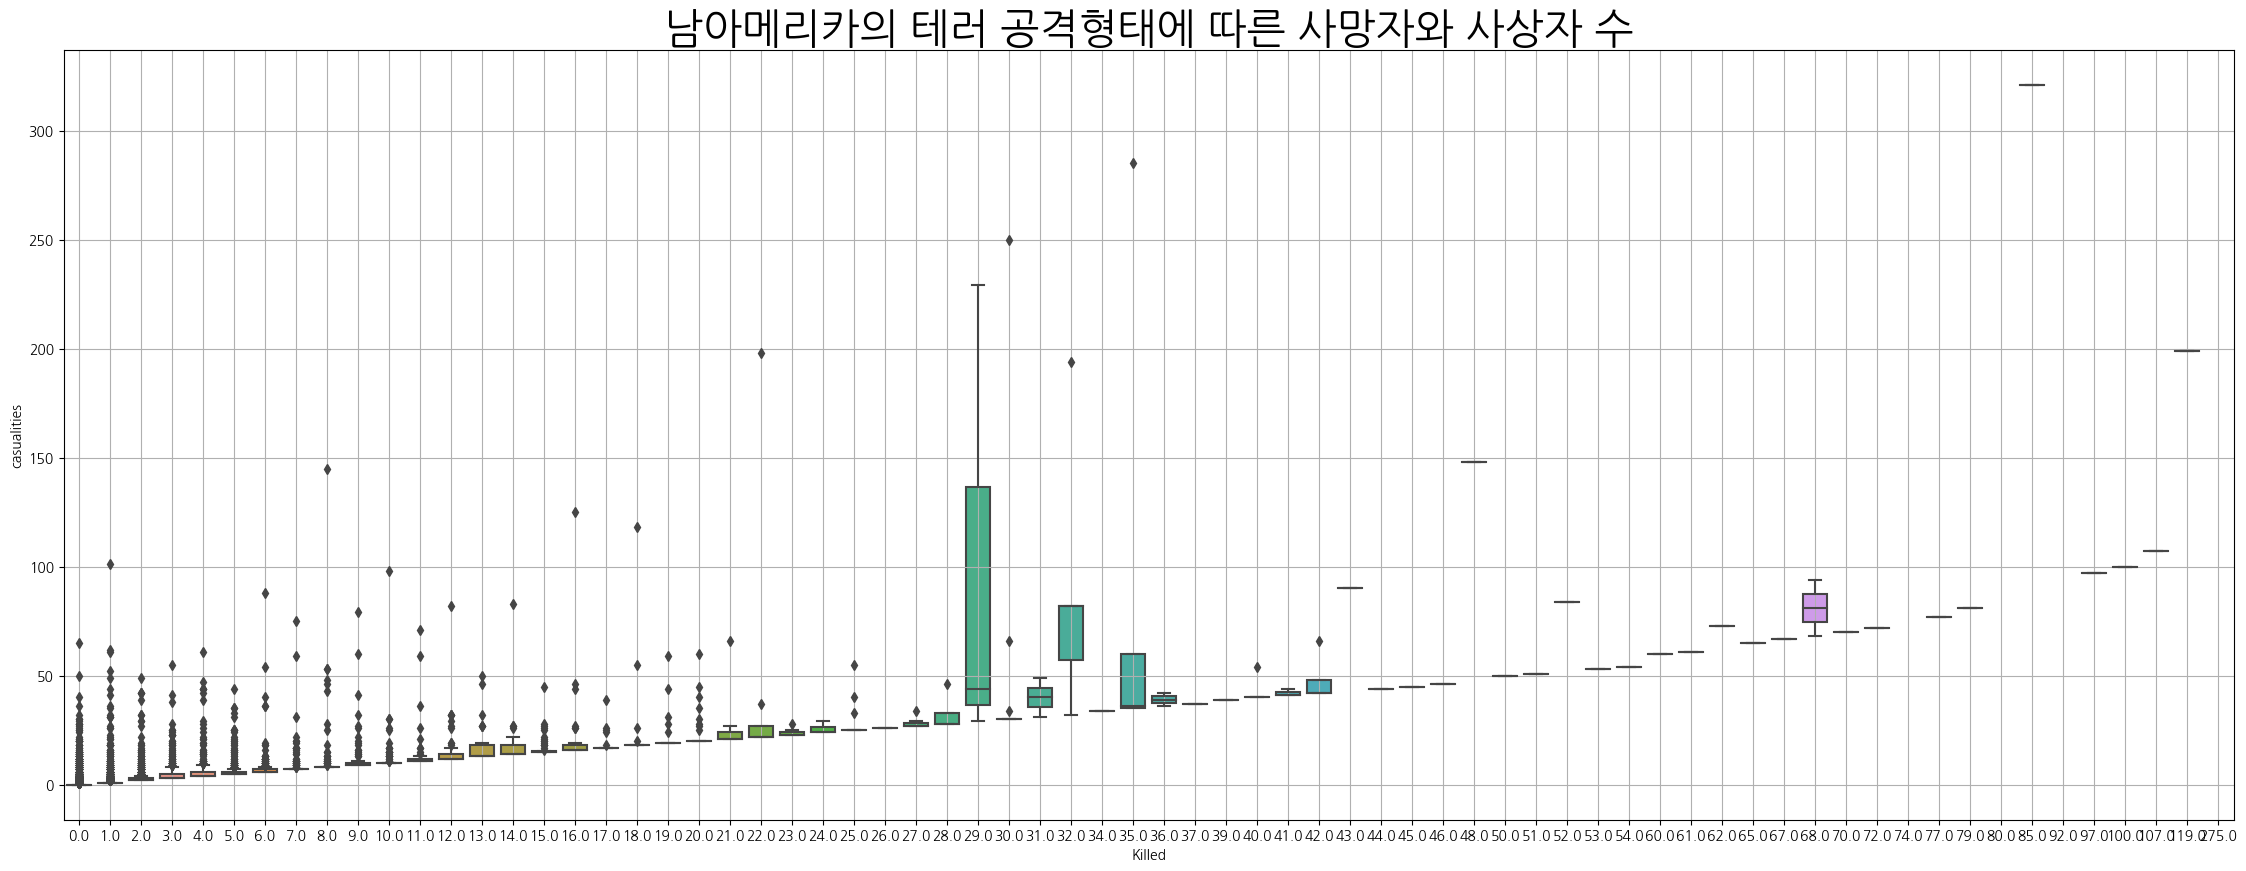

In [614]:
fig, ax = plt.subplots(figsize=(28, 10))
sns.boxplot(x=terror_SA['Killed'], y=terror['casualities'],)
plt.title('남아메리카의 테러 공격형태에 따른 사망자와 사상자 수', size = '30')
plt.grid()
plt.show()

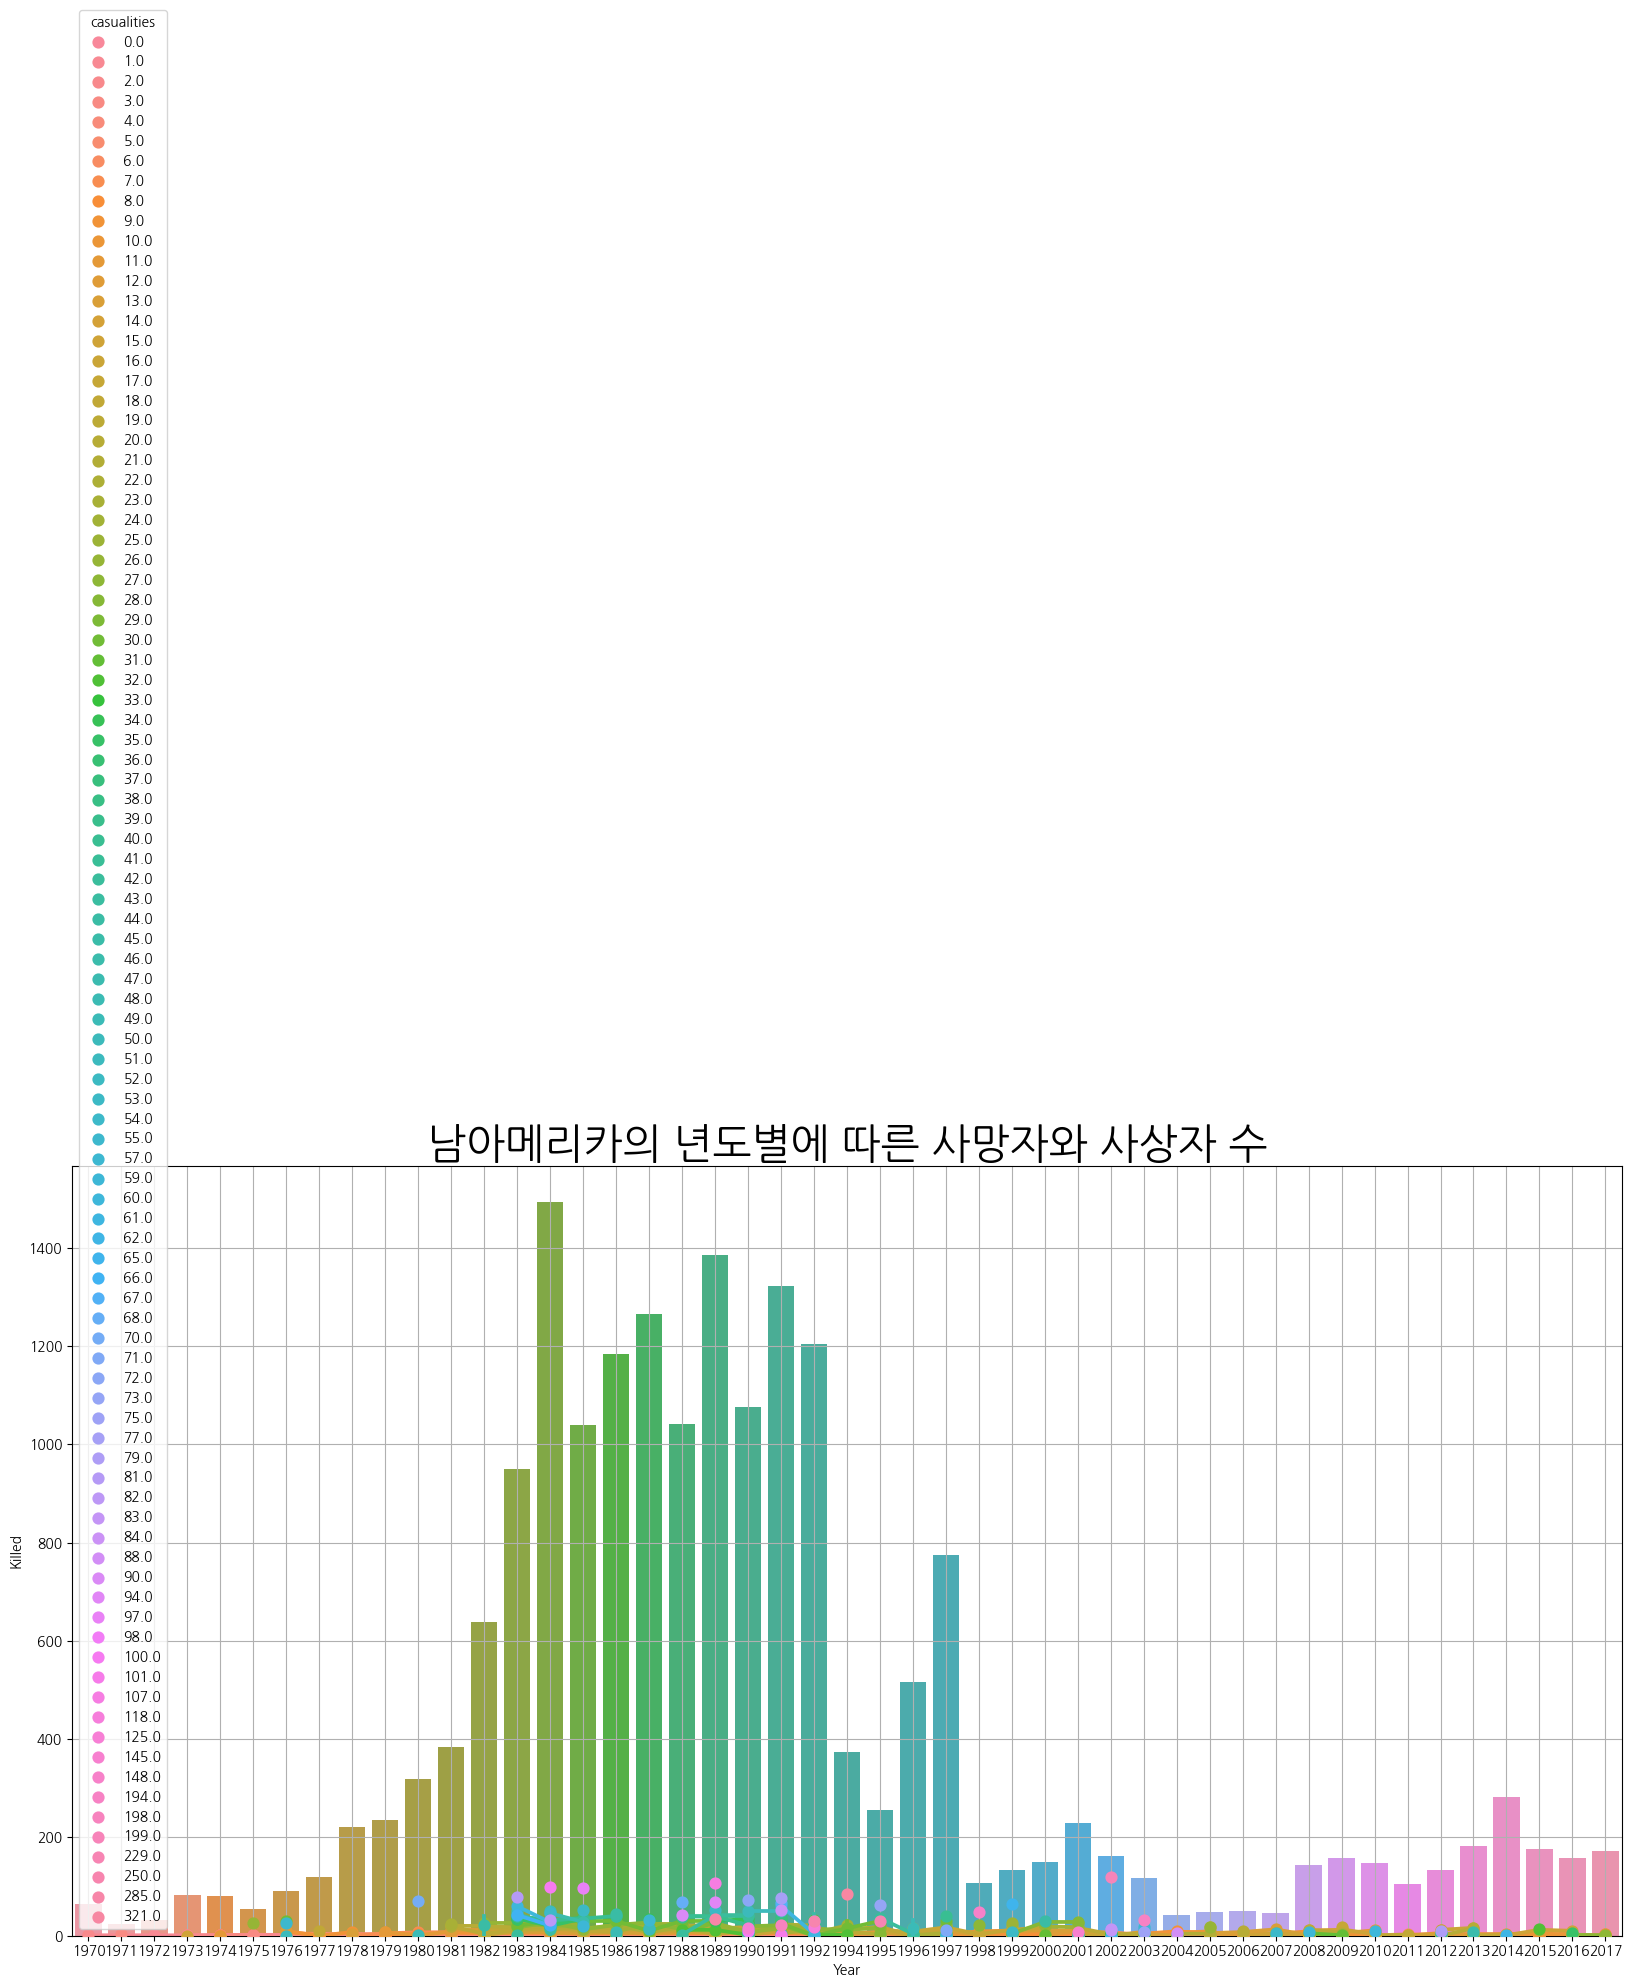

In [615]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x='Year' ,data=terror_SA ) #80년대가 엄청나다
sns.pointplot(x='Year',y ='Killed',hue = 'casualities', data=terror_SA )
plt.title('남아메리카의 년도별에 따른 사망자와 사상자 수', size = '30')
plt.grid() 
plt.show();

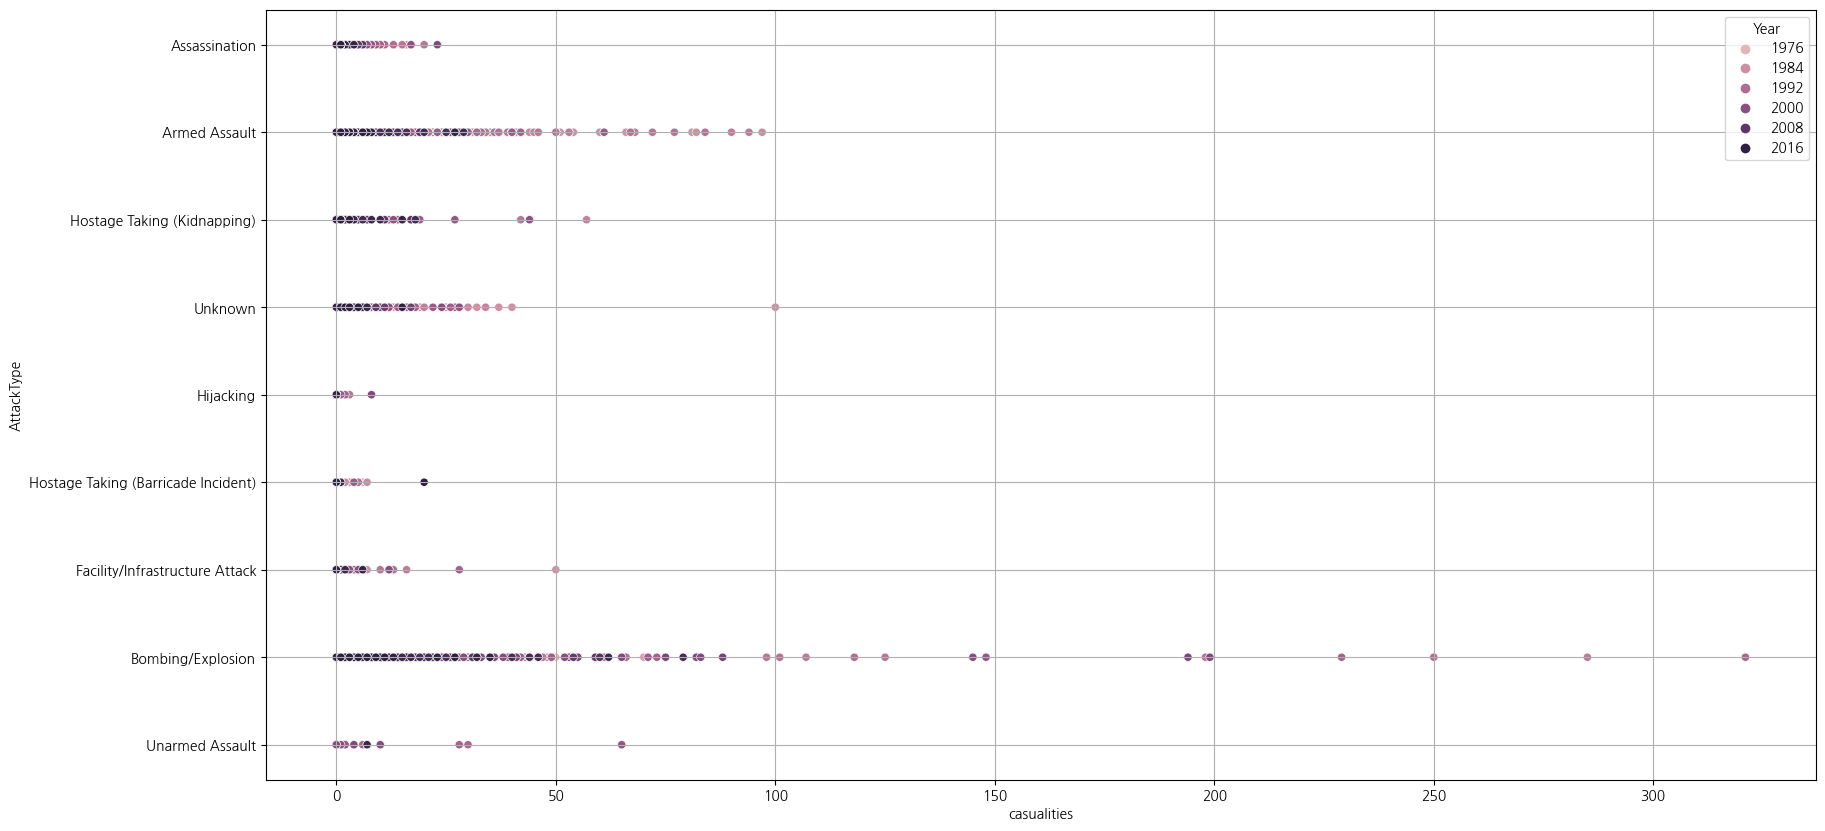

In [394]:
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(y='AttackType', x='casualities',data=terror_SA,  hue='Year')
plt.grid()
plt.show();

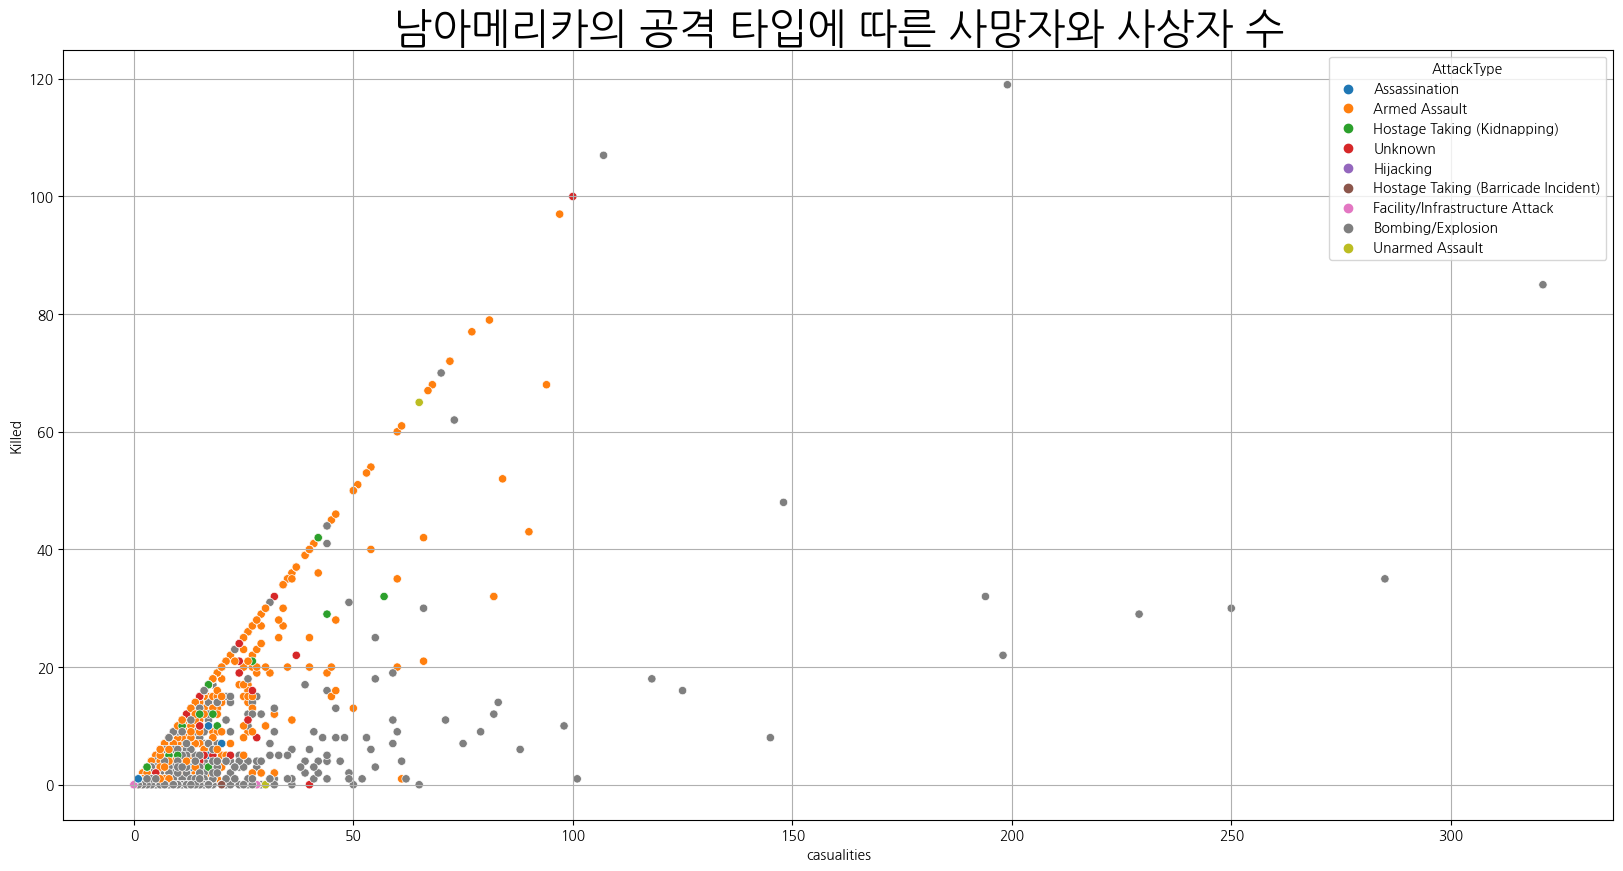

In [638]:
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(y='Killed', x='casualities',data=terror_SA,  hue='AttackType')
plt.title('남아메리카의 공격 타입에 따른 사망자와 사상자 수', size = '30')
plt.grid() #폭탄 테러가 사망자에 비해 사상자도 많다 즉 깔끔하지 못하다. 하지만 무기를 쓰는 것은 단 한번에 정밀하게 타겟을 제거 할 수 있으므로 사상자가 적을 것으로 생각된다.
plt.show();

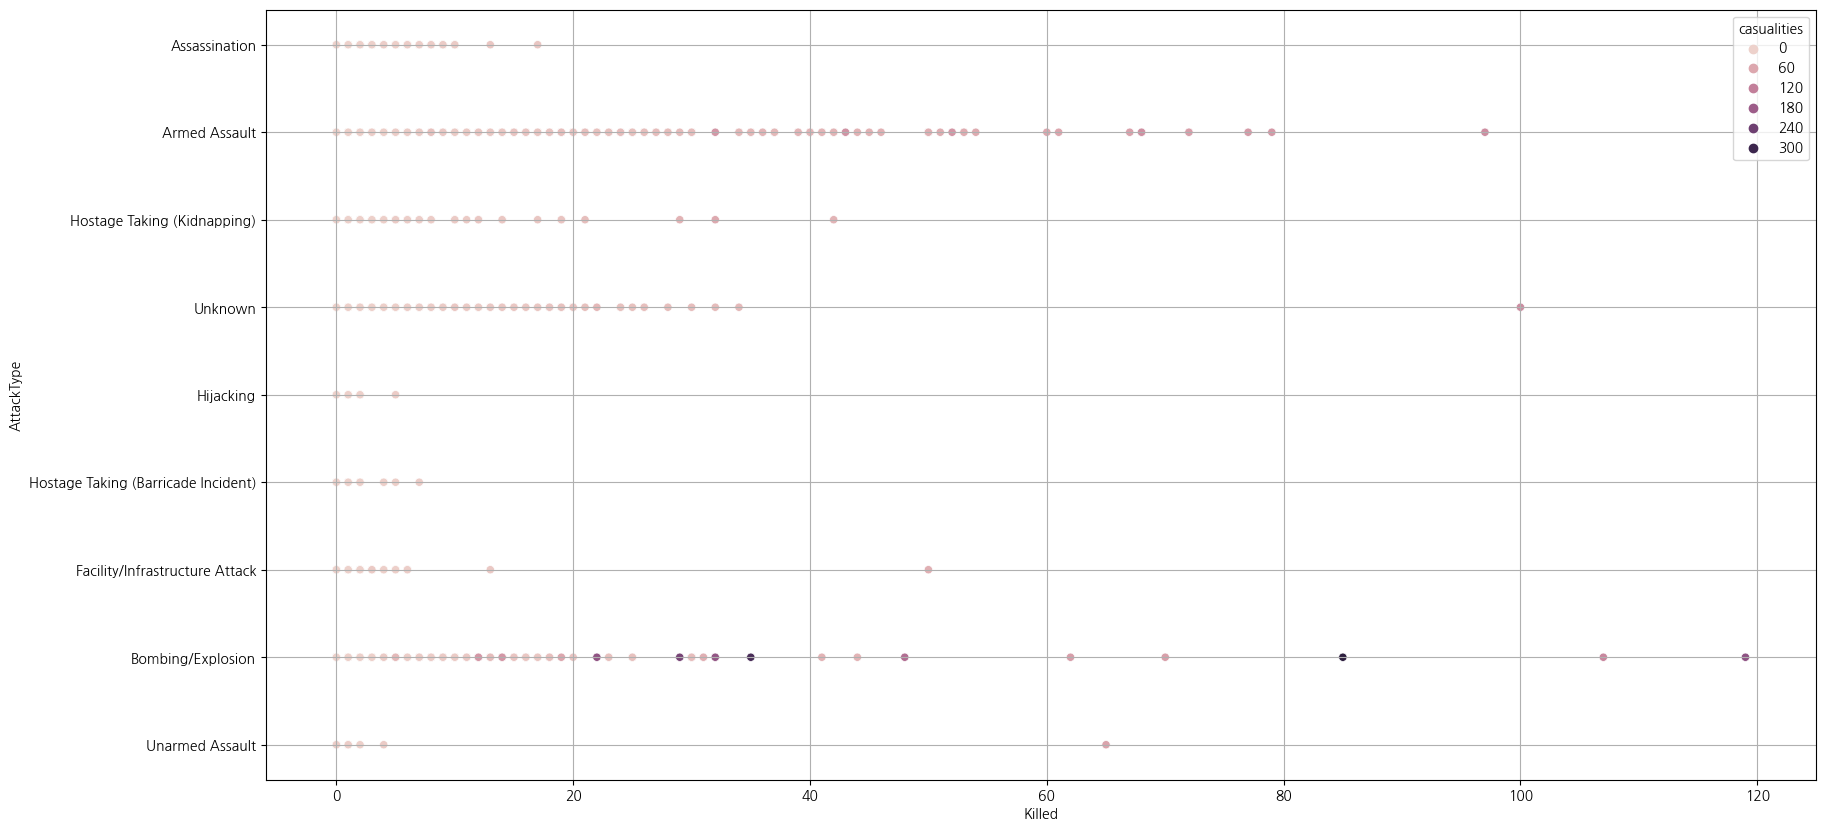

In [481]:
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(y='AttackType', x='Killed',data=terror_SA, hue='casualities')
plt.grid()
plt.show();

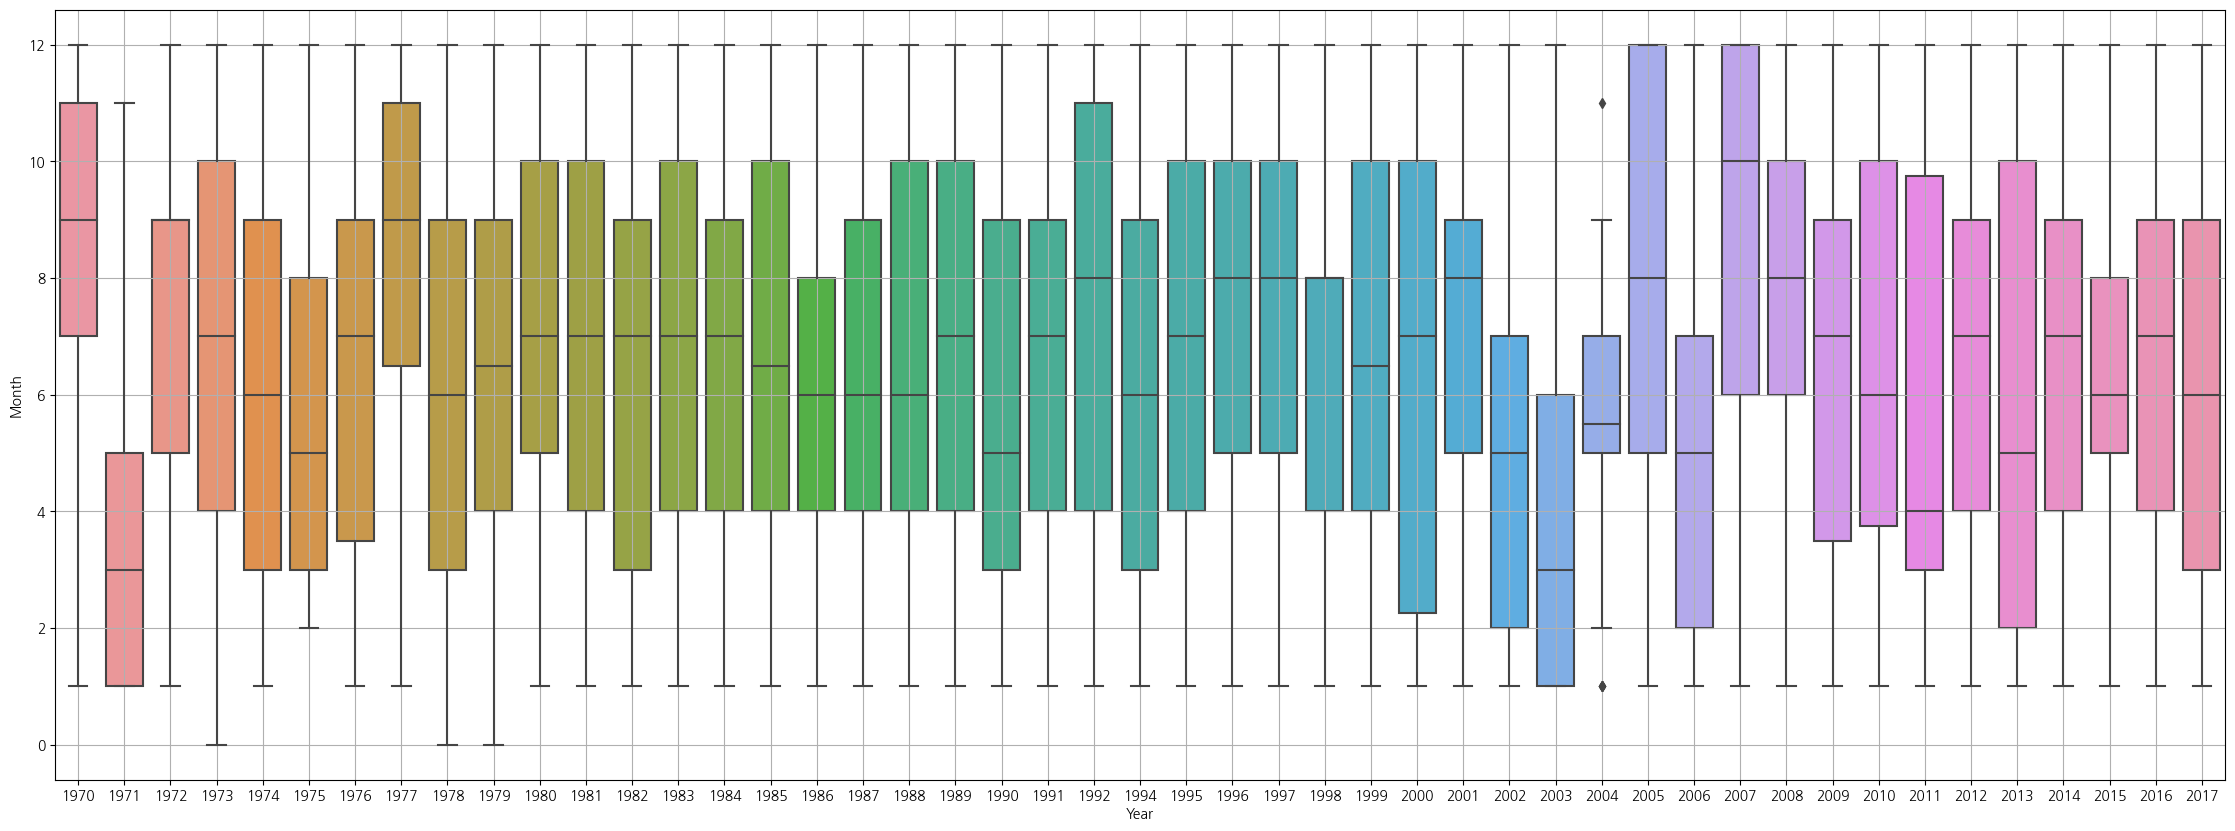

In [616]:
fig, ax = plt.subplots(figsize=(28, 10))
sns.boxplot(x=terror_SA['Year'], y=terror_SA['Month'])
plt.grid()
plt.show()

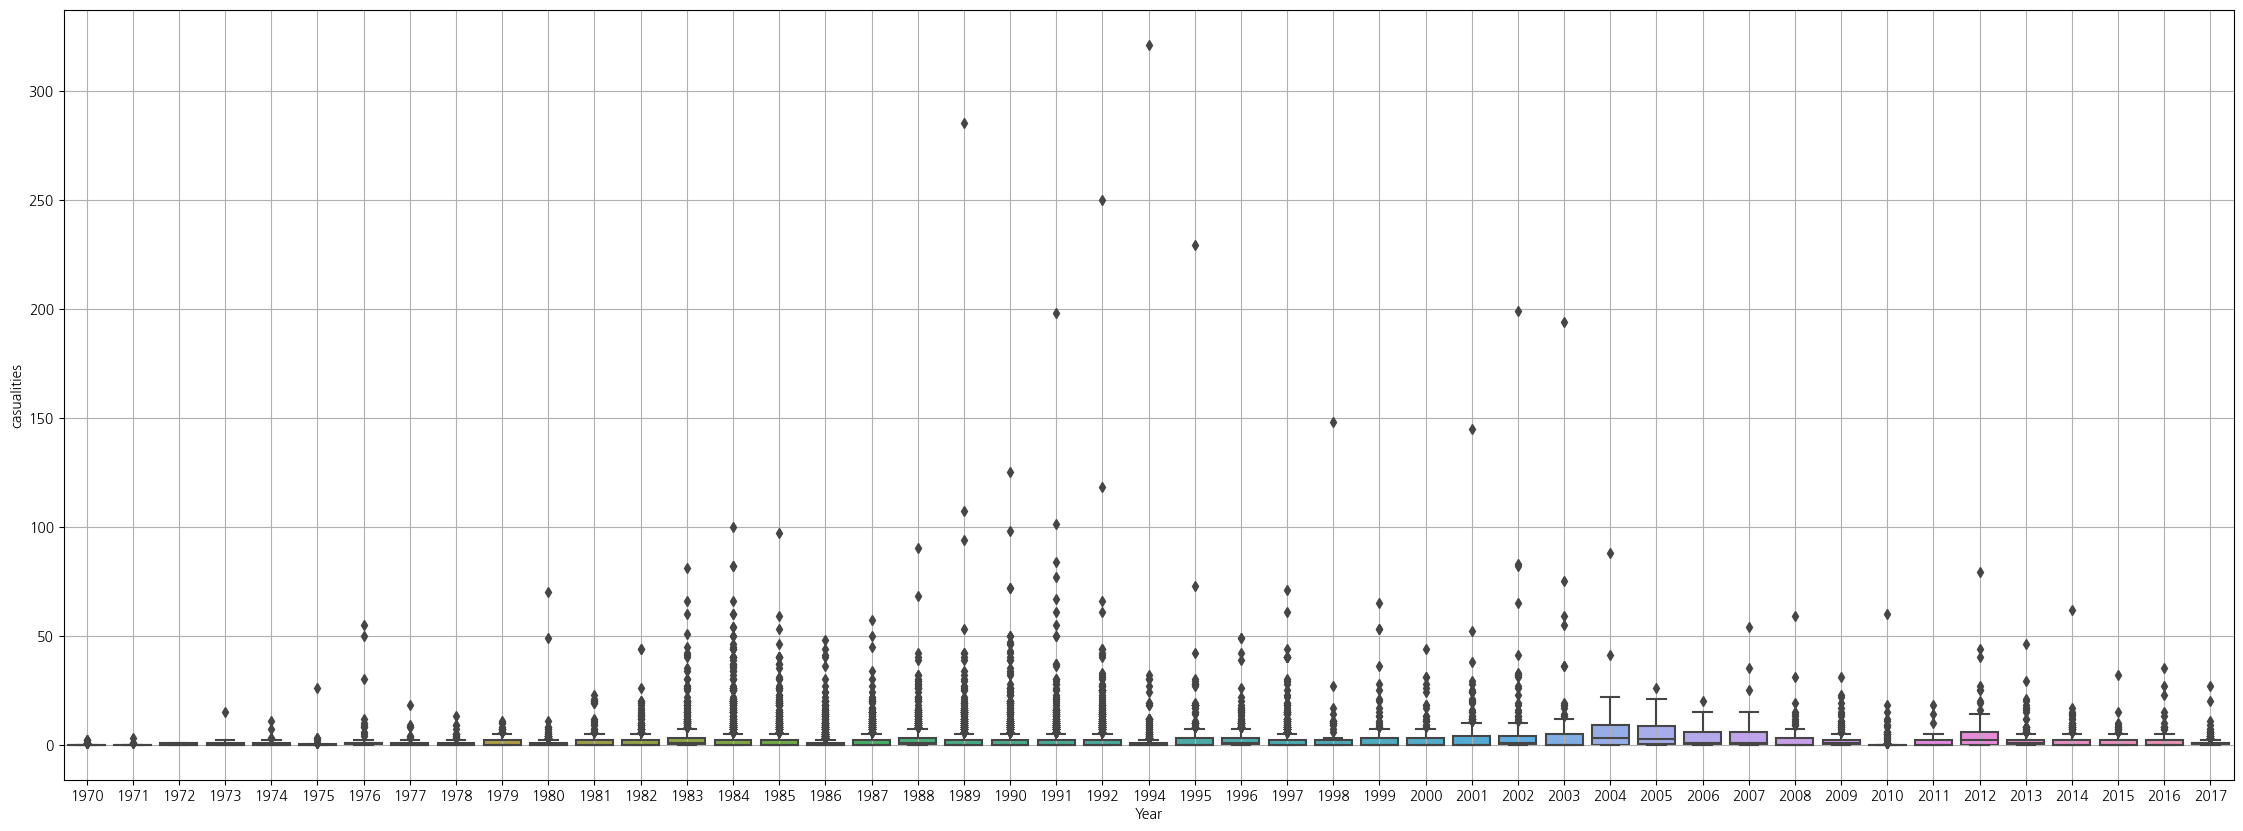

In [617]:
fig, ax = plt.subplots(figsize=(28, 10))
sns.boxplot(x=terror_SA['Year'], y=terror_SA['casualities'])
plt.grid()
plt.show()

In [416]:
terror_SA['Killed'].value_counts()

Killed
0.0      10970
1.0       2700
2.0        971
3.0        587
4.0        380
         ...  
46.0         1
45.0         1
51.0         1
79.0         1
119.0        1
Name: count, Length: 70, dtype: int64

In [ ]:
fig, ax = plt.subplots(figsize=(28, 10))
sns.boxplot(x=terror_SA['Year'], y=terror_SA['casualities'])

plt.show()

# s4. 중동 & 북아프리카

In [315]:
terror[terror.Region == 'Middle East & North Africa']

Year  Month  Day  Country                      Region          city  \
95      1970      2   28   Jordan  Middle East & North Africa        Hebron   
133     1970      3   14    Egypt  Middle East & North Africa    Alexandria   
158     1970      3   29  Lebanon  Middle East & North Africa        Beirut   
195     1970      4   15   Jordan  Middle East & North Africa         Amman   
226     1970      4   25   Turkey  Middle East & North Africa      Istanbul   
...      ...    ...  ...      ...                         ...           ...   
181670  2017     12   31     Iraq  Middle East & North Africa  Hawd al-Waqf   
181671  2017     12   31     Iraq  Middle East & North Africa    Farhatiyah   
181674  2017     12   31     Iraq  Middle East & North Africa          Baaj   
181679  2017     12   31     Iraq  Middle East & North Africa    Muqdadiyah   
181687  2017     12   31    Syria  Middle East & North Africa        Jableh   

         latitude  longitude         AttackType  Killed  Wounded  \
95      31.530243  35.094162      Armed Assault     NaN      NaN   
133     31.198056  29.919167  Bombing/Explosion     0.0      2.0   
158     33.888523  35.503513  Bombing/Explosion     0.0      0.0   
195     31.950001  35.933331  Bombing/Explosion     0.0      0.0   
226     41.106178  28.689863  Bombing/Explosion     0.0      0.0   
...           ...        ...                ...     ...      ...   
181670  33.816111  44.783524            Unknown     1.0      0.0   
181671  34.031331  44.070106  Bombing/Explosion     4.0      9.0   
181674  36.045059  41.716717            Unknown     5.0      0.0   
181679  33.953167  44.921906      Armed Assault    13.0      0.0   
181687  35.407278  35.942679  Bombing/Explosion     2.0      7.0   

                                             Target  \
95                                      Tourist Bus   
133     United Arab Airlines Flight Antonov 24 Acft   
158                                    U.S. Embassy   
195                                      US Embassy   
226                                    EL AL Office   
...                                             ...   
181670                                      Station   
181671                                    Civilians   
181674                                       Troops   
181679                                         Post   
181687                             Hmeymim Air Base   

                                                  Summary  \
95                                                    NaN   
133                                                   NaN   
158                                                   NaN   
195                                                   NaN   
226                                                   NaN   
...                                                   ...   
181670  12/31/2017: Assailants attacked a police stati...   
181671  12/31/2017: Assailants attacked civilians in F...   
181674  12/31/2017: Assailants attacked Baaj, Nineveh,...   
181679  12/31/2017: Assailants attacked volunteer figh...   
181687  12/31/2017: Assailants launched mortars at the...   

                                                    Group  \
95                                                Unknown   
133                                               Unknown   
158     Popular Front for the Liberation of Palestine ...   
195     Popular Front for the Liberation of Palestine ...   
226                                          Palestinians   
...                                                   ...   
181670        Islamic State of Iraq and the Levant (ISIL)   
181671        Islamic State of Iraq and the Levant (ISIL)   
181674        Islamic State of Iraq and the Levant (ISIL)   
181679        Islamic State of Iraq and the Levant (ISIL)   
181687                                  Muslim extremists   

                        Target_type Weapon_type Motive  casualities  
95                         Tourists    Firear

In [370]:
terror_MN =terror[terror.Region == 'Middle East & North Africa']

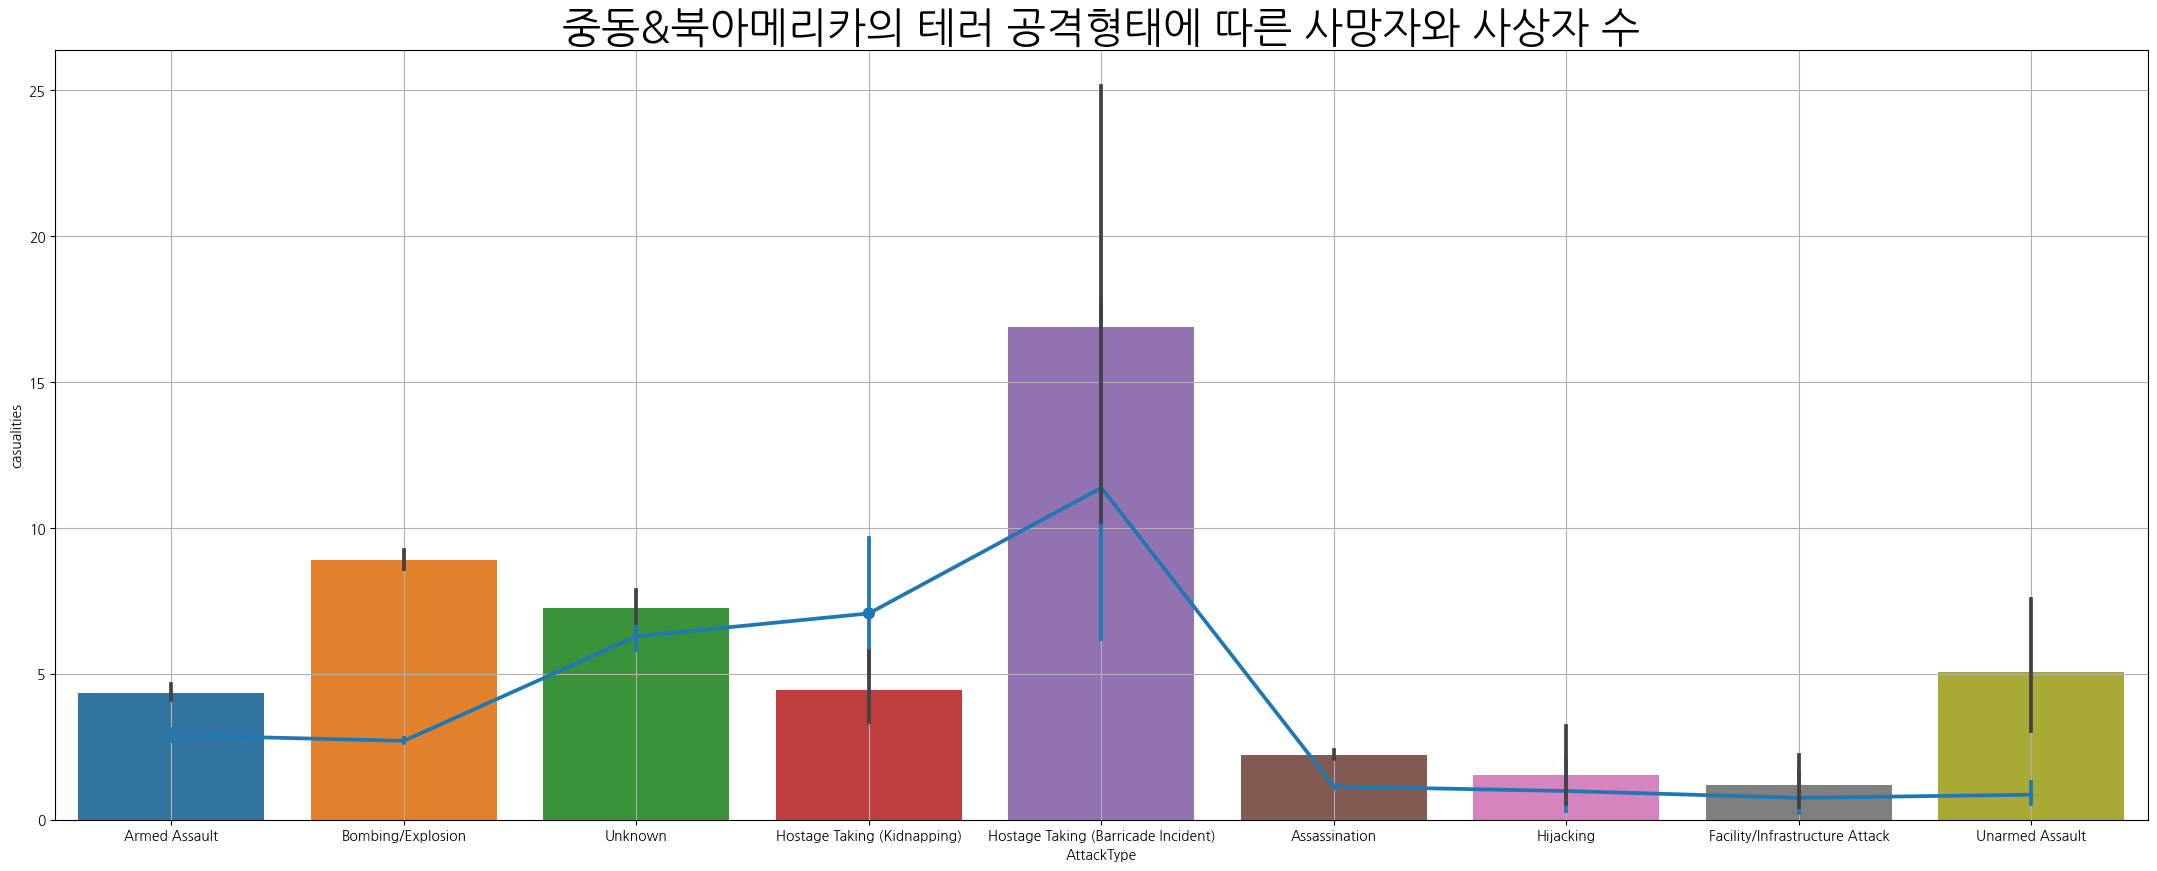

In [618]:
fig, ax = plt.subplots(figsize=(27,10))
sns.pointplot(x='AttackType',y ='Killed', data=terror_MN )
sns.barplot(x='AttackType',y ='casualities', data=terror_MN)
plt.title('중동&북아메리카의 테러 공격형태에 따른 사망자와 사상자 수', size = '30')
plt.grid()
plt.show();

# s4.남동아시아 

In [316]:
terror[terror.Region == 'Southeast Asia']

Year  Month  Day      Country          Region            city  \
2       1970      1    0  Philippines  Southeast Asia         Unknown   
26      1970      1   21  Philippines  Southeast Asia     Quezon City   
39      1970      1   31  Philippines  Southeast Asia          Bamban   
96      1970      3    0  Philippines  Southeast Asia          Manila   
150     1970      3   24  Philippines  Southeast Asia         Angeles   
...      ...    ...  ...          ...             ...             ...   
181677  2017     12   31  Philippines  Southeast Asia         Limpogo   
181678  2017     12   30  Philippines  Southeast Asia  Pikit district   
181681  2017     12   31  Philippines  Southeast Asia   Shariff Aguak   
181688  2017     12   31  Philippines  Southeast Asia        Kubentog   
181690  2017     12   31  Philippines  Southeast Asia   Cotabato City   

         latitude   longitude                      AttackType  Killed  \
2       15.478598  120.599741                   Assassination     1.0   
26      14.674280  121.057495               Bombing/Explosion     0.0   
39      15.675051  120.331618                         Unknown     0.0   
96      14.596051  120.978666               Bombing/Explosion     0.0   
150     15.153002  120.591942                         Unknown     1.0   
...           ...         ...                             ...     ...   
181677   6.983953  124.420664  Facility/Infrastructure Attack     0.0   
181678   7.053143  124.619270               Bombing/Explosion     1.0   
181681   6.862806  124.443649               Bombing/Explosion     1.0   
181688   6.900742  124.437908  Facility/Infrastructure Attack     0.0   
181690   7.209594  124.241966               Bombing/Explosion     0.0   

        Wounded        Target  \
2           0.0      Employee   
26          0.0     JUSMAG HQ   
39          1.0        Seaman   
96          0.0  U.S. Embassy   
150         0.0       officer   
...         ...           ...   
181677      0.0          Town   
181678      1.0         Store   
181681      5.0        Patrol   
181688      0.0        Houses   
181690      0.0       Unknown   

                                                  Summary  \
2                                                     NaN   
26                                                    NaN   
39                                                    NaN   
96                                                    NaN   
150                                                   NaN   
...                                                   ...   
181677  12/31/2017: Assailants set fire to at least 12...   
181678  12/30/2017: Assailants threw a grenade at a st...   
181681  12/31/2017: A roadside bomb detonated targetin...   
181688  12/31/2017: Assailants set fire to houses in K...   
181690  12/31/2017: An explosive device was discovered...   

                                             Group  \
2                                          Unknown   
26                                         Unknown   
39                         New People's Army (NPA)   
96                                         Unknown   
150                                        Unknown   
...                                            ...   
181677  Bangsamoro Islamic Freedom Movement (BIFM)   
181678                                     Unknown   
181681  Bangsamoro Islamic Freedom Movement (BIFM)   
181688  Bangsamoro Islamic Freedom Movement (BIFM)   
181690                                     Unknown   

                        Target_type Weapon_type Motive  casualities  
2               Journalists & Media     Unknown    NaN          1.0  
26          Government (Diplomatic)  Explosives    NaN          0.0  
39                         Military     Unknown    NaN          1.0  
96          Government (Diplomatic)  Explosives    NaN          0.0  
150                        Military     Unknown    NaN          1.0  
...                             ...         ...    ... 

In [375]:
terror_SAs=terror[terror.Region == 'Southeast Asia']

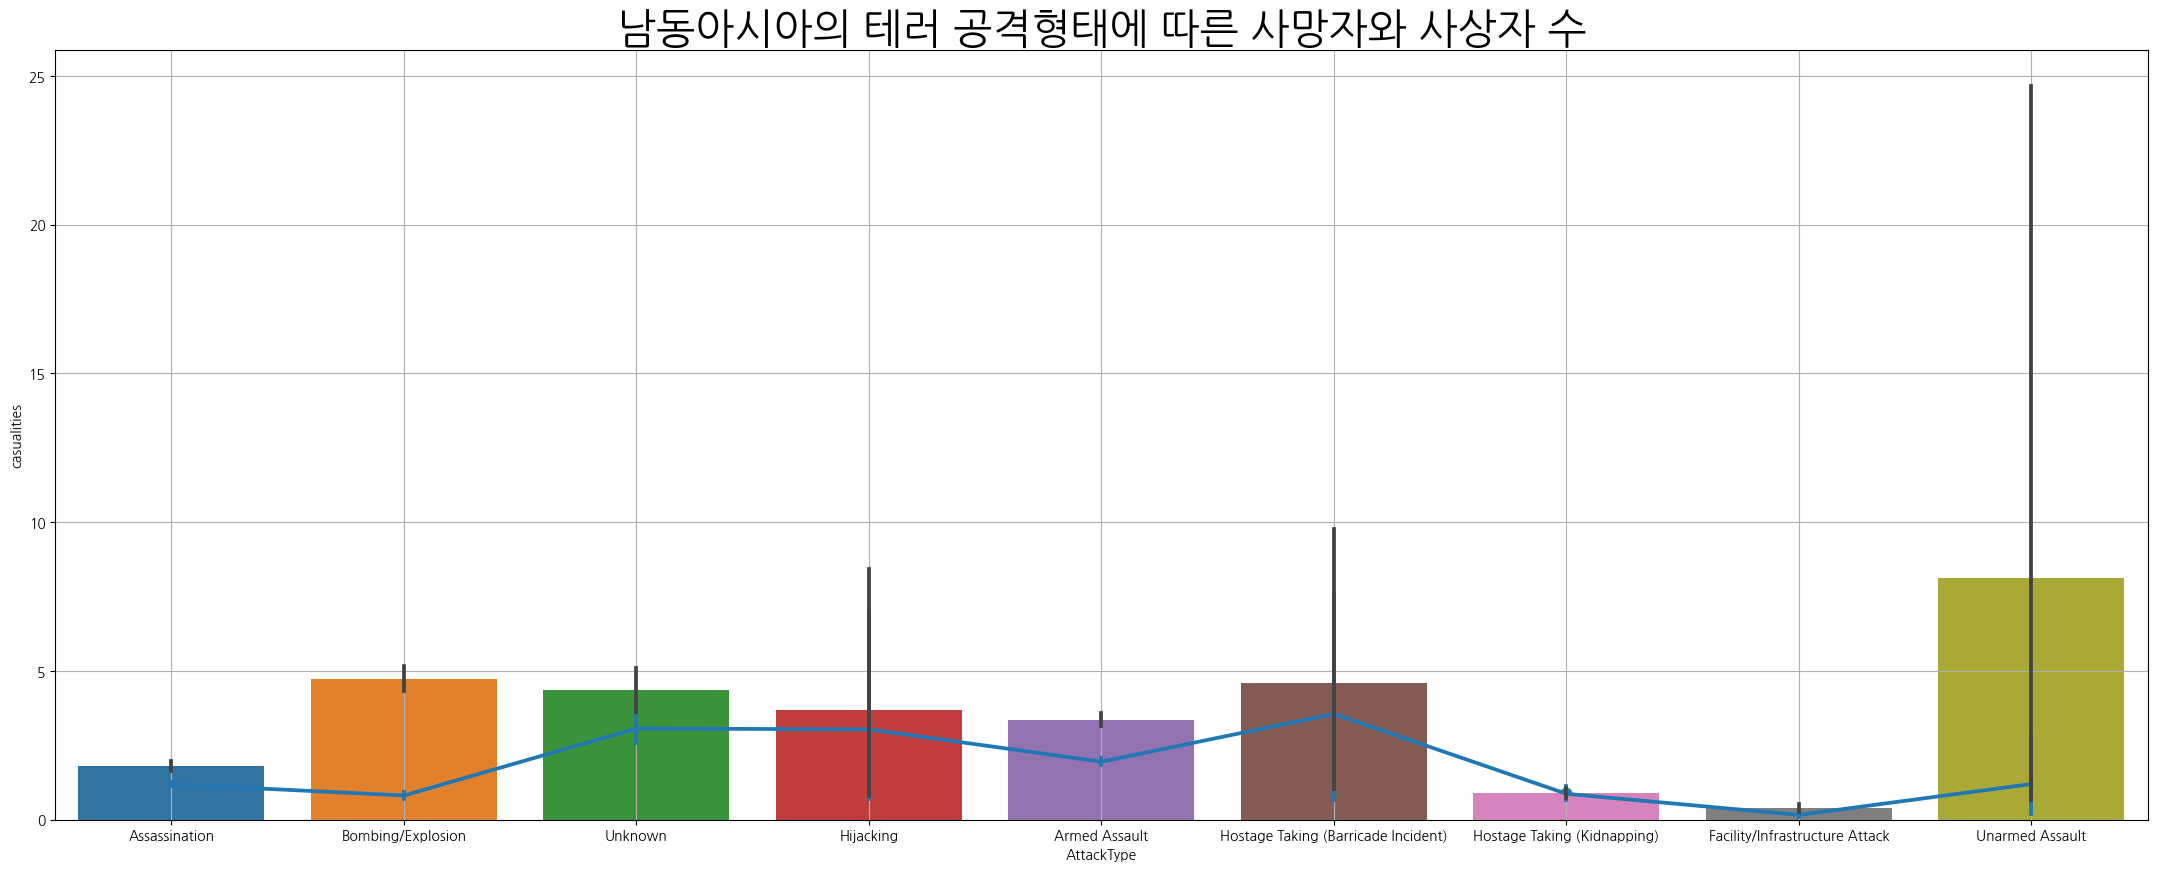

In [619]:
fig, ax = plt.subplots(figsize=(27,10))
sns.pointplot(x='AttackType',y ='Killed', data=terror_SAs )
sns.barplot(x='AttackType',y ='casualities', data=terror_SAs)
plt.title('남동아시아의 테러 공격형태에 따른 사망자와 사상자 수', size = '30')
plt.grid()
plt.show();

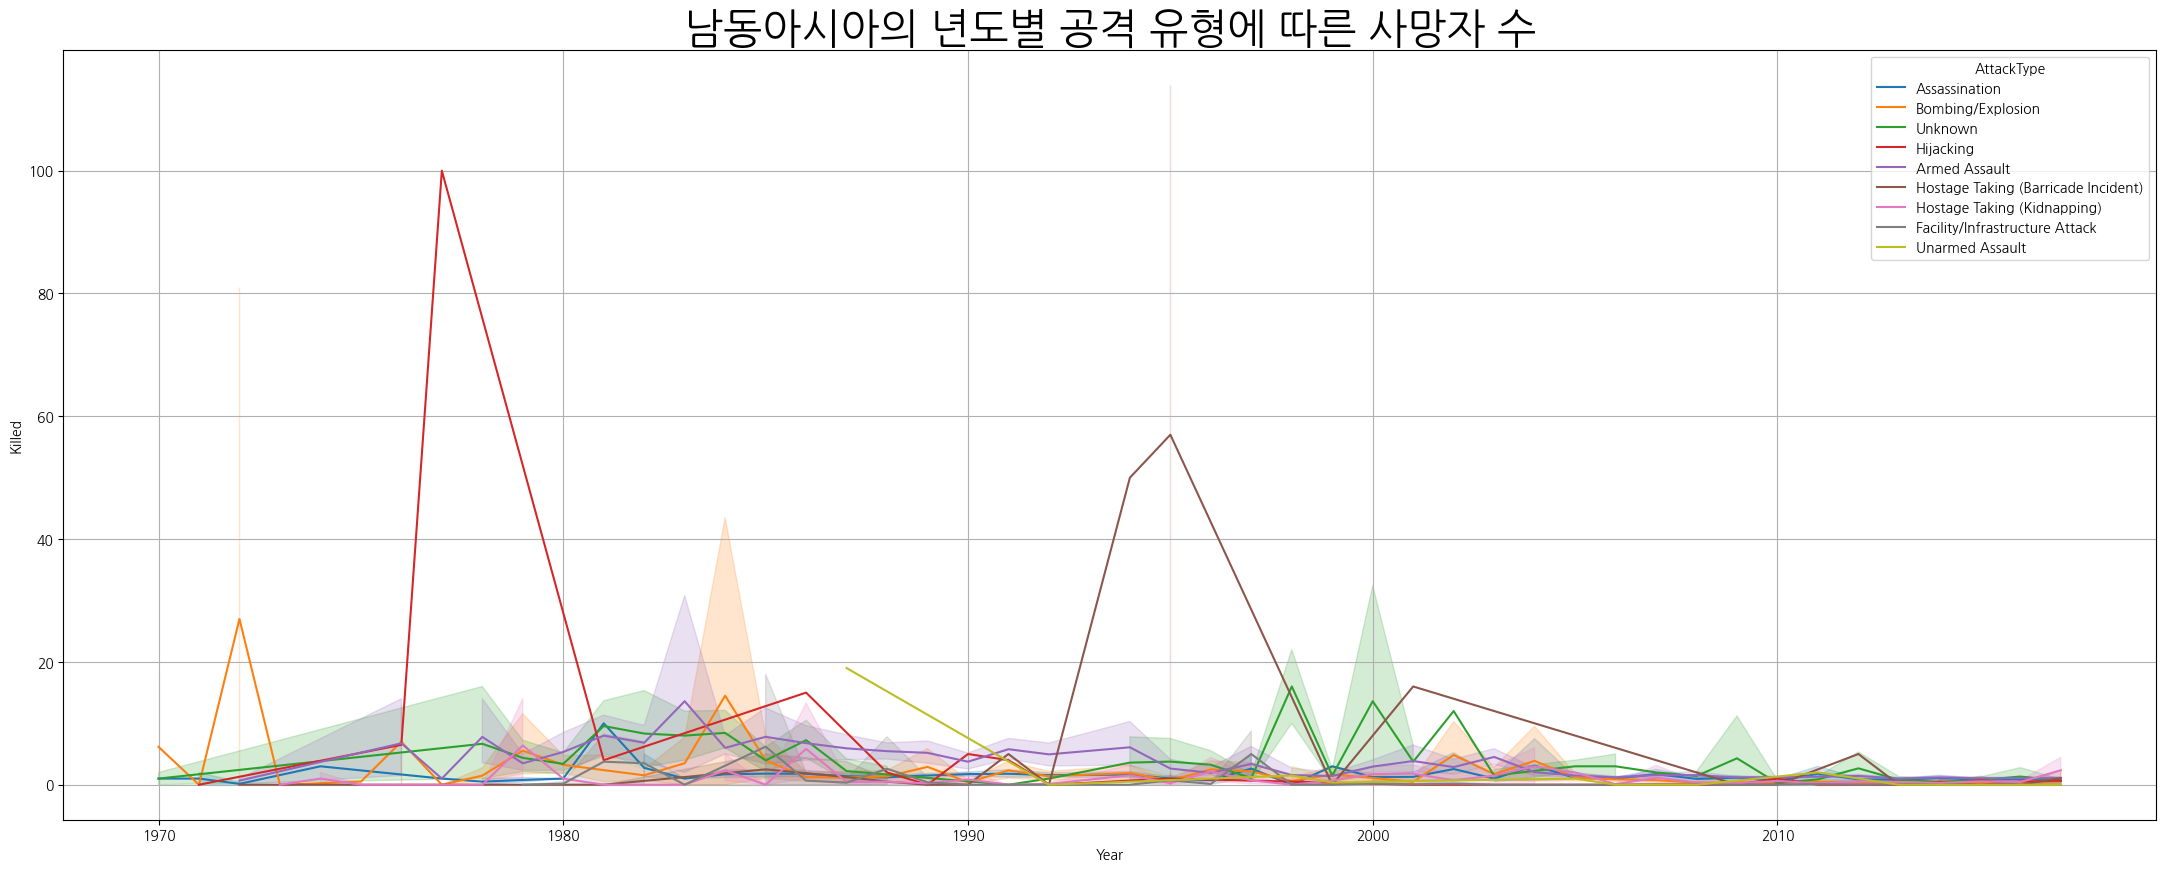

In [620]:
fig, ax = plt.subplots(figsize=(27,10))
sns.lineplot(x='Year',y ='Killed',hue = 'AttackType', data=terror_SAs )
plt.title('남동아시아의 년도별 공격 유형에 따른 사망자 수', size = '30')
plt.grid()
plt.show()

In [358]:
terror[terror.Year == 2001]

Year  Month  Day   Country                      Region  \
71650  2001      1    0  Colombia               South America   
71651  2001      1    1     Yemen  Middle East & North Africa   
71652  2001      1    1  Colombia               South America   
71653  2001      1    1    Turkey  Middle East & North Africa   
71654  2001      1    1   Algeria  Middle East & North Africa   
...     ...    ...  ...       ...                         ...   
73551  2001     12   28    Angola          Sub-Saharan Africa   
73552  2001     12   28    Uganda          Sub-Saharan Africa   
73553  2001     12   30     India                  South Asia   
73554  2001     12   30    Russia              Eastern Europe   
73555  2001     12   30   Myanmar              Southeast Asia   

                  city   latitude  longitude                   AttackType  \
71650          Unknown   3.800889 -76.641271                      Unknown   
71651             Aden  12.825647  44.846416            Bombing/Explosion   
71652  Bogota district   4.598100 -74.076030  Hostage Taking (Kidnapping)   
71653         Istanbul  41.106178  28.689863            Bombing/Explosion   
71654           Djelfa  34.666667   3.250000                      Unknown   
...                ...        ...        ...                          ...   
73551      N'dalatando  -9.298851  14.916506                Armed Assault   
73552            Mbale   1.078444  34.181006                Armed Assault   
73553          Kanthol  33.322586  74.505312                Armed Assault   
73554           Grozny  43.320229  45.654491                Armed Assault   
73555          Lawpita  19.545602  97.348967                Armed Assault   

       Killed  Wounded                                             Target  \
71650     3.0      0.0                          Farmers in Valle province   
71651     0.0      0.0                               Aden Anglican Church   
71652     0.0      0.0                                 Colombian Peasants   
71653     0.0     10.0                 Civilians celebrating the new year   
71654     5.0      1.0                       An Algerian family in Djelfa   
...       ...      ...                                                ...   
73551     2.0      2.0  Ndalatando Police Officers road between Ndalat...   
73552     1.0      0.0                                 Michael Stachofsky   
73553     4.0      0.0                        Civilians in Kanthol, India   
73554     4.0      NaN  Russian soldiers in a military patrol in Grozn...   
73555     6.0      0.0                     Villagers near Lawpita village   

                                                 Summary  \
71650  1/8/2001: Paramilitaries killed three farmers ...   
71651  01/01/2001: The wall of an Anglican Church was...   
71652  01/01/2001: The United Self-defense Forces of ...   
71653  1/1/2001: An improvised explosive device went ...   
71654  1/1/2000: Unknown perpetrators, believed to be...   
...                                                  ...   
73551  12/28/2001: Two police officers were killed, a...   
73552  12/28/2001: A prominent American missionary, M...   
73553  12/30/2001: Muslim militants killed four peopl...   
73554  12/30/2001: A Russian patrol of military vehic...   
73555  12/30/2001: Fifteen suspected members of the K...   

                                                   Group  \
71650                                     Paramilitaries   
71651                                            Unknown   
71652        United Self Defense Units of Colombia (AUC)   
71653                                            Unknown   
71654                        Algerian Islamic Extremists   
...                                                  ...   
73551  National Union for the Total Independence of A...   
73552                                            Unknown   
73553                                            Unknown   
73554   Armed Forces of the Chechen Republic of Ichkeri

# s5. 테러의 위험성을 알릴 시각적 방법

## 일단 9/11 테러로 시작해보자

In [423]:
terror_01 = terror[terror.Year == 2001]

In [442]:
terror_01.sort_values(by ='casualities', ascending= False)

Year  Month  Day        Country                      Region  \
73126  2001      9   11  United States               North America   
73127  2001      9   11  United States               North America   
72646  2001      8   11         Angola          Sub-Saharan Africa   
73128  2001      9   11  United States               North America   
73437  2001     12    1         Israel  Middle East & North Africa   
...     ...    ...  ...            ...                         ...   
73529  2001     12   23          Nepal                  South Asia   
73530  2001     12   23          Yemen  Middle East & North Africa   
73546  2001     12   26    Philippines              Southeast Asia   
73549  2001     12   27    Philippines              Southeast Asia   
73554  2001     12   30         Russia              Eastern Europe   

                city   latitude   longitude         AttackType  Killed  \
73126  New York City  40.697132  -73.931351          Hijacking  1384.0   
73127  New York City  40.697132  -73.931351          Hijacking  1383.0   
72646        Unknown        NaN         NaN      Armed Assault   259.0   
73128      Arlington  38.878742  -77.100006          Hijacking   190.0   
73437      Jerusalem  31.771599   35.203400  Bombing/Explosion    10.0   
...              ...        ...         ...                ...     ...   
73529   Salang Khola  27.844134   84.809994      Armed Assault     4.0   
73530      Al-Siyani        NaN         NaN      Armed Assault     2.0   
73546       Pagadian   7.825203  123.437378  Bombing/Explosion     0.0   
73549           Naga   7.806878  122.701145      Armed Assault    11.0   
73554         Grozny  43.320229   45.654491      Armed Assault     4.0   

       Wounded                                             Target  \
73126   8190.0  Passengers and crew members on American Airlin...   
73127   8191.0  Passengers and crew members on United Airlines...   
72646    160.0   A passenger train traveling from Luanda to Dondo   
73128    106.0  Passengers and crew members on American Airlin...   
73437    171.0                     Civilians in Jerusalem, Israel   
...        ...                                                ...   
73529      NaN  Nepalese soldiers in a army patrol in Salang K...   
73530      NaN                Yemeni Soldiers in al-Siyani, Yemen   
73546      NaN                   Civilians at Agora Public Market   
73549      NaN                      Residents in the town of Naga   
73554      NaN  Russian soldiers in a military patrol in Grozn...   

                                                 Summary  \
73126  09/11/2001: This was one of four related attac...   
73127  09/11/2001: This was one of four related attac...   
72646  08/11/2001: A mine placed by the National Unio...   
73128  09/11/2001: This was one of four related attac...   
73437  12/01/2001: At least eight people were killed ...   
...                                                  ...   
73529  12/23/2001: Maoists ambushed an army patrol in...   
73530  12/23/2001: Several armed men attacked a secur...   
73546  12/26/2001: A grenade was thrown in to the Ago...   
73549  12/27/2001: Suspected Muslim rebels attacked t...   
73554  12/30/2001: A Russian patrol of military vehic...   

                                                   Group  \
73126                                           Al-Qaida   
73127                                           Al-Qaida   
72646  National Union for the Total Independence of A...   
73128                                           Al-Qaida   
73437                Hamas (Islamic Resistance Movement)   
...                                                  ...   
73529                                            Unknown   
73530                                            Unknown   
73546                                            Unknown   
73549               Moro Islamic Liberation Front (MILF)   
73554   Armed Forces of the Chechen Republic of Ichkeria   

      

In [443]:
terror_01sv = terror_01.sort_values(by ='casualities', ascending= False)

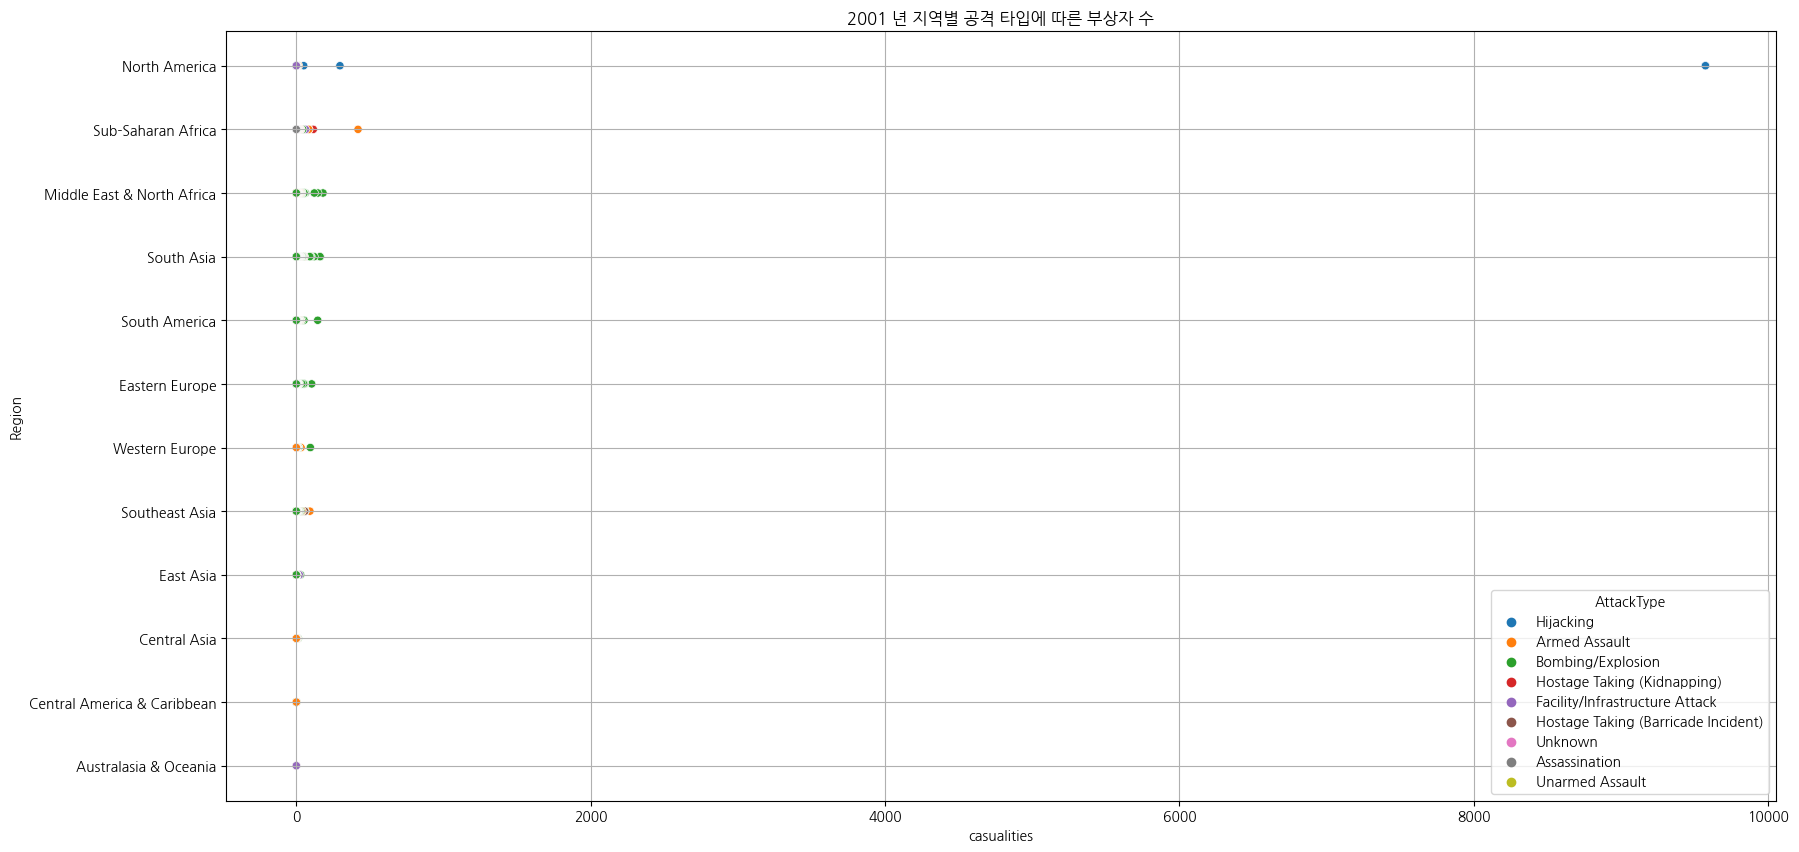

In [456]:
fig, ax = plt.subplots(figsize=(20,10))
plt.title('2001 년 지역별 공격 타입에 따른 부상자 수')
sns.scatterplot(y='Region', x='casualities',data=terror_01sv,  hue='AttackType')
plt.grid()
plt.show(); #2001년을 기준으로 보면 이렇게 미국이 9/11 테러로 인해 압도적으로 사상자가 많다. 전세계가 놀랄만 하다

ValueError: num must be an integer with 1 <= num <= 1, not 2

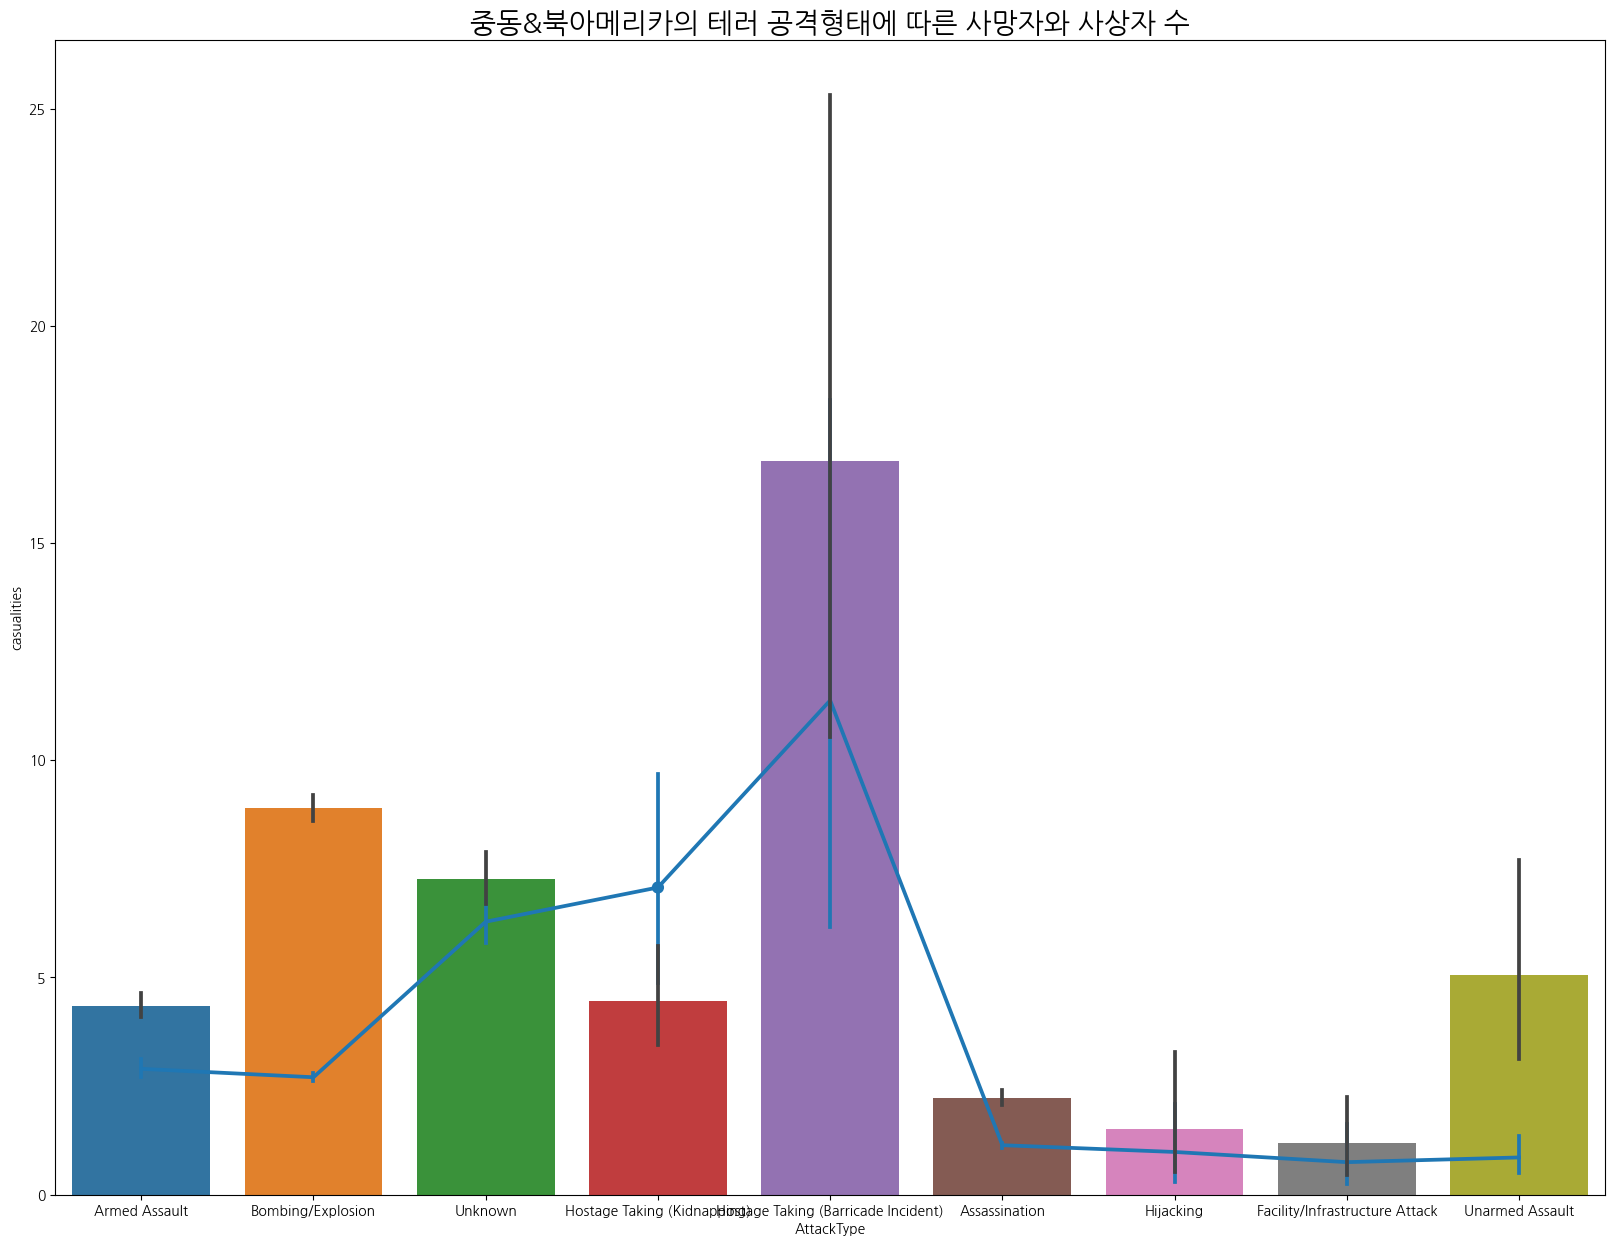

In [576]:
plt.figure(figsize =(20,15))

plt.subplot(111)
sns.pointplot(x='AttackType',y ='Killed', data=terror_MN )
sns.barplot(x='AttackType',y ='casualities', data=terror_MN)
plt.title('중동&북아메리카의 테러 공격형태에 따른 사망자와 사상자 수', size = '20')
ax.pie(frequency, ## 파이차트 출력
       labels=labels, ## 라벨 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=True, ## 반시계 방향으로 파이차트를 그린다.
       autopct=lambda p : '{:.2f}%'.format(p) ## 퍼센티지 출력
       ,textprops = {'size':15},wedgeprops=dict(width=0.5))
 


plt.subplot(112)
sns.pointplot(x='AttackType',y ='Killed', data=terror_SA )
sns.barplot(x='AttackType',y ='casualities', data=terror_SA)
plt.title('남아메리카의 테러 공격형태에 따른 사망자와 사상자 수', size = '30')
ax.pie(frequency, ## 파이차트 출력
       labels=labels, ## 라벨 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=True, ## 반시계 방향으로 파이차트를 그린다.
       autopct=lambda p : '{:.2f}%'.format(p) ## 퍼센티지 출력
       ,textprops = {'size':15},wedgeprops=dict(width=0.5))
 


plt.subplot(211)
sns.pointplot(x='AttackType',y ='Killed', data=terror_WE )
sns.barplot(x='AttackType',y ='casualities', data=terror_WE)
plt.title('서유럽의 테러 공격형태에 따른 사망자와 사상자 수', size = '30')
ax.pie(frequency, ## 파이차트 출력
       labels=labels, ## 라벨 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=True, ## 반시계 방향으로 파이차트를 그린다.
       autopct=lambda p : '{:.2f}%'.format(p) ## 퍼센티지 출력
       ,textprops = {'size':15},wedgeprops=dict(width=0.5))
 


plt.subplot(212)
sns.pointplot(x='AttackType',y ='Killed', data=terror_SAs )
sns.barplot(x='AttackType',y ='casualities', data=terror_SAs)
plt.title('남동아시아의 테러 공격형태에 따른 사망자와 사상자 수', size = '30')
ax.pie(frequency, ## 파이차트 출력
       labels=labels, ## 라벨 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=True, ## 반시계 방향으로 파이차트를 그린다.
       autopct=lambda p : '{:.2f}%'.format(p) ## 퍼센티지 출력
       ,textprops = {'size':15},wedgeprops=dict(width=0.5))
 
plt.show();


# 죄송합니다 고민 하고 있으나 Step 5를 시간안에 완성하지 못했습니다 더 고민해보고 개인적으로 채워보도록 하겠습니다